In [1]:
import glob
import pandas
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline


In [3]:
pd.set_option('display.max_columns', 1000)

In [4]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [5]:
pre = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/"

In [40]:
pdb_list = ['4y60', '5ke8', '1a1j', '1skn', '6a2h']
# pdb_list = ['4y60', '5ke8', '1a1j', '5lxu', '1skn', '6a2h']
# , '5lxu'  need check
project_name = "run1_with_gaussian_DP_bonds"
energy_list = []
run = 0
for pdb in pdb_list:
    energyFile = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/{project_name}_{pdb}_{run}_energies.csv"
    a = pd.read_csv(energyFile)
    energy_list.append(a.assign(Protein=pdb, Run=run))


In [41]:
energy = pd.concat(energy_list).reset_index()

In [43]:
energy.columns

Index(['index', 'Unnamed: 0', 'TotalEnergy kJ/mol', 'dna_constraint kJ/mol',
       'dna_protein_bond kJ/mol', 'constraint kJ/mol', 'Bond kJ/mol',
       'Angle kJ/mol', 'Stacking kJ/mol', 'Dihedral kJ/mol', 'BasePair kJ/mol',
       'CrossStacking kJ/mol', 'Exclusion kJ/mol', 'Electrostatics kJ/mol',
       'Connectivity kJ/mol', 'Chain kJ/mol', 'Chi kJ/mol', 'Excl kJ/mol',
       'rama kJ/mol', 'rama_pro kJ/mol', 'contact kJ/mol', 'beta1 kJ/mol',
       'beta2 kJ/mol', 'beta3 kJ/mol', 'pap1 kJ/mol', 'pap2 kJ/mol',
       'fm kJ/mol', 'ExclusionProteinDNA kJ/mol',
       'ElectrostaticsProteinDNA kJ/mol', 'Q_protein kJ/mol', 'Q_value_sigma5',
       'Q_value_sigma3', 'Q_value_sigma1', 'Q_value_sym_sigma5',
       'Q_value_sym_sigma3', 'Q_value_sym_sigma1', 'Protein', 'Run'],
      dtype='object')

In [48]:
energy = energy.rename(columns={"Unnamed: 0":"Steps", "Q_protein kJ/mol":"Q"})

In [53]:
max_Q = energy.query("Steps > 500").groupby("Protein")["Q"].max().reset_index()

In [54]:
max_Q

Protein         Q
0    1a1j  0.891550
1    1skn  0.652620
2    4y60  0.865234
3    5ke8  0.513708
4    6a2h  0.829548

In [55]:
pdb_list = ['4y60', '5ke8', '1a1j']

In [60]:
# pdb_list = ['4y60', '5ke8', '1a1j', '1skn', '6a2h']
pdb_list = ['4y60', '5ke8', '1a1j']
# , '5lxu'  need check
project_name = "run1_with_gaussian_DP_bonds"
energy_list = []
run = 0
for pdb in pdb_list:
    energyFile = f"/Users/weilu/Research/server/jun_week3_2020/only_protein/run1/{pdb}/{run}/info.dat"
    a = pd.read_csv(energyFile, sep="\s+")
    energy_list.append(a.assign(Protein=pdb, Run=run))

In [61]:
protein_only = pd.concat(energy_list).reset_index()

In [63]:
max_Q_protein_only = protein_only.query("Steps > 500").groupby("Protein")["Q"].max().reset_index()

In [64]:
max_Q_protein_only

Protein     Q
0    1a1j  0.50
1    4y60  0.81
2    5ke8  0.84

In [67]:
protein_only.query("Protein=='5ke8'")

index  Steps     Q     Rg  Backbone    Rama  Contact  Fragment  \
1002      0      0  0.01  80.65    157.68 -184.07   -47.14    -37.85   
1003      1      1  0.02  79.16      3.13 -201.35   -74.96    -57.00   
1004      2      2  0.03  72.53    449.69  -98.84   -66.57    -82.91   
1005      3      3  0.04  66.35    465.89  -82.62   -67.35    -95.58   
1006      4      4  0.05  64.41    480.49  -99.62   -64.95   -107.82   
...     ...    ...   ...    ...       ...     ...      ...       ...   
1999    997    997  0.66  16.17    119.79 -181.19  -113.15   -372.73   
2000    998    998  0.68  16.28    121.75 -176.49  -106.67   -376.67   
2001    999    999  0.66  16.09    137.71 -187.53  -108.17   -376.94   
2002   1000   1000  0.70  16.31    122.92 -182.01  -106.36   -377.87   
2003   1001   1001  0.70  16.15    120.07 -184.02  -108.05   -380.81   

      Membrane   ER  TBM_Q   Beta   Pap  Helical   Total Protein  Run  
1002       0.0  0.0    0.0   0.00  0.00      0.0 -111.38    5ke8    0  
1003       0.0  0.0    0.0  -0.00  0.00      0.0 -330.19    5ke8    0  
1004       0.0  0.0    0.0  -0.00  0.00      0.0  201.37    5ke8    0  
1005       0.0  0.0    0.0  -0.57  0.00      0.0  219.78    5ke8    0  
1006       0.0  0.0    0.0  -0.02  0.00      0.0  208.08    5ke8    0  
...        ...  ...    ...    ...   ...      ...     ...     ...  ...  
1999       0.0  0.0    0.0 -37.94 -3.20      0.0 -588.42    5ke8    0  
2000       0.0  0.0    0.0 -32.59 -3.43      0.0 -574.10    5ke8    0  
2001       0.0  0.0    0.0 -33.51 -3.78      0.0 -572.21    5ke8    0  
2002       0.0  0.0    0.0 -33.98 -2.69      0.0 -579.98    5ke8    0  
2003       0.0  0.0    0.0 -33.98 -1.78      0.0 -588.56    5ke8    0  

[1002 rows x 17 columns]

In [69]:
-380.81*4.184

-1593.30904

In [7]:
data = pd.read_csv("/Users/weilu/Research/server/jun_week3_2020/protein_DNA/selected_extra_info.csv", index_col=0)
sampled = data.sample(6, random_state=28)
pdb_list = sampled.idcode.to_list()

In [92]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/recompute_native_jun23_1mnn_0.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  dna_constraint kJ/mol  \
0              0       -14810.256836          0.817004              10.252481   
1              1       -14474.601562          0.743635              15.972038   
2              2       -14351.084961          0.725497              10.185277   
3              3       -14630.428711          0.730834               6.799489   
4              4       -14639.570312          0.724429              10.800651   
...          ...                 ...               ...                    ...   
1995        1995       -14764.521484          0.750326               7.256150   
1996        1996       -14757.965820          0.740076               8.411196   
1997        1997       -14859.361328          0.802917               5.731133   
1998        1998       -14751.366211          0.801201              10.943589   
1999        1999       -14870.892578          0.804826               7.026646   

      constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0            116.826187    55.465034    116.826187      -298.666870   
1            106.317879    52.855232    106.317879      -273.506836   
2            130.867020    56.955257    130.867020      -283.537292   
3            128.493927    50.924419    128.493927      -285.416748   
4            125.669838    48.256851    125.669838      -305.404724   
...                 ...          ...           ...              ...   
1995         137.919983    51.825890    137.919983      -309.140747   
1996         123.363518    36.974941    123.363518      -294.920471   
1997         104.851776    37.213951    104.851776      -291.647095   
1998         142.947693    36.906754    142.947693      -296.819702   
1999         108.960457    39.942383    108.960457      -278.063934   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -291.764465      -194.158447            -48.893894   
1         -298.370117      -189.643158            -40.100220   
2         -293.291779      -188.024734            -46.478630   
3         -301.684143      -182.612152            -50.326790   
4         -312.403717      -172.016083            -41.841728   
...               ...              ...                   ...   
1995      -301.799561      -174.413574            -43.765472   
1996      -292.209747      -173.560257            -44.809971   
1997      -308.126831      -190.113647            -47.028675   
1998      -303.313324      -166.925995            -36.610741   
1999      -305.014465      -185.412903            -48.643597   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             0.215424              15.012580          2703.921875   
1             1.135952              14.638001          2922.776611   
2             3.054863              14.662981          2931.800293   
3             0.519998              14.993981          2785.590820   
4             2.436178              15.368118          2763.372314   
...                ...                    ...                  ...   
1995          0.750355              15.000244          2876.053711   
1996          0.294180              15.812076          2797.144531   
1997          0.430197              14.614691          2859.997559   
1998          0.414613              14.666491          2950.782227   
1999          1.134502              15.456662          2768.952881   

      Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0      2703.921875  2703.921875  2703.921875 -2759.281250     -2759.281250   
1      2922.776611  2922.776855  2922.776855 -2752.549561     -2752.549561   
2      2931.800293  2931.800293  2931.800293 -2687.017578     -2687.017578   
3      2785.590820  2785.591064  2785.590820 -2691.557861     -2691.557861   
4      2763.372314  2763.372314  2763.372314 -2654.993164     -2654.993164   
...            ...          ...          ...          ...              ...   
1995   2876.053955  2876

In [89]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/recompute_native_jun23_6cta_0.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  dna_constraint kJ/mol  \
0              0       -10680.473633          0.802357              10.183357   
1              1       -10973.615234          0.755078               7.122046   
2              2       -10941.533203          0.759299              10.365255   
3              3       -11224.194336          0.749125               9.993595   
4              4       -11240.523438          0.757391               8.963636   
...          ...                 ...               ...                    ...   
1995        1995       -10997.261719          0.635952               5.972814   
1996        1996       -11028.095703          0.664254               7.682834   
1997        1997       -11021.867188          0.633345              10.650947   
1998        1998       -11095.653320          0.663769               9.491728   
1999        1999       -11054.380859          0.674450               8.699992   

      constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0            121.882431    43.324318    121.882431      -300.370728   
1            131.858353    35.927124    131.858353      -298.851593   
2            114.459686    32.345940    114.459686      -299.927734   
3            137.512726    51.007042    137.512726      -304.418701   
4            101.865555    30.072643    101.865555      -301.837830   
...                 ...          ...           ...              ...   
1995         111.809235    52.220612    111.809235      -303.752502   
1996         146.621490    69.389664    146.621490      -279.844482   
1997         115.276581    69.334663    115.276581      -294.902191   
1998         115.405022    40.703667    115.405022      -304.861237   
1999         130.260223    55.220657    130.260223      -296.796875   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -314.556702      -190.152008            -48.632523   
1         -300.719818      -173.857559            -41.984100   
2         -297.163330      -176.700317            -40.761093   
3         -290.465790      -180.886780            -41.175705   
4         -313.192078      -188.295746            -42.962238   
...               ...              ...                   ...   
1995      -321.987976      -190.456696            -45.202141   
1996      -305.344482      -194.252701            -39.089390   
1997      -305.531372      -193.134842            -41.043884   
1998      -324.201599      -186.230438            -35.324059   
1999      -302.799744      -182.340408            -39.371880   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             1.794551              14.999395          3532.704102   
1             1.460322              15.037350          3354.870361   
2             1.655410              15.355479          3317.415039   
3             0.538899              15.593216          3120.537354   
4             2.188382              15.371177          3290.838867   
...                ...                    ...                  ...   
1995          0.334561              15.322523          3374.251953   
1996          2.866572              15.364073          3393.218262   
1997          2.325428              14.846598          3350.370850   
1998          0.552306              14.710534          3341.138184   
1999          2.454579              14.511970          3303.845215   

      Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0      3532.704102  3532.704102  3532.703857 -3233.703369     -3233.703369   
1      3354.870361  3354.870361  3354.870361 -3163.582275     -3163.582275   
2      3317.415039  3317.415039  3317.415039 -3152.139160     -3152.139160   
3      3120.537354  3120.537354  3120.537354 -3189.552490     -3189.552490   
4      3290.838623  3290.838867  3290.838867 -3242.946289     -3242.946289   
...            ...          ...          ...          ...              ...   
1995   3374.252197  3374

In [91]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/recompute_native_jun23_6cta_0.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  dna_constraint kJ/mol  \
0              0       -17146.677734          0.802357              10.183357   
1              1       -17419.414062          0.755078               7.122046   
2              2       -17398.382812          0.759299              10.365255   
3              3       -17653.373047          0.749125               9.993595   
4              4       -17682.996094          0.757391               8.963636   
...          ...                 ...               ...                    ...   
1995        1995       -17462.050781          0.635952               5.972814   
1996        1996       -17426.074219          0.664254               7.682834   
1997        1997       -17518.636719          0.633345              10.650947   
1998        1998       -17547.644531          0.663769               9.491728   
1999        1999       -17470.349609          0.674450               8.699992   

      constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0            121.882431    43.324318    121.882431      -300.370728   
1            131.858353    35.927124    131.858353      -298.851593   
2            114.459686    32.345940    114.459686      -299.927734   
3            137.512726    51.007042    137.512726      -304.418701   
4            101.865555    30.072643    101.865555      -301.837830   
...                 ...          ...           ...              ...   
1995         111.809235    52.220612    111.809235      -303.752502   
1996         146.621490    69.389664    146.621490      -279.844482   
1997         115.276581    69.334663    115.276581      -294.902191   
1998         115.405022    40.703667    115.405022      -304.861237   
1999         130.260223    55.220657    130.260223      -296.796875   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -314.556702      -190.152008            -48.632523   
1         -300.719818      -173.857559            -41.984100   
2         -297.163330      -176.700317            -40.761093   
3         -290.465790      -180.886780            -41.175705   
4         -313.192078      -188.295746            -42.962238   
...               ...              ...                   ...   
1995      -321.987976      -190.456696            -45.202141   
1996      -305.344482      -194.252701            -39.089390   
1997      -305.531372      -193.134842            -41.043884   
1998      -324.201599      -186.230438            -35.324059   
1999      -302.799744      -182.340408            -39.371880   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             1.794551              14.999395          3532.704102   
1             1.460322              15.037350          3354.870605   
2             1.655410              15.355479          3317.415039   
3             0.538899              15.593216          3120.537598   
4             2.188382              15.371177          3290.838867   
...                ...                    ...                  ...   
1995          0.334561              15.322523          3374.252197   
1996          2.866572              15.364073          3393.218262   
1997          2.325428              14.846598          3350.370850   
1998          0.552306              14.710534          3341.138184   
1999          2.454579              14.511970          3303.845215   

      Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0      3532.704102  3532.704102  3532.704102 -3233.703369     -3233.703369   
1      3354.870117  3354.870605  3354.870361 -3163.582275     -3163.582275   
2      3317.415039  3317.415039  3317.415039 -3152.139160     -3152.139160   
3      3120.537354  3120.537598  3120.537354 -3189.552490     -3189.552490   
4      3290.838867  3290.838867  3290.838867 -3242.946289     -3242.946289   
...            ...          ...          ...          ...              ...   
1995   3374.252197  3374

In [90]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/automatic_man_made_DNA/jun23_local_6cta_with_long_DNA_0_energies.csv"
e_6cta_long = pd.read_csv(test)
e_6cta_long

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0              0       -28084.914062             385.143433   
1              1       -28136.916016             376.028137   
2              2       -28073.179688             385.692047   
3              3       -27642.539062             378.587555   
4              4       -28522.615234             388.701904   
...          ...                 ...                    ...   
2495        2495        -4778.890625             375.171875   
2496        2496        -4912.541016             386.842590   
2497        2497        -5101.885742             388.393555   
2498        2498        -5550.924805             391.726196   
2499        2499        -5296.974609             377.313141   

      constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0           1765.305542   718.134338   1765.305542     -4978.239258   
1           1815.489990   726.001648   1815.489990     -5054.110352   
2           1815.529175   733.943970   1815.529175     -5007.010254   
3           1932.818359   684.921753   1932.818359     -4934.697266   
4           1760.471680   667.386536   1760.471680     -5035.434570   
...                 ...          ...           ...              ...   
2495       24821.203125   775.840515  24821.203125     -5032.062988   
2496       24829.728516   723.591003  24829.728516     -5002.994629   
2497       24766.503906   701.186523  24766.503906     -5004.054688   
2498       24718.082031   682.851624  24718.082031     -5084.236328   
2499       24776.025391   732.216797  24776.025391     -5055.133301   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0        -5550.880859     -2650.411621           -731.064087   
1        -5531.146973     -2672.147461           -732.951965   
2        -5544.849609     -2698.890625           -738.443726   
3        -5482.139648     -2727.120117           -745.215942   
4        -5551.182617     -2729.400391           -755.818726   
...               ...              ...                   ...   
2495     -5507.647461     -2705.367188           -767.726318   
2496     -5540.239258     -2610.032715           -743.058594   
2497     -5538.388672     -2713.717773           -763.840210   
2498     -5583.989746     -2738.033203           -743.662476   
2499     -5567.333008     -2736.951660           -774.686401   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             2.890714             351.660950          3301.408203   
1             2.403062             352.739441          3339.345215   
2             1.228964             352.474854          3259.986328   
3             3.447486             352.059113          3418.825195   
4             0.979799             351.549744          3125.561279   
...                ...                    ...                  ...   
2495          1.034404             355.283112          3381.435547   
2496          1.519709             356.289368          3311.117676   
2497          0.595195             359.510284          3351.208984   
2498          1.826979             357.340393          3154.255371   
2499          1.345400             355.525024          3297.115967   

      Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0      3301.408203  3301.408203  3301.408203 -3208.902100     -3208.902100   
1      3339.345215  3339.345215  3339.345215 -3177.366699     -3177.366699   
2      3259.986084  3259.986084  3259.986084 -3173.109863     -3173.109863   
3      3418.825195  3418.825195  3418.825195 -3176.453613     -3176.453613   
4      3125.561279  3125.561279  3125.561279 -3183.749756     -3183.749756   
...            ...          ...          ...          ...              ...   
2495   3381.435547  3381.435547  3381.435547 -3163.770264     -3163.770264   
2496   3311.117676  3311.117676  3311.117676 -3143.753906     -3143.753906   
2497   3351.208984  3351.208740  3351.208984 -3232.060791     -3232.060791   
2498  

In [86]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/man_made_DNA/large_DNA_long_jun22_1mnn_with_long_DNA_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0              0       -24457.537109             183.714249   
1              1       -24456.519531             196.931610   
2              2       -24300.035156             191.205856   
3              3       -24372.824219             192.282074   
4              4       -24528.214844             192.336853   
...          ...                 ...                    ...   
2495        2495       -22439.484375             188.295532   
2496        2496       -22580.289062             201.041031   
2497        2497       -22269.023438             186.704834   
2498        2498       -22210.361328             182.597961   
2499        2499       -22397.238281             190.955475   

      constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0           2800.833984   659.545166   2800.833984     -5011.828613   
1           2762.208740   687.233276   2762.208740     -5005.193848   
2           2750.520508   740.478333   2750.520508     -4970.790527   
3           2726.612305   751.291870   2726.612305     -4943.799805   
4           2652.645020   740.158081   2652.645020     -4972.147461   
...                 ...          ...           ...              ...   
2495        4954.474609   715.040161   4954.474609     -5046.119629   
2496        4900.596680   728.415527   4900.596680     -5047.375488   
2497        4830.064941   735.791382   4830.064941     -5017.216309   
2498        4921.239258   725.497070   4921.239258     -4978.549805   
2499        5001.852051   713.383240   5001.852051     -5048.722656   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0        -5510.080078     -2709.732422           -775.163391   
1        -5473.148438     -2708.800049           -747.148804   
2        -5481.248047     -2671.476074           -759.886719   
3        -5502.995117     -2729.354980           -760.497803   
4        -5498.641602     -2710.138672           -769.077271   
...               ...              ...                   ...   
2495     -5473.093750     -2661.842285           -782.726746   
2496     -5486.405273     -2671.020508           -752.016602   
2497     -5485.175293     -2674.260254           -760.023071   
2498     -5513.687500     -2681.994141           -763.588745   
2499     -5540.105957     -2703.705078           -785.811401   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             0.700881             348.124573          2882.879883   
1             0.137271             346.638123          2687.000244   
2             0.450074             347.682190          2743.282959   
3             0.234464             348.787994          2834.520264   
4             0.867688             351.511719          2800.818848   
...                ...                    ...                  ...   
2495          1.366299             350.174652          2771.661865   
2496          0.741139             348.721497          2631.348633   
2497          0.652972             350.732483          2914.276855   
2498          0.165147             350.517059          2908.420410   
2499          0.823530             350.004395          2885.164795   

      Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0      2882.879883  2882.879883  2882.879883 -2686.058350     -2686.058350   
1      2687.000000  2687.000000  2687.000000 -2689.660400     -2689.660400   
2      2743.282959  2743.283203  2743.282715 -2701.150391     -2701.150391   
3      2834.520020  2834.520020  2834.520264 -2701.585449     -2701.585449   
4      2800.818848  2800.818848  2800.818848 -2759.631104     -2759.631104   
...            ...          ...          ...          ...              ...   
2495   2771.662109  2771.661865  2771.662109 -2755.757812     -2755.757812   
2496   2631.348389  2631.348389  2631.348389 -2744.824463     -2744.824463   
2497   2914.276855  2914.276855  2914.276855 -2706.091309     -2706.091309   
2498  

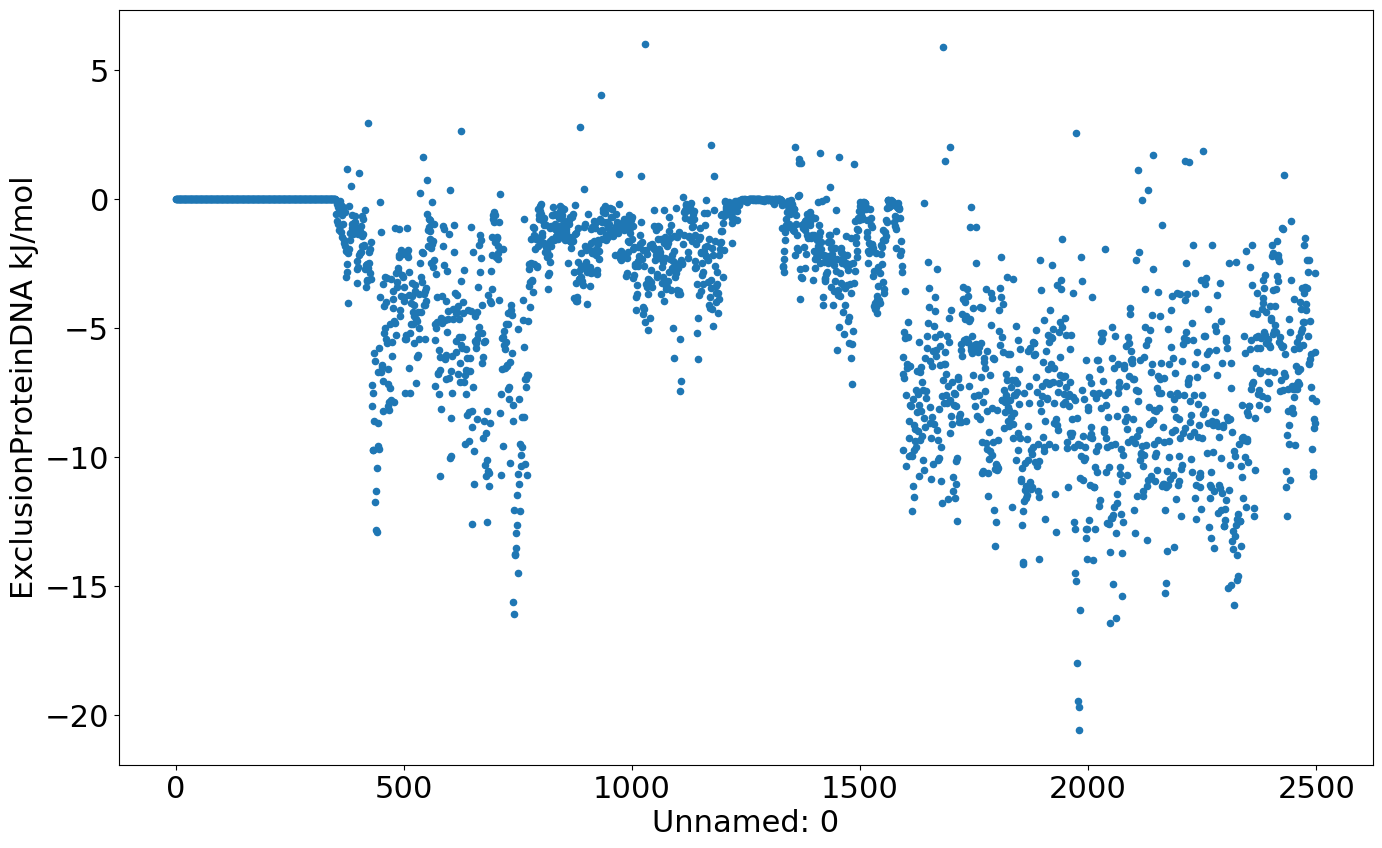

In [88]:
test_energy.plot.scatter("Unnamed: 0", "ExclusionProteinDNA kJ/mol")

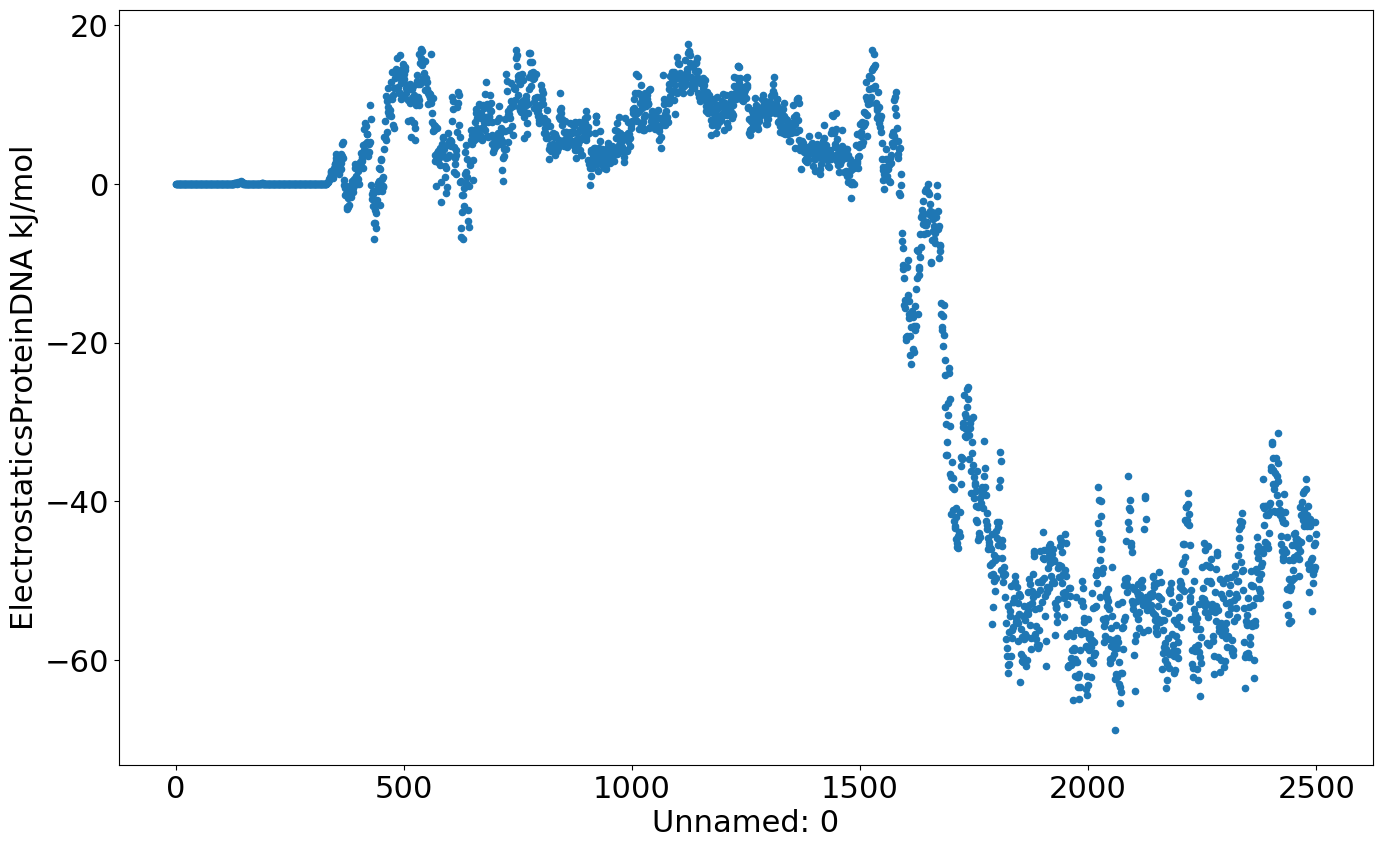

In [87]:
test_energy.plot.scatter("Unnamed: 0", "ElectrostaticsProteinDNA kJ/mol")

In [85]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/man_made_DNA/large_DNA_short_run_3_1mnn_with_long_DNA_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  constraint kJ/mol  \
0            0       -15936.783203             184.061874       11118.538086   
1            1       -16209.738281             187.040390       10901.642578   
2            2       -16571.267578             183.972977       10569.939453   
3            3       -16839.904297             183.868958       10306.427734   
4            4       -17376.468750             179.310837        9989.962891   
..         ...                 ...                    ...                ...   
95          95       -23578.150391             181.798203        3537.201660   
96          96       -23553.218750             178.170639        3698.057129   
97          97       -23489.894531             179.815811        3702.309570   
98          98       -23739.566406             175.390945        3561.421875   
99          99       -23566.076172             177.089386        3709.053467   

    Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0    687.125488  11118.538086     -5024.118164     -5483.117188   
1    774.845581  10901.642578     -4976.893066     -5573.596680   
2    696.351624  10569.939453     -4951.250000     -5529.140625   
3    609.070496  10306.427734     -4937.120605     -5541.375000   
4    728.669250   9989.962891     -4945.222656     -5550.083984   
..          ...           ...              ...              ...   
95   730.468323   3537.201660     -4949.555664     -5496.459961   
96   714.109009   3698.057129     -4906.059082     -5519.592285   
97   719.486816   3702.309570     -4990.005859     -5558.833496   
98   759.709839   3561.421875     -4925.158203     -5535.911133   
99   655.313782   3709.053467     -4963.671387     -5485.600586   

    BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0      -2719.345459           -791.972778          0.165868   
1      -2706.237793           -758.493530          2.211658   
2      -2705.874512           -757.142090          0.256081   
3      -2723.919678           -774.400330          0.017689   
4      -2683.118652           -788.463501          0.185193   
..              ...                   ...               ...   
95     -2692.889160           -750.593872          0.179669   
96     -2743.216797           -768.792603          0.789880   
97     -2634.284912           -735.624390          0.421748   
98     -2668.408691           -764.047974          0.798947   
99     -2642.252930           -731.247192          2.127761   

    Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0              349.802307          3040.864502   3040.864746  3040.864258   
1              348.647949          2758.331543   2758.331543  2758.331543   
2              350.925964          2865.774414   2865.774414  2865.774414   
3              347.937744          2980.757324   2980.757324  2980.757324   
4              349.425201          2644.769531   2644.769531  2644.769531   
..                    ...                  ...           ...          ...   
95             349.946777          2909.982178   2909.982178  2909.982178   
96             350.553864          2774.201172   2774.201172  2774.201172   
97             348.997559          2806.246826   2806.246826  2806.246582   
98             350.587250          2747.438477   2747.438477  2747.438477   
99             351.806854          2792.205078   2792.205078  2792.205078   

    Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0   3040.864258 -2687.079590     -2687.079590    -1354.643311   -675.923889   
1   2758.331543 -2695.023926     -2695.023926    -1282.434692   -673.010864   
2   2865.774414 -2722.517578     -2722.517578    -1369.361084   -656.393982   
3   2980.757324 -2705.805420     -2705.805420    -1335.508423   -693.169556   
4   2644.769287 -2717.699707     -2717.699707    -1340.563232   -683.110840   
..          ...          ...              ...             ...           ...   
95 

In [84]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/man_made_DNA/large_DNA_short_run_2_1mnn_with_long_DNA_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  constraint kJ/mol  \
0            0       -24150.128906             181.517456        2832.322754   
1            1       -24285.466797             188.162888        2753.326416   
2            2       -24116.121094             193.939423        2743.690918   
3            3       -24316.111328             204.903595        2714.378418   
4            4       -24310.023438             180.213226        2813.322021   
..         ...                 ...                    ...                ...   
95          95       -25511.718750             170.577042        1770.333008   
96          96       -25619.242188             176.899353        1736.006348   
97          97       -25454.421875             170.599869        1743.254150   
98          98       -24975.917969             172.895340        1795.872925   
99          99       -25581.500000             163.833755        1707.445190   

    Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0    698.923157   2832.322754     -4941.406250     -5514.380371   
1    641.123352   2753.326416     -5017.016602     -5511.425781   
2    709.236511   2743.690918     -4921.531738     -5502.958984   
3    701.455872   2714.378418     -4980.315918     -5468.758789   
4    661.951843   2813.322021     -5001.940430     -5504.131836   
..          ...           ...              ...              ...   
95   630.631836   1770.333008     -4928.009766     -5474.575195   
96   697.429321   1736.006348     -4993.835938     -5518.433594   
97   774.990234   1743.254150     -4926.234375     -5503.251953   
98   719.549927   1795.872925     -4926.469727     -5470.021484   
99   656.766357   1707.445190     -4862.707520     -5507.404297   

    BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0      -2693.944824           -729.039917          3.407232   
1      -2621.111816           -754.553955          0.500445   
2      -2647.315918           -752.078491          2.684717   
3      -2712.260010           -780.391479          0.373190   
4      -2741.462402           -761.137817          0.534056   
..              ...                   ...               ...   
95     -2698.836426           -729.963013          0.998064   
96     -2706.148438           -762.553345          0.036488   
97     -2696.192871           -734.407532          0.077839   
98     -2666.082275           -767.433472          0.378687   
99     -2670.552246           -732.384277          1.060889   

    Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0              347.581421          2919.342285   2919.342285  2919.342285   
1              350.830627          2910.322266   2910.322266  2910.322266   
2              348.055603          2996.295410   2996.295654  2996.295410   
3              347.675049          2814.951172   2814.950928  2814.950928   
4              349.881714          2909.317139   2909.317383  2909.317139   
..                    ...                  ...           ...          ...   
95             345.612488          2767.934082   2767.934082  2767.934326   
96             349.638855          2697.720703   2697.720703  2697.720459   
97             346.575073          2774.852051   2774.852051  2774.851807   
98             352.560852          3080.303711   3080.303711  3080.303711   
99             346.875946          2675.840820   2675.840820  2675.840820   

    Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0   2919.342285 -2759.722900     -2759.722900    -1308.057007   -682.585754   
1   2910.322021 -2685.238281     -2685.238281    -1312.995239   -672.732117   
2   2996.295654 -2713.682861     -2713.682861    -1339.872192   -676.840332   
3   2814.950928 -2696.008301     -2696.008301    -1285.772583   -663.302429   
4   2909.317139 -2676.302490     -2676.302490    -1338.123291   -694.164673   
..          ...          ...              ...             ...           ...   
95 

In [83]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/away_and_back_1mnn_0_1mnn_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0              0       -12385.897461              13.461229   
1              1       -12060.020508               8.850800   
2              2       -12300.620117               6.376729   
3              3       -12733.312500               7.337109   
4              4       -12724.734375              12.035971   
...          ...                 ...                    ...   
2495        2495       -12294.621094              12.408669   
2496        2496       -12550.934570               6.899492   
2497        2497       -12127.769531              12.757437   
2498        2498       -12475.263672              13.234321   
2499        2499       -12350.847656               9.718982   

      constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0           3030.175293    46.452850   3030.175293      -275.798065   
1           2817.990479    42.067963   2817.990479      -296.905334   
2           2675.061279    45.480347   2675.061279      -285.450134   
3           2545.474365    47.843620   2545.474365      -304.824066   
4           2441.915771    54.672882   2441.915771      -299.816772   
...                 ...          ...           ...              ...   
2495        3030.455811    31.537233   3030.455811      -292.078979   
2496        3054.370117    61.725010   3054.370117      -281.096771   
2497        3023.316895    48.386467   3023.316895      -277.547211   
2498        3009.016602    49.117912   3009.016602      -287.389282   
2499        3013.665527    50.575478   3013.665527      -288.182373   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -306.846710      -179.087646            -40.127075   
1         -289.395294      -188.966797            -46.736641   
2         -278.288055      -160.654007            -42.575020   
3         -303.276947      -191.122070            -50.485451   
4         -304.508575      -185.370972            -50.566200   
...               ...              ...                   ...   
2495      -294.088409      -196.030975            -40.342793   
2496      -306.412354      -185.494003            -53.443516   
2497      -304.813080      -157.584381            -42.889675   
2498      -301.042816      -173.979584            -43.816849   
2499      -303.782379      -186.426804            -44.917267   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             1.249566              14.698899          2696.249756   
1             0.010913              14.618472          3009.558594   
2             1.745581              14.499677          2938.495117   
3             0.049953              14.367672          2799.580566   
4             0.284672              15.089846          2827.721680   
...                ...                    ...                  ...   
2495          1.097257              14.906475          2788.698975   
2496          0.197455              15.506841          2658.653320   
2497          0.146093              15.280726          2941.043945   
2498          1.825061              15.052105          2721.521240   
2499          0.032613              15.275789          2847.987305   

      Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0      2696.249756  2696.249756  2696.249756 -2760.125977     -2760.125977   
1      3009.558594  3009.558594  3009.558594 -2687.067139     -2687.067139   
2      2938.495117  2938.495361  2938.495361 -2686.730957     -2686.730957   
3      2799.580566  2799.580566  2799.580322 -2717.763916     -2717.763916   
4      2827.721680  2827.721680  2827.721924 -2716.446777     -2716.446777   
...            ...          ...          ...          ...              ...   
2495   2788.698975  2788.698975  2788.699219 -2692.447510     -2692.447510   
2496   2658.653320  2658.653320  2658.653320 -2775.543701     -2775.543701   
2497   2941.043945  2941.044189  2941.043945 -2739.778809     -2739.778809   
2498  

In [79]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/compare_away_and_back_more.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  dna_constraint kJ/mol  \
0              0       -10971.656250          0.796220            3387.506836   
1              1       -11061.308594          0.740738            3769.768555   
2              2       -11758.616211          0.727607            3177.844238   
3              3       -11604.505859          0.740845            3250.545898   
4              4       -11332.234375          0.692694            3390.350830   
...          ...                 ...               ...                    ...   
2495        2495       -13182.912109          0.659293            2329.931152   
2496        2496       -13146.724609          0.622766            2324.025879   
2497        2497       -13320.022461          0.637970            2203.517090   
2498        2498       -13324.900391          0.610815            2215.313965   
2499        2499       -13490.854492          0.627615            2138.896484   

      constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0            131.458115    55.112930    131.458115      -282.599884   
1            120.930786    40.931320    120.930786      -315.059875   
2            117.583588    38.467113    117.583588      -293.192719   
3            140.646637    47.798626    140.646637      -284.555054   
4            151.035309    64.296082    151.035309      -301.096893   
...                 ...          ...           ...              ...   
2495          86.059830    31.473118     86.059830      -311.925079   
2496          97.948326    41.420628     97.948326      -318.410095   
2497          82.109650    35.783127     82.109650      -314.065460   
2498          90.010956    27.731382     90.010956      -314.570160   
2499          86.310867    24.216667     86.310867      -304.766663   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -301.376160      -166.553040            -36.017151   
1         -307.382080      -186.028870            -47.102608   
2         -327.078186      -173.027252            -46.350685   
3         -315.329620      -195.324402            -42.092461   
4         -304.515198      -168.105972            -39.136078   
...               ...              ...                   ...   
2495      -319.738373      -187.518494            -44.854233   
2496      -331.441406      -209.177612            -42.686298   
2497      -319.630402      -192.000061            -41.501556   
2498      -326.274628      -194.413177            -48.187447   
2499      -320.088470      -199.047974            -41.930946   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             1.144603              14.942951          3387.506836   
1             1.519377              15.634151          3769.768311   
2             0.205168              14.621743          3177.844238   
3             0.614041              15.035866          3250.545898   
4             1.259074              15.239937          3390.350586   
...                ...                    ...                  ...   
2495          1.287337              15.028812          2329.931152   
2496          0.216423              14.326202          2324.025879   
2497          1.384134              15.685166          2203.516846   
2498          1.210778              15.028698          2215.313965   
2499          0.340773              14.628206          2138.896484   

      Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0      3387.507080  3387.507080  3387.507080 -3133.791748     -3133.791748   
1      3769.768311  3769.768066  3769.768555 -3177.640625     -3177.640625   
2      3177.844238  3177.844238  3177.844482 -3240.548096     -3240.548096   
3      3250.545898  3250.545898  3250.545898 -3202.607910     -3202.607910   
4      3390.350586  3390.350586  3390.350830 -3157.799316     -3157.799316   
...            ...          ...          ...          ...              ...   
2495   2329.931152  2329

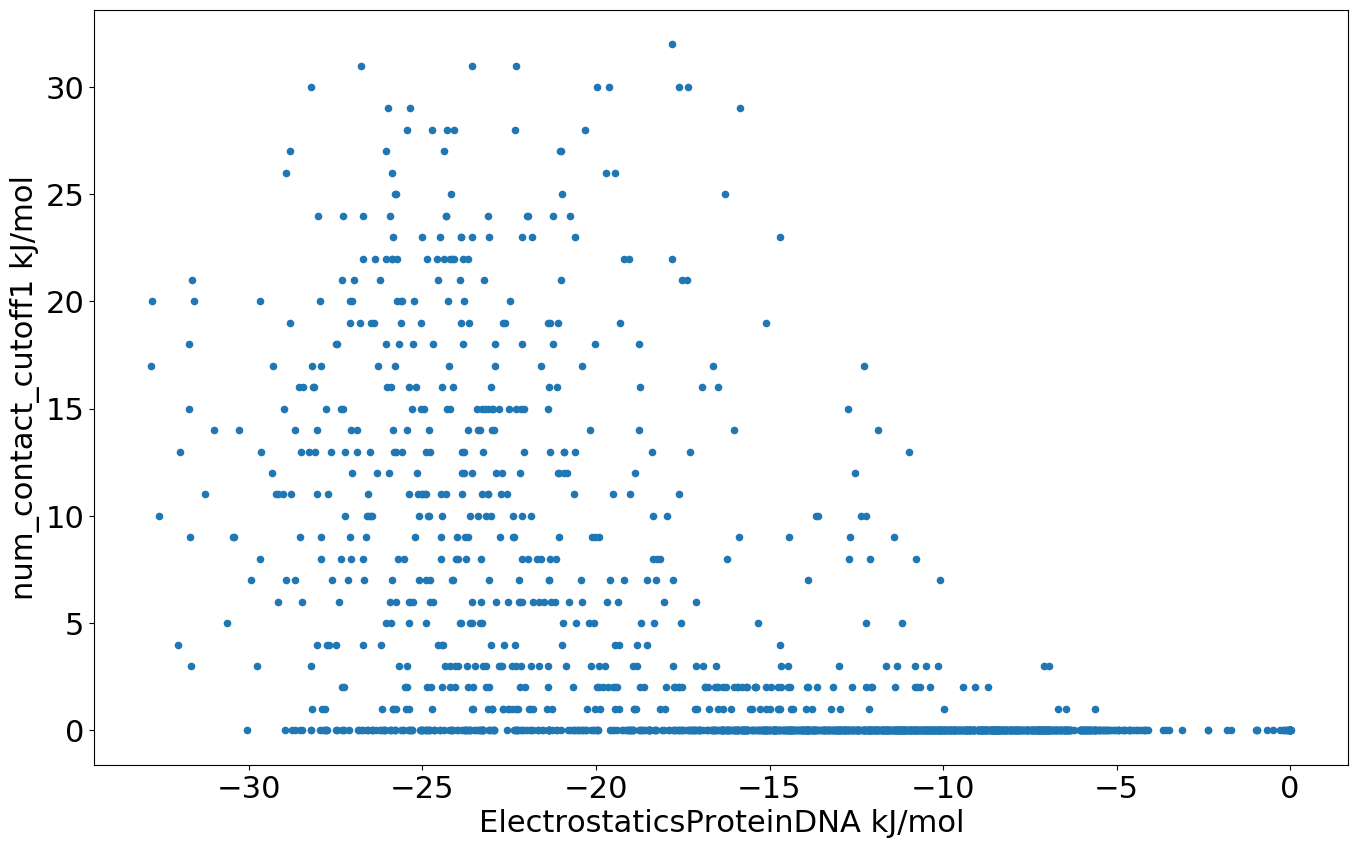

In [80]:
test_energy.plot.scatter("ElectrostaticsProteinDNA kJ/mol", "num_contact_cutoff1 kJ/mol")

In [81]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/compare_away_and_back.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  Bond kJ/mol  \
0              0       -11029.046875          0.796220    55.112930   
1              1       -11101.300781          0.740738    40.931320   
2              2       -11803.016602          0.727607    38.467113   
3              3       -11654.599609          0.740845    47.798626   
4              4       -11389.333984          0.692694    64.296082   
...          ...                 ...               ...          ...   
2495        2495       -13233.267578          0.659293    31.473118   
2496        2496       -13198.537109          0.622766    41.420628   
2497        2497       -13360.655273          0.637970    35.783127   
2498        2498       -13366.336914          0.610815    27.731382   
2499        2499       -13539.648438          0.627615    24.216667   

      Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  \
0       114.145981      -282.599884      -301.376160      -166.553040   
1        96.544083      -315.059875      -307.382080      -186.028870   
2        86.013374      -293.192719      -327.078186      -173.027252   
3       101.102234      -284.555054      -315.329620      -195.324402   
4       103.625626      -301.096893      -304.515198      -168.105972   
...            ...              ...              ...              ...   
2495     69.899872      -311.925079      -319.738373      -187.518494   
2496     81.099670      -318.410095      -331.441406      -209.177612   
2497     64.695572      -314.065460      -319.630402      -192.000061   
2498     72.024124      -314.570160      -326.274628      -194.413177   
2499     69.218750      -304.766663      -320.088470      -199.047974   

      CrossStacking kJ/mol  Exclusion kJ/mol  Electrostatics kJ/mol  \
0               -36.017151          1.144603              14.942951   
1               -47.102608          1.519377              15.634151   
2               -46.350685          0.205168              14.621743   
3               -42.092461          0.614041              15.035866   
4               -39.136078          1.259074              15.239937   
...                    ...               ...                    ...   
2495            -44.854233          1.287337              15.028812   
2496            -42.686298          0.216423              14.326202   
2497            -41.501556          1.384134              15.685166   
2498            -48.187447          1.210778              15.028698   
2499            -41.930946          0.340773              14.628206   

      Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  \
0             3376.154785   3376.154785  3376.154785  3376.154785   
1             3761.253418   3761.252930  3761.253418  3761.253174   
2             3168.168945   3168.169189  3168.169189  3168.169189   
3             3241.802734   3241.802734  3241.802734  3241.802734   
4             3381.617188   3381.617188  3381.617188  3381.617188   
...                   ...           ...          ...          ...   
2495          2320.886719   2320.886719  2320.886719  2320.886719   
2496          2313.457275   2313.457031  2313.457031  2313.457031   
2497          2198.244141   2198.243896  2198.244141  2198.244141   
2498          2208.805908   2208.805664  2208.805908  2208.805908   
2499          2128.118164   2128.118408  2128.118408  2128.118408   

      rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    -3133.791748     -3133.791748    -2683.727051   -610.281921   
1    -3177.640625     -3177.640625    -2739.989258   -606.625671   
2    -3240.548096     -3240.548096    -2743.158936   -589.402161   
3    -3202.607910     -3202.607910    -2714.343506   -607.267578   
4    -3157.799316     -3157.799316    -2680.262695   -637.540710   
...           ...              ...             ...           ...   
2495 -3346.525391     -3346.525391    -3007.350098   -688.906250   
2496 -3279.152832     -3279.152832    -2971.208008

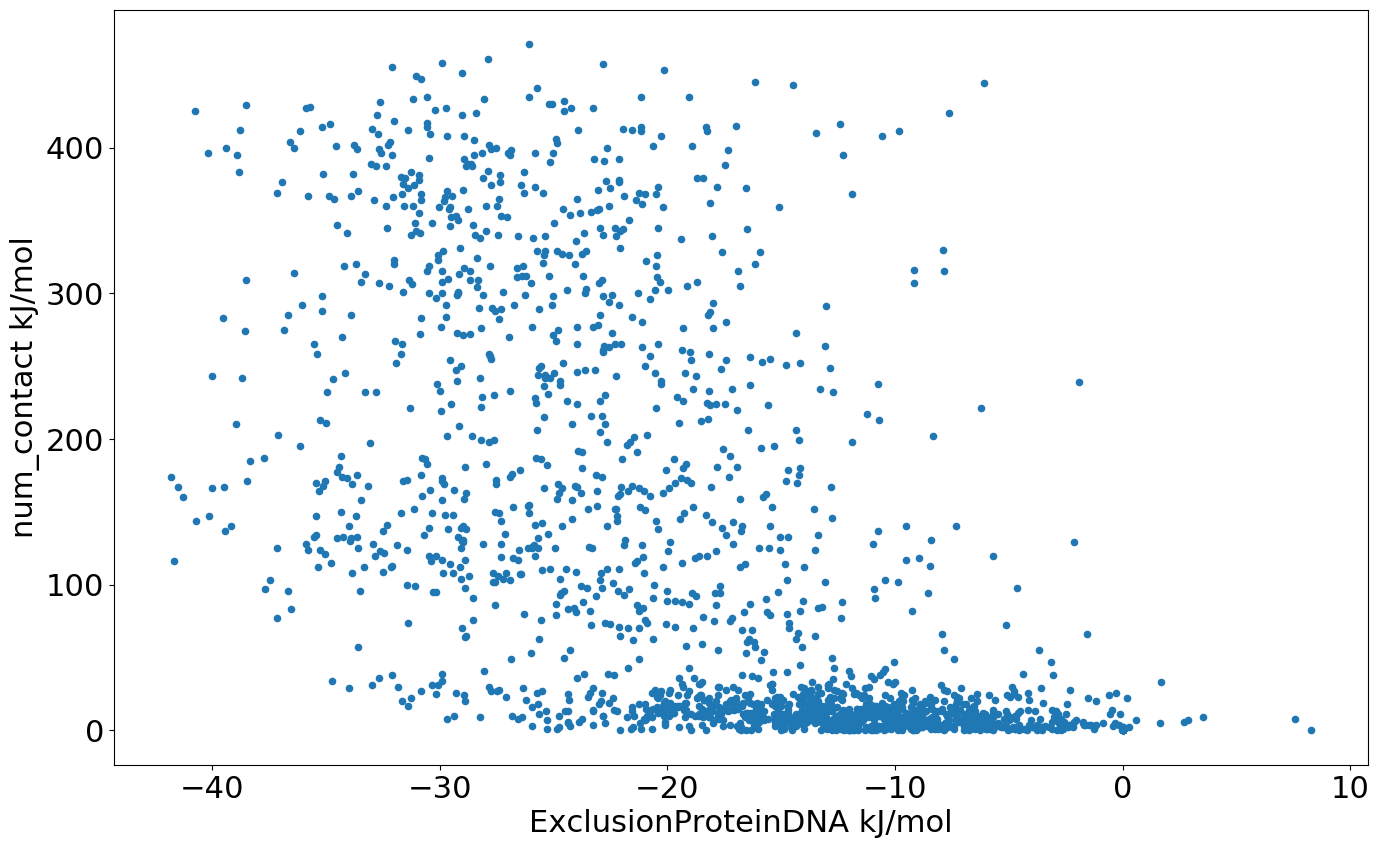

In [82]:
test_energy.plot.scatter("ExclusionProteinDNA kJ/mol", "num_contact kJ/mol")

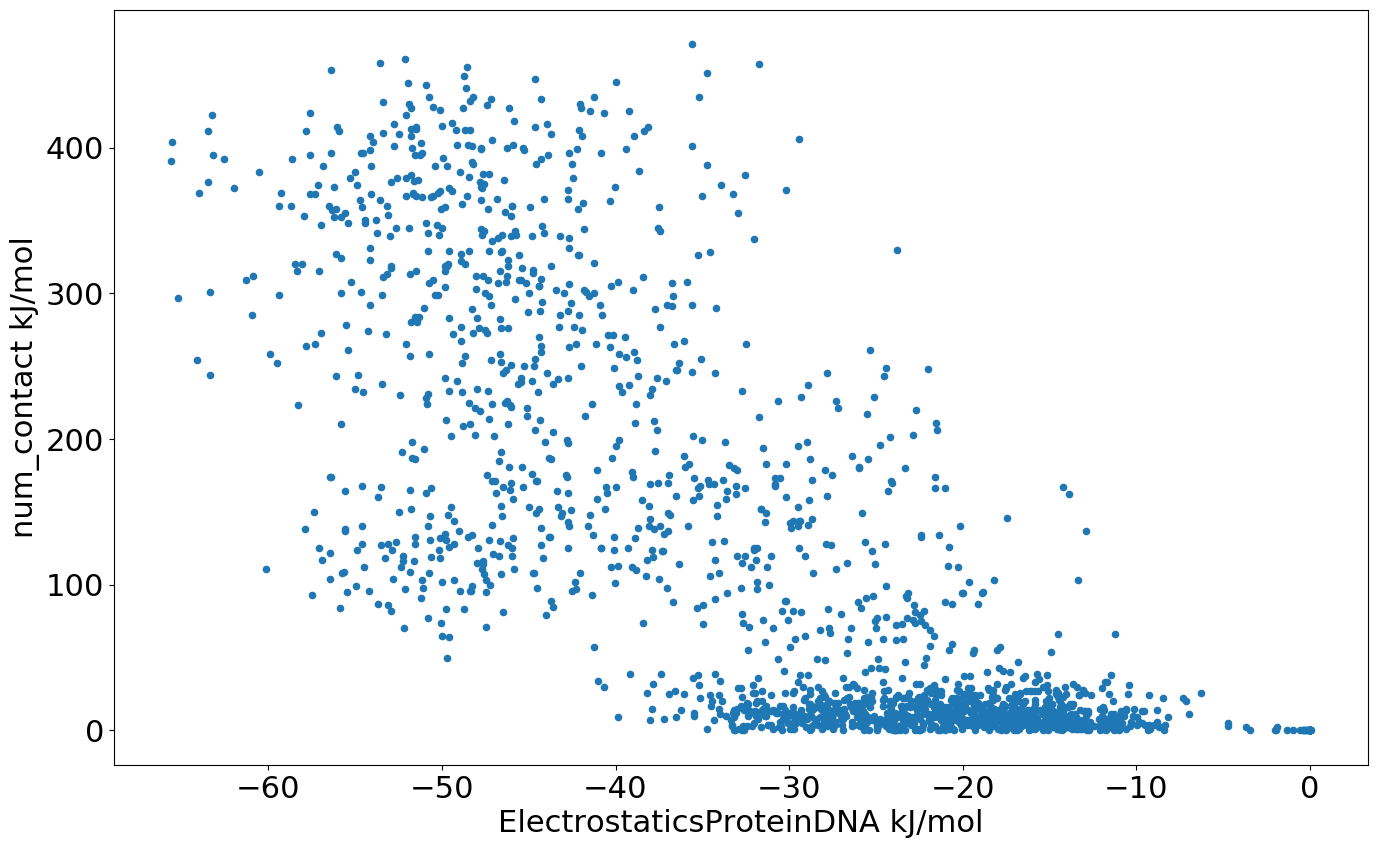

In [78]:
test_energy.plot.scatter("ElectrostaticsProteinDNA kJ/mol", "num_contact kJ/mol")

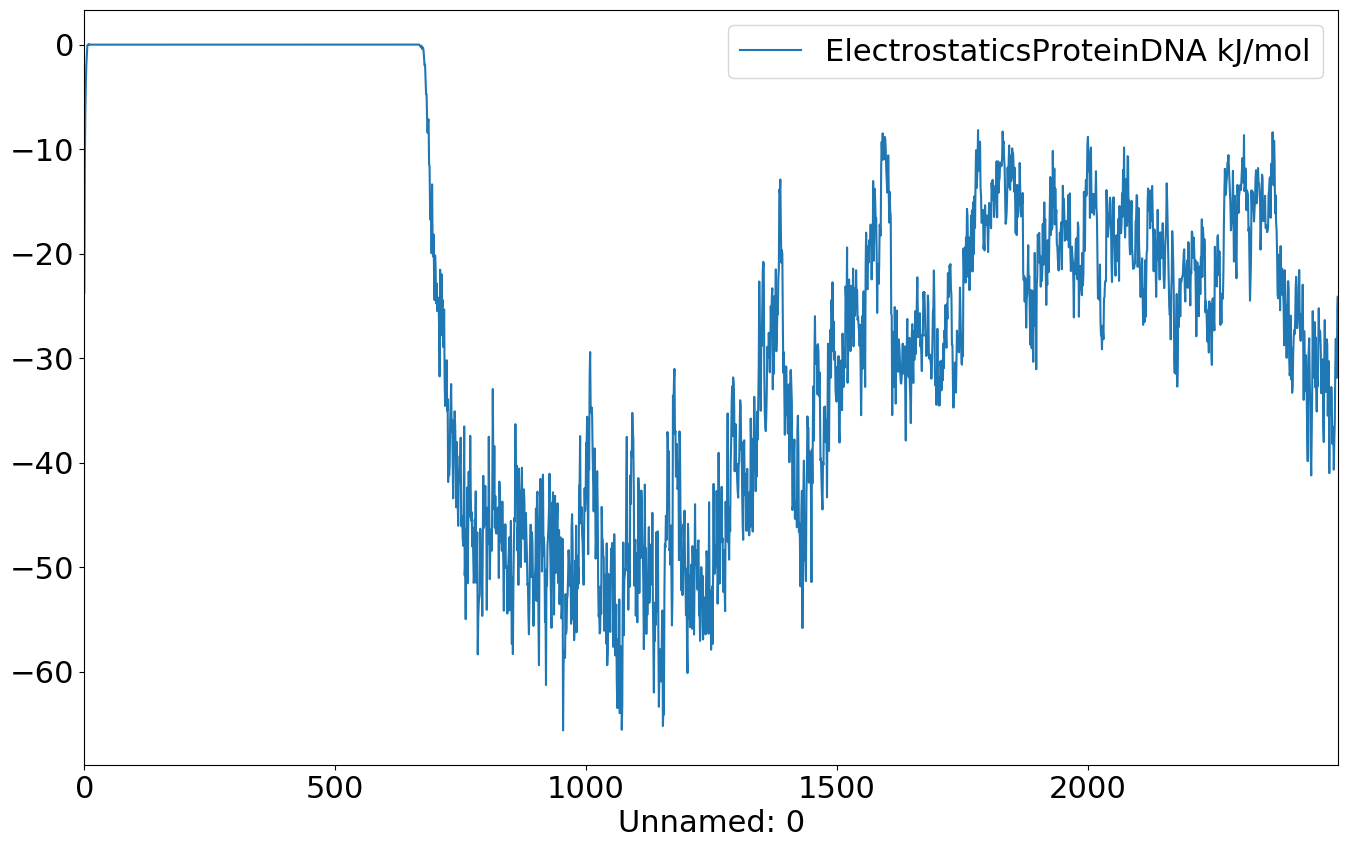

In [74]:
test_energy.plot("Unnamed: 0", "ElectrostaticsProteinDNA kJ/mol")

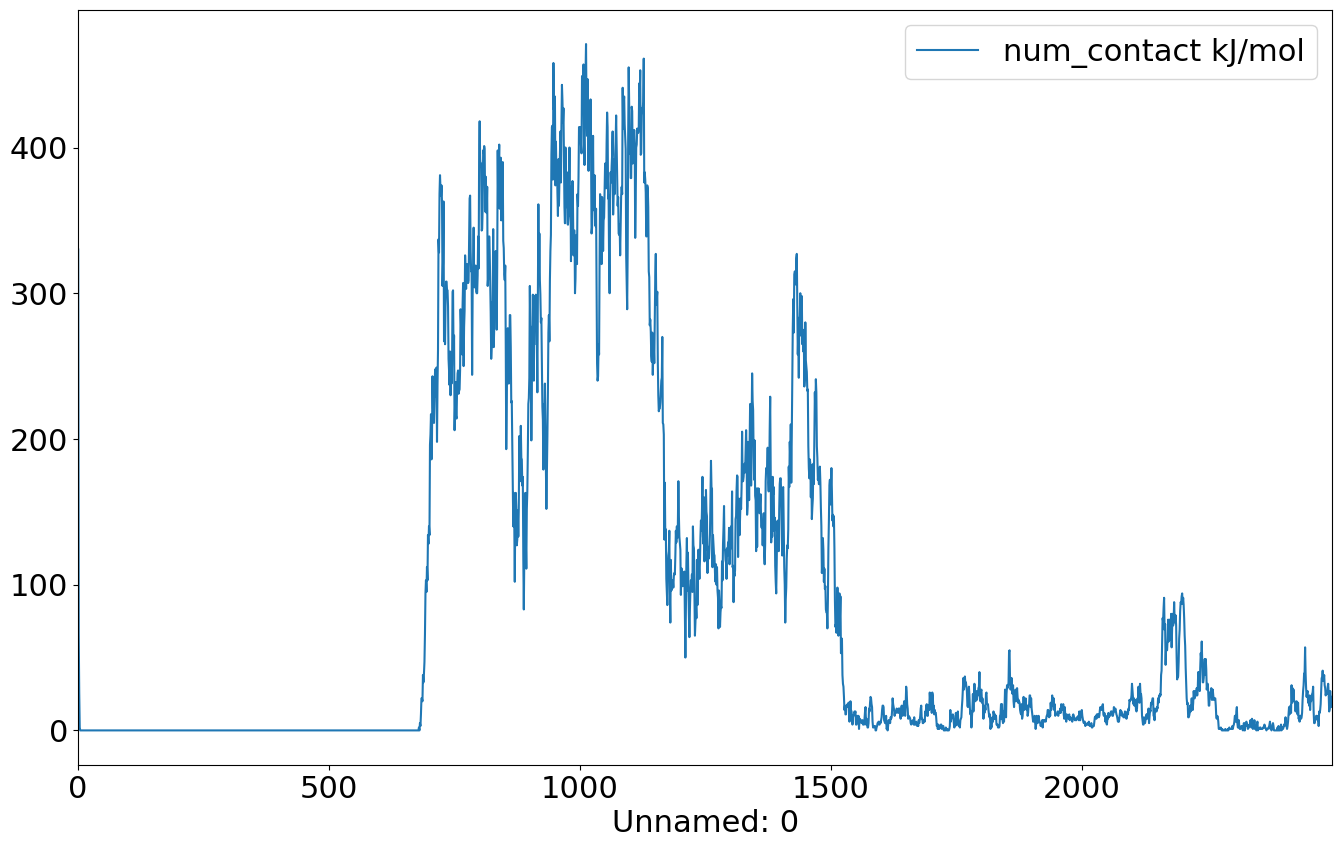

In [73]:
test_energy.plot("Unnamed: 0", "num_contact kJ/mol")

In [71]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/away_and_back_6cta_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0              0       -14743.277344            3387.507080   
1              1       -14744.218750            3769.768311   
2              2       -15594.851562            3177.844238   
3              3       -15569.750000            3250.545898   
4              4       -15415.317383            3390.350586   
...          ...                 ...                    ...   
2495        2495       -16535.242188            2329.931152   
2496        2496       -16534.792969            2324.025879   
2497        2497       -16697.119141            2203.517090   
2498        2498       -16728.023438            2215.313965   
2499        2499       -16893.859375            2138.896484   

      constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0           3181.095459    55.112930   3181.095459      -282.599884   
1           2973.954102    40.931320   2973.954102      -315.059875   
2           2802.504639    38.467113   2802.504639      -293.192719   
3           2663.737793    47.798626   2663.737793      -284.555054   
4           2532.880127    64.296082   2532.880127      -301.096893   
...                 ...          ...           ...              ...   
2495        3171.830566    31.473118   3171.830566      -311.925079   
2496        3161.952637    41.420628   3161.952637      -318.410095   
2497        3128.616455    35.783127   3128.616455      -314.065460   
2498        3119.117432    27.731382   3119.117432      -314.570160   
2499        3142.741455    24.216667   3142.741455      -304.766663   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -301.376160      -166.553040            -36.017151   
1         -307.382080      -186.028870            -47.102608   
2         -327.078186      -173.027252            -46.350685   
3         -315.329620      -195.324402            -42.092461   
4         -304.515198      -168.105972            -39.136078   
...               ...              ...                   ...   
2495      -319.738373      -187.518494            -44.854233   
2496      -331.441406      -209.177612            -42.686298   
2497      -319.630402      -192.000061            -41.501556   
2498      -326.274628      -194.413177            -48.187447   
2499      -320.088470      -199.047974            -41.930946   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             1.144603              14.942951          3387.507080   
1             1.519377              15.634151          3769.768311   
2             0.205168              14.621743          3177.844238   
3             0.614041              15.035866          3250.545898   
4             1.259074              15.239937          3390.350586   
...                ...                    ...                  ...   
2495          1.287337              15.028812          2329.931152   
2496          0.216423              14.326202          2324.025879   
2497          1.384134              15.685166          2203.517090   
2498          1.210778              15.028698          2215.313965   
2499          0.340773              14.628206          2138.896484   

      Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0      3387.507080  3387.506836  3387.506836 -3133.791748     -3133.791748   
1      3769.768066  3769.768555  3769.768311 -3177.640625     -3177.640625   
2      3177.844238  3177.844238  3177.844238 -3240.548096     -3240.548096   
3      3250.545898  3250.545898  3250.545898 -3202.607910     -3202.607910   
4      3390.350830  3390.350830  3390.350586 -3157.799316     -3157.799316   
...            ...          ...          ...          ...              ...   
2495   2329.931152  2329.931396  2329.931152 -3346.525391     -3346.525391   
2496   2324.025879  2324.025879  2324.025879 -3279.152832     -3279.152832   
2497   2203.517090  2203.517090  2203.517090 -3322.068604     -3322.068604   
2498  

In [70]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/run1_with_gaussian_DP_bonds_5ke8_1_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0         1318.062378            2191.486328   
1             1         1059.110596            2085.548096   
2             2         1186.161133            2050.346436   
3             3         1011.422974            2083.816162   
4             4         1400.640259            2126.926025   
..          ...                 ...                    ...   
995         995        -2973.814453             545.449768   
996         996        -2922.785156             548.460205   
997         997        -3008.730957             562.832214   
998         998        -3004.587402             503.152710   
999         999        -3087.812012             447.818024   

     dna_protein_bond kJ/mol  constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0                 123.310959         465.139771   123.310959    465.139771   
1                 141.177795         401.338684   141.177795    401.338684   
2                 154.921951         438.265625   154.921951    438.265625   
3                 171.008118         396.787811   171.008118    396.787811   
4                 172.509384         401.394958   172.509384    401.394958   
..                       ...                ...          ...           ...   
995                25.867199          48.487862    25.867199     48.487862   
996                34.147224          54.069359    34.147224     54.069359   
997                42.897621          40.429024    42.897621     40.429024   
998                31.246567          46.984486    31.246567     46.984486   
999                31.446188          55.420124    31.446188     55.420124   

     Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0        -132.040665       -41.778507        -6.920793             -1.659861   
1         -89.012451       -37.635414        -0.995374             -2.563797   
2         -67.974274       -40.014275       -11.490411             -0.390794   
3         -88.093124       -57.681648        -0.130639             -0.419985   
4         -88.526047       -79.719193        -0.001171             -0.236790   
..               ...              ...              ...                   ...   
995      -180.456451      -173.202744      -119.541153            -17.363888   
996      -171.856720      -177.887390      -130.391052            -19.034998   
997      -177.719711      -184.387573      -127.675903            -16.273609   
998      -159.963287      -181.164917      -123.659653            -19.234161   
999      -175.913483      -189.851608      -128.995712            -17.680061   

     Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0            0.949046               6.744480          2191.486328   
1            3.440506               6.953563          2085.548096   
2           18.083469               8.054574          2050.346436   
3            0.503406               7.036215          2083.816162   
4            0.033664               6.328801          2126.926025   
..                ...                    ...                  ...   
995          0.000001               5.543896           545.449768   
996          0.000000               5.596494           548.460205   
997          0.000000               5.777834           562.832214   
998          0.000000               5.724956           503.152710   
999          0.000000               5.770744           447.818024   

     Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0     2191.486328  2191.486328  2191.486328  -296.311127      -296.311127   
1     2085.548096  2085.548096  2085.548096  -363.035004      -363.035004   
2     2050.346436  2050.346436  2050.346436  -320.190460      -320.190460   
3     2083.816162  2083.816162  2083.816162  -411.821136      -411.821136   
4     2126.926025  2126.926025  2126.926025  -263.573761      -263.573761   
..            ...          ...          ...          ...              .

In [68]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/run1_with_gaussian_DP_bonds_5ke8_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0         1294.149902            2275.665283   
1             1         1308.128418            2173.660645   
2             2          937.787231            2063.595947   
3             3          912.834961            2001.955200   
4             4          979.148193            1968.589844   
..          ...                 ...                    ...   
995         995        -2941.182129             478.560364   
996         996        -2841.946777             554.698547   
997         997        -2867.026123             516.189880   
998         998        -2772.042236             583.697205   
999         999        -2906.770020             531.523926   

     dna_protein_bond kJ/mol  constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0                 161.596542         511.752808   161.596542    511.752808   
1                 155.719101         497.284851   155.719101    497.284851   
2                 153.062012         445.764465   153.062012    445.764465   
3                 143.492126         436.496307   143.492126    436.496307   
4                 131.752380         488.251007   131.752380    488.251007   
..                       ...                ...          ...           ...   
995                50.174953          70.714157    50.174953     70.714157   
996                51.166702          74.730042    51.166702     74.730042   
997                47.693497          69.285011    47.693497     69.285011   
998                57.253700          48.266716    57.253700     48.266716   
999                61.314331          64.602776    61.314331     64.602776   

     Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -93.512497       -71.918991        -0.000000             -0.526819   
1         -63.560673       -70.413048         4.359509             -0.000007   
2         -89.089050       -57.887112       -13.159455             -0.865848   
3         -74.238838       -76.216293       -14.362953             -1.070256   
4         -82.879051       -79.678711         0.000000             -0.490169   
..               ...              ...              ...                   ...   
995      -170.446045      -120.712959      -130.749756             -6.654891   
996      -172.052368      -110.357796      -130.960236             -7.280127   
997      -179.932434      -107.252220      -111.894791             -5.196019   
998      -166.995941      -102.604286      -132.283646             -4.704144   
999      -180.272568      -107.319824      -137.695999             -5.474653   

     Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0            0.294990               5.701427          2275.665283   
1            1.246356               5.479419          2173.660645   
2            0.231472               5.849628          2063.595947   
3            0.066821               6.019565          2001.955200   
4           11.618376               5.872972          1968.589844   
..                ...                    ...                  ...   
995          0.000274               5.670895           478.560364   
996          0.699442               5.964237           554.698547   
997          0.033300               6.011974           516.189880   
998          0.643384               5.867639           583.697205   
999          0.037977               5.718676           531.523926   

     Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0     2275.665283  2275.665283  2275.665283  -410.611237      -410.611237   
1     2173.660645  2173.660645  2173.660645  -289.555237      -289.555237   
2     2063.595947  2063.595947  2063.595947  -347.950073      -347.950073   
3     2001.955200  2001.955200  2001.955200  -356.235260      -356.235260   
4     1968.589844  1968.589844  1968.589844  -340.116333      -340.116333   
..            ...          ...          ...          ...              .

In [31]:

# k = 1
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/run1_with_gaussian_DP_bonds_4y60_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0          983.086792            1802.956177   
1             1         1177.407471            1907.361450   
2             2         1133.267822            1922.537720   
3             3         1049.439941            1889.390137   
4             4         1082.470581            1987.173096   
..          ...                 ...                    ...   
995         995        -3149.861816             432.901428   
996         996        -3141.119141             500.090210   
997         997        -3165.956299             516.768127   
998         998        -3175.075684             460.186829   
999         999        -3157.495605             469.615479   

     dna_protein_bond kJ/mol  constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0                 305.365967         532.813843   305.365967    532.813843   
1                 411.097382         541.691650   411.097382    541.691650   
2                 387.627930         573.596008   387.627930    573.596008   
3                 415.925629         552.049011   415.925629    552.049011   
4                 409.333801         473.042145   409.333801    473.042145   
..                       ...                ...          ...           ...   
995                40.918205         101.049423    40.918205    101.049423   
996                38.773140          78.393486    38.773140     78.393486   
997                46.532040          74.923553    46.532040     74.923553   
998                53.029400          81.138443    53.029400     81.138443   
999                43.067684         107.639351    43.067684    107.639351   

     Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0        -169.371887      -187.834457       -42.030388             -6.190251   
1        -193.146912      -181.590500       -30.537418             -5.469114   
2        -208.907379      -233.581573        -9.757055             -4.415838   
3        -195.556335      -212.000778       -20.429432             -1.027286   
4        -189.076584      -235.714615        -4.617075             -5.072001   
..               ...              ...              ...                   ...   
995      -346.705200      -392.964966      -208.550781            -36.736168   
996      -333.091187      -387.289276      -235.086288            -42.930607   
997      -340.419250      -392.047333      -219.123184            -39.681271   
998      -350.117126      -393.275269      -232.286591            -38.473988   
999      -355.965820      -381.226990      -222.582657            -40.744183   

     Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0            1.116915              19.230509          1802.956177   
1            2.660312              19.913521          1907.361450   
2            4.007346              17.752499          1922.537720   
3            3.412468              18.599459          1889.390137   
4            1.097975              20.485960          1987.173096   
..                ...                    ...                  ...   
995          0.514501              19.026859           432.901428   
996          0.723622              20.281931           500.090210   
997          1.340440              19.441521           516.768127   
998          0.662473              19.219090           460.186829   
999          0.520793              19.499069           469.615479   

     Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0     1802.956177  1802.956177  1802.956177  -381.917175      -381.917175   
1     1907.361450  1907.361450  1907.361450  -237.457535      -237.457535   
2     1922.537720  1922.537720  1922.537720  -283.081085      -283.081085   
3     1889.390137  1889.390137  1889.390137  -330.891388      -330.891388   
4     1987.173096  1987.173096  1987.173096  -258.546295      -258.546295   
..            ...          ...          ...          ...              .

In [33]:
test_energy["Q_protein kJ/mol"].max()

0.8652340000000001

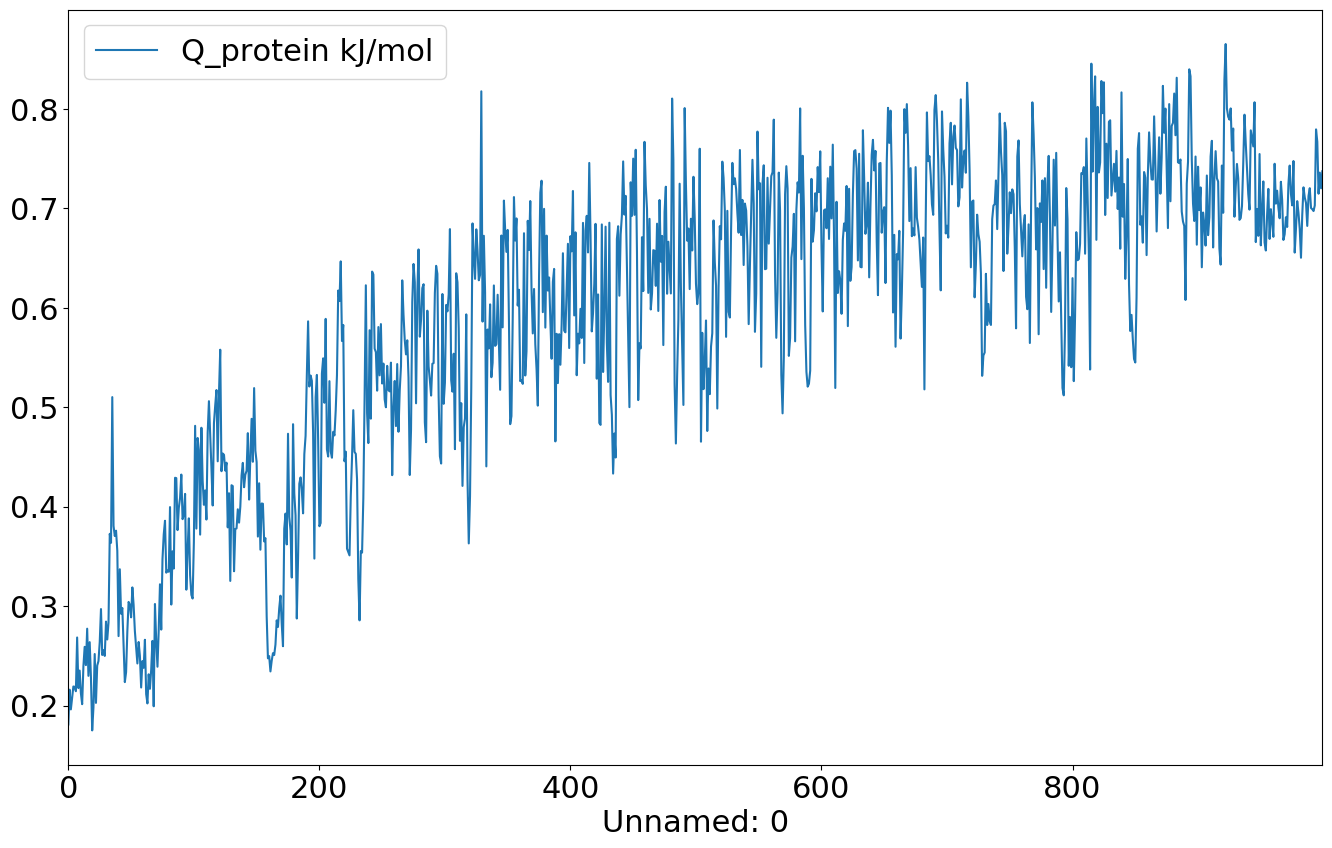

In [32]:
test_energy.plot("Unnamed: 0", "Q_protein kJ/mol")

In [30]:

# k = 2
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/with_PD_bonds_guassian_4y60_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0         1194.661865            1925.875000   
1             1         1159.751953            1895.600098   
2             2         1382.132080            2089.319336   
3             3          972.424072            1903.792236   
4             4         1265.613525            2164.396484   
..          ...                 ...                    ...   
245         245        -3098.014404             439.388031   
246         246        -3076.020508             447.632355   
247         247        -3115.384277             448.884155   
248         248        -3025.731445             517.636780   
249         249        -3114.592529             432.021301   

     dna_protein_bond kJ/mol  constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0                 343.178833         582.263428   343.178833    582.263428   
1                 373.570312         569.859497   373.570312    569.859497   
2                 383.328094         550.652710   383.328094    550.652710   
3                 396.040009         507.319397   396.040009    507.319397   
4                 370.114380         513.952881   370.114380    513.952881   
..                       ...                ...          ...           ...   
245                61.786957          83.955124    61.786957     83.955124   
246                65.625618          93.370041    65.625618     93.370041   
247                63.775341          89.652168    63.775341     89.652168   
248                72.398193          73.062027    72.398193     73.062027   
249                60.591187         100.215302    60.591187    100.215302   

     Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0        -191.129395      -200.522049        -8.844051             -5.892312   
1        -182.325562      -169.061218       -18.582636             -3.819844   
2        -190.504822      -180.298157       -32.687248             -6.376974   
3        -219.727951      -206.827454       -46.574928             -9.222032   
4        -229.986252      -244.302689       -15.728998             -7.433242   
..               ...              ...              ...                   ...   
245      -346.147675      -382.960999      -226.933823            -38.113251   
246      -352.820618      -383.535156      -218.528107            -39.809158   
247      -353.325226      -387.130249      -226.265427            -37.378712   
248      -336.939362      -398.881287      -236.442047            -40.360535   
249      -333.146912      -389.190826      -227.966461            -36.938545   

     Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0            4.430345              19.592144          1925.875000   
1            1.017394              20.566120          1895.600098   
2            5.247051              22.353235          2089.319336   
3            1.964947              19.307482          1903.792236   
4            2.218972              23.141165          2164.396484   
..                ...                    ...                  ...   
245          0.397562              20.144129           439.388031   
246          0.224387              19.136839           447.632355   
247          0.134139              19.464779           448.884155   
248          1.222721              19.822163           517.636780   
249          0.640079              19.152588           432.021301   

     Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0     1925.875000  1925.875000  1925.875122  -317.784790      -317.784790   
1     1895.600098  1895.600098  1895.600098  -266.969635      -266.969635   
2     2089.319336  2089.319336  2089.319336  -308.964233      -308.964233   
3     1903.792236  1903.792236  1903.792236  -358.498383      -358.498383   
4     2164.396484  2164.396484  2164.396484  -317.445618      -317.445618   
..            ...          ...          ...          ...              .

In [28]:

# k = 2
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/with_PD_bonds_4y60_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0         2254.621826            1884.842163   
1             1         1079.203857            1765.301514   
2             2          641.196533            1864.266357   
3             3          835.455811            1906.445801   
4             4          840.524536            2002.485107   
..          ...                 ...                    ...   
245         245        -3047.097656             539.437195   
246         246        -3066.231934             500.722992   
247         247        -3101.478027             481.901276   
248         248        -3080.178467             477.080261   
249         249        -3077.134766             491.615234   

     dna_protein_bond kJ/mol  constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0                1367.419189         447.480713  1367.419189    447.480713   
1                 547.314026         391.355133   547.314026    391.355133   
2                 333.546265         346.880981   333.546265    346.880981   
3                 328.974182         432.132507   328.974182    432.132507   
4                 323.927277         286.666199   323.927277    286.666199   
..                       ...                ...          ...           ...   
245                85.045540          90.160553    85.045540     90.160553   
246                79.111328          95.419388    79.111328     95.419388   
247                79.408432          91.452530    79.408432     91.452530   
248                84.760193          85.664452    84.760193     85.664452   
249                75.613014          88.084351    75.613014     88.084351   

     Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0        -155.591949      -154.873993        20.455353             -1.546384   
1        -172.283600      -148.372696        -1.869594             -1.454026   
2        -212.340179      -162.650925       -31.434629             -4.508062   
3        -213.867615      -189.955566        -4.882968             -4.351864   
4        -232.231293      -210.772125       -35.058170             -5.246505   
..               ...              ...              ...                   ...   
245      -355.656555      -385.674530      -228.708313            -39.631550   
246      -333.484894      -383.074890      -230.144028            -42.259773   
247      -365.864136      -383.480133      -227.512390            -43.542515   
248      -336.339600      -382.398651      -228.079895            -35.343327   
249      -338.356079      -379.612366      -229.751495            -37.307240   

     Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0            4.947803              21.500435          1884.842163   
1            8.636497              22.649265          1765.301392   
2            1.696336              25.297272          1864.266357   
3            6.078365              22.633366          1906.445801   
4            7.996044              21.503525          2002.485107   
..                ...                    ...                  ...   
245          0.452528              19.393639           539.437195   
246          0.229516              19.360062           500.722992   
247          0.298840              20.546011           481.901276   
248          0.299378              19.766026           477.080261   
249          0.349876              19.314741           491.615234   

     Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0     1884.842163  1884.842163  1884.842163  -318.979736      -318.979736   
1     1765.301392  1765.301392  1765.301514  -257.972504      -257.972504   
2     1864.266357  1864.266357  1864.266357  -358.455170      -358.455170   
3     1906.445801  1906.445801  1906.445801  -352.958618      -352.958618   
4     2002.485107  2002.485107  2002.485107  -294.808746      -294.808746   
..            ...          ...          ...          ...              .

In [29]:
test_energy["Q_protein kJ/mol"].max()

0.689507

In [27]:

# k = 2
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/run1_local_correct_4y60_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  constraint kJ/mol  \
0             0         1024.779541            1981.796143         513.163086   
1             1         1129.307251            2051.030273         464.935486   
2             2          871.085815            1939.898193         462.308929   
3             3          972.906311            1879.854736         568.627563   
4             4          607.015015            1720.940552         523.067383   
..          ...                 ...                    ...                ...   
245         245        -3158.423828             492.199097          72.711975   
246         246        -3084.489746             496.369141          87.146332   
247         247        -3130.397949             488.910980          68.754333   
248         248        -3149.091797             458.287506          86.578819   
249         249        -3185.780029             455.359314          94.224274   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     150.405823    513.163086      -224.061295      -191.662842   
1     199.281891    464.935486      -187.868256      -181.521484   
2     135.370819    462.308929      -161.147034      -172.501312   
3     202.315948    568.627563      -141.471985      -197.419327   
4     141.086456    523.067383      -212.033661      -209.928238   
..           ...           ...              ...              ...   
245    32.896370     72.711975      -344.698242      -394.221069   
246    51.662689     87.146332      -341.792847      -389.205688   
247    35.429142     68.754333      -336.965820      -384.444855   
248    44.853584     86.578819      -334.835785      -382.172272   
249    37.347031     94.224274      -346.473724      -388.220306   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -36.204247             -8.702222          4.023199   
1          18.625072            -11.625980          4.016660   
2         -19.371519             -6.444008          2.580043   
3         -42.912033             -7.014514         13.645443   
4         -41.042408             -3.848791          8.211859   
..               ...                   ...               ...   
245      -229.645401            -39.437584          0.483373   
246      -221.647232            -40.936951          0.017211   
247      -227.005905            -38.756344          0.841997   
248      -230.566696            -38.975010          0.668995   
249      -236.978943            -43.721870          0.039354   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0                18.931265          1981.796143   1981.796143  1981.796143   
1                20.047726          2051.030273   2051.030273  2051.030273   
2                19.629265          1939.898193   1939.898193  1939.898193   
3                20.922750          1879.854736   1879.854736  1879.854736   
4                22.815174          1720.940552   1720.940552  1720.940552   
..                     ...                  ...           ...          ...   
245              19.190380           492.199097    492.199097   492.199097   
246              18.731371           496.369141    496.369141   496.369141   
247              19.112959           488.910980    488.910980   488.910980   
248              19.120163           458.287506    458.287506   458.287506   
249              19.769260           455.359314    455.359314   455.359314   

     Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    1981.796143  -307.988678      -307.988678     -260.369598     -6.438892   
1    2051.030273  -294.601196      -294.601196     -260.820709     -5.191739   
2    1939.898193  -340.365051      -340.365051     -269.780884     -3.722969   
3    1879.854736  -335.569855      -335.569855     -262.436218     -1.021199   
4    1720.940552  -283.356384      -283.356384     -283.151428     -4.212481   
..           ...          ...

In [24]:

# k = 3
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/run1_local_correct_4y60_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  constraint kJ/mol  \
0             0         1000.128174            2008.150513         539.736206   
1             1          979.464233            1973.476440         547.987671   
2             2          989.517822            1795.941895         618.334106   
3             3          861.703247            1889.093994         551.062378   
4             4          800.997498            1795.581665         562.000244   
..          ...                 ...                    ...                ...   
245         245        -3232.247559             493.291199          67.924164   
246         246        -3196.555908             494.504608          87.529251   
247         247        -3201.828857             480.625000          79.809479   
248         248        -3245.740234             499.466248          77.592896   
249         249        -3320.696289             412.176697          76.674164   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     118.803963    539.736206      -169.429520      -166.409103   
1     164.696259    547.987671      -164.293015      -133.213013   
2     194.644989    618.334106      -197.000641      -175.822754   
3     168.150192    551.062378      -205.927917      -195.400452   
4     137.287903    562.000244      -197.364059      -181.602661   
..           ...           ...              ...              ...   
245    18.897167     67.924164      -337.679749      -396.115265   
246    43.233124     87.529251      -353.592926      -380.764587   
247    41.676064     79.809479      -341.126648      -385.826538   
248    33.591099     77.592896      -365.210724      -387.177673   
249    47.713177     76.674164      -345.124817      -393.195068   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -19.747395             -4.501494          0.301754   
1          -5.688993             -1.789339          2.358796   
2         -12.391301             -3.391309          9.308618   
3          -1.739706             -3.963280         12.298592   
4          -6.787374             -3.246963          0.354797   
..               ...                   ...               ...   
245      -222.958954            -38.680763          1.322862   
246      -229.987671            -38.466213          0.262420   
247      -228.510483            -38.921139          0.063742   
248      -226.050186            -46.103413          0.138572   
249      -226.364380            -41.035011          0.363228   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0                21.531559          2008.150513   2008.150513  2008.150513   
1                24.037910          1973.476440   1973.476440  1973.476440   
2                22.124592          1795.941895   1795.941895  1795.941895   
3                23.689838          1889.093994   1889.093994  1889.093994   
4                25.994511          1795.581665   1795.581665  1795.581665   
..                     ...                  ...           ...          ...   
245              19.241531           493.291199    493.291199   493.291199   
246              19.242783           494.504608    494.504608   494.504608   
247              18.859001           480.625000    480.625000   480.625000   
248              19.812820           499.466248    499.466248   499.466248   
249              19.226273           412.176697    412.176697   412.176697   

     Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    2008.150513  -339.162628      -339.162628     -260.874664     -2.045563   
1    1973.476440  -358.356537      -358.356537     -266.276276    -11.421289   
2    1795.941895  -317.022919      -317.022919     -261.068542     -4.339576   
3    1889.093994  -322.132782      -322.132782     -261.024536     -4.511775   
4    1795.581665  -309.088318      -309.088318     -258.514832     -2.280886   
..           ...          ...

In [25]:
test_energy["Q_protein kJ/mol"].max()

0.678333

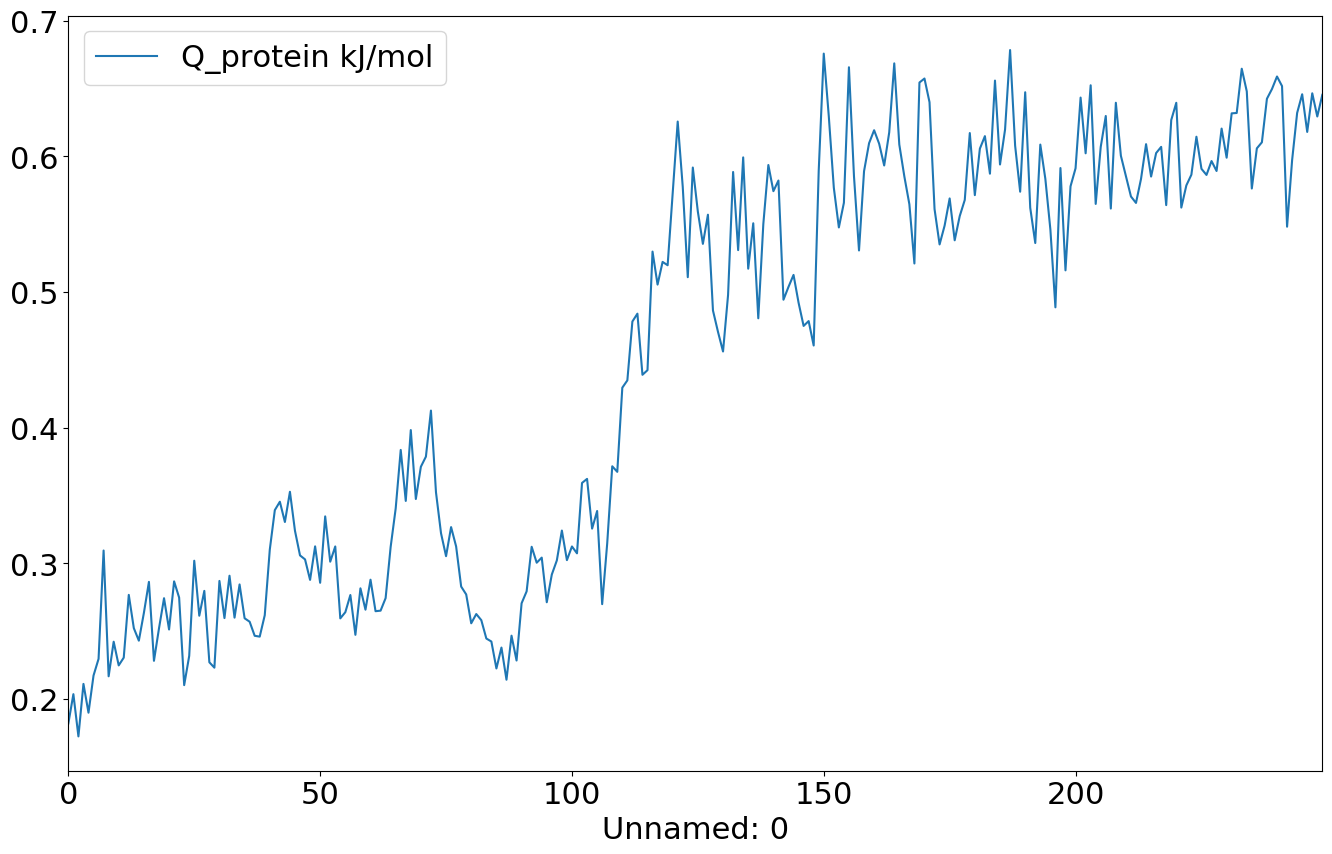

In [26]:
test_energy.plot("Unnamed: 0", "Q_protein kJ/mol")

In [20]:


test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/run1_local_correct_4y60_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  constraint kJ/mol  \
0             0         1082.176880            1925.405884         595.023376   
1             1          996.624634            2075.761230         549.871216   
2             2         1102.039551            2179.960205         564.066895   
3             3          928.742798            1919.845825         564.292603   
4             4          541.763977            1811.974854         562.585693   
..          ...                 ...                    ...                ...   
995         995        -3069.083496             452.595367         152.521011   
996         996        -3064.737793             462.006470         130.915588   
997         997        -3032.961182             498.512939         153.732666   
998         998        -3057.704590             525.446655         105.362595   
999         999        -2965.020996             562.101807         140.512054   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     166.989548    595.023376      -172.685181      -190.959869   
1     132.663055    549.871216      -210.826340      -189.028381   
2     176.151382    564.066895      -216.700073      -219.542679   
3     156.906433    564.292603      -186.117188      -175.552368   
4     107.872177    562.585693      -231.082153      -207.661545   
..           ...           ...              ...              ...   
995    35.253174    152.521011      -360.335754      -376.429504   
996    38.573784    130.915588      -343.584259      -395.296692   
997    42.820435    153.732666      -344.704407      -396.713440   
998    33.846207    105.362595      -349.397156      -379.132874   
999    26.425442    140.512054      -330.774048      -389.894928   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -10.722409             -6.901467          2.944055   
1          -3.490806             -7.186402          7.805028   
2         -30.625162             -5.170397          1.031549   
3          -6.907540             -3.633638          3.651987   
4         -35.324242             -2.743639          2.565361   
..               ...                   ...               ...   
995      -219.925400            -39.317959          0.114170   
996      -216.627045            -36.519203          1.288507   
997      -226.427216            -40.393776          0.002420   
998      -236.260483            -42.891659          0.284987   
999      -228.543381            -40.391975          0.733526   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0                19.519566          1925.405884   1925.405884  1925.405884   
1                19.891518          2075.761230   2075.761230  2075.761230   
2                19.594673          2179.960205   2179.960205  2179.959961   
3                19.742455          1919.845825   1919.845825  1919.845825   
4                20.122301          1811.974854   1811.974854  1811.974854   
..                     ...                  ...           ...          ...   
995              19.216095           452.595367    452.595367   452.595367   
996              18.862770           462.006470    462.006470   462.006470   
997              19.085316           498.512939    498.512939   498.512939   
998              18.913128           525.446655    525.446655   525.446655   
999              18.849590           562.101807    562.101807   562.101807   

     Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    1925.405884  -323.980988      -323.980988     -272.317993     -0.115348   
1    2075.761230  -302.742889      -302.742889     -283.210785     -8.049426   
2    2179.959961  -311.728912      -311.728912     -277.981323     -2.547462   
3    1919.845825  -357.834412      -357.834412     -288.855591     -8.477329   
4    1811.974854  -362.854065      -362.854065     -287.362762     -8.948298   
..           ...          ...

In [23]:
test_energy["Q_protein kJ/mol"].max()

0.8469270000000001

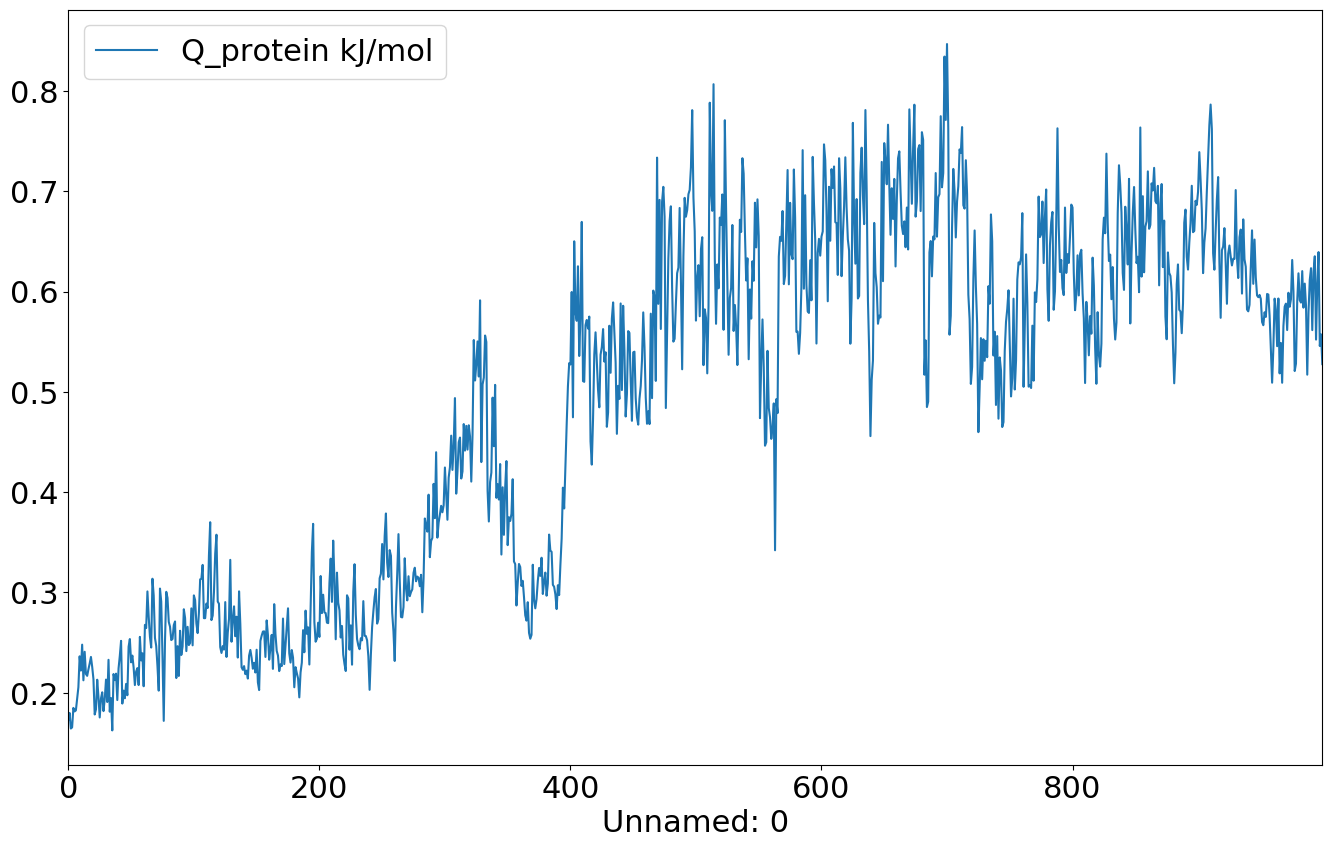

In [22]:
test_energy.plot("Unnamed: 0", "Q_protein kJ/mol")

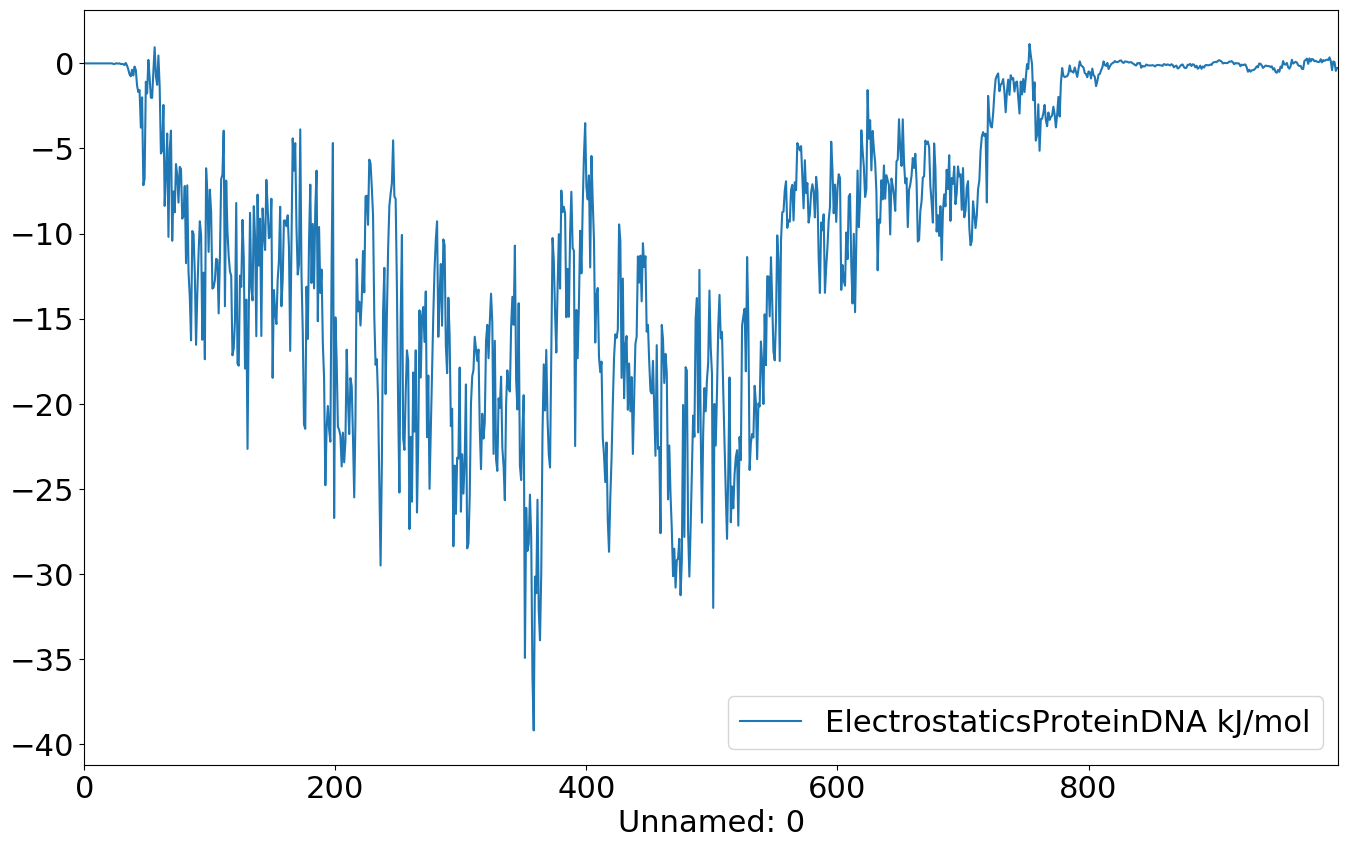

In [21]:
test_energy.plot("Unnamed: 0", "ElectrostaticsProteinDNA kJ/mol")

In [16]:


test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/run1_local_with_DP_bonds_4y60_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0         2088.313965            2078.508789   
1             1         1367.910400            2136.673828   
2             2          779.799377            1647.184082   
3             3          919.063110            1860.081909   
4             4         1208.641968            2203.323242   
..          ...                 ...                    ...   
995         995        -3002.464355             475.683868   
996         996        -2960.824463             530.802063   
997         997        -2961.260742             490.864288   
998         998        -2969.428223             496.591614   
999         999        -3025.723633             432.977875   

     dna_protein_bond kJ/mol  constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0                 905.877319         432.354156   905.877319    432.354156   
1                 405.895050         339.611694   405.895050    339.611694   
2                 458.755463         366.955231   458.755463    366.955231   
3                 435.101288         336.782104   435.101288    336.782104   
4                 363.317749         401.466217   363.317749    401.466217   
..                       ...                ...          ...           ...   
995                85.743340          95.578140    85.743340     95.578140   
996                79.410736          70.511978    79.410736     70.511978   
997                90.094406         106.459702    90.094406    106.459702   
998                74.290222          82.786804    74.290222     82.786804   
999                73.602959         103.746231    73.602959    103.746231   

     Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0        -159.737076      -163.882996         2.362528             -1.496012   
1        -207.928467      -115.871429        -5.903988             -1.580091   
2        -164.635025      -202.601624       -19.283304             -2.219652   
3        -154.282532      -201.642914       -27.439941             -7.506395   
4        -196.059570      -189.042831        -4.841312             -2.970710   
..               ...              ...              ...                   ...   
995      -350.379059      -387.553986      -222.846344            -38.363651   
996      -322.812134      -382.872131      -226.463669            -41.853249   
997      -338.751984      -378.603638      -226.182037            -38.953506   
998      -342.470001      -386.838043      -223.687332            -39.992573   
999      -340.665039      -376.611145      -236.747238            -39.262222   

     Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0            8.290442              19.216988          2078.508789   
1           12.857150              25.773647          2136.673828   
2           17.755030              22.915680          1647.184082   
3           11.837164              23.364021          1860.081909   
4            3.269238              23.414455          2203.323242   
..                ...                    ...                  ...   
995          0.166569              19.150223           475.683868   
996          0.044861              19.402721           530.802063   
997          0.000000              19.665730           490.864288   
998          0.037694              18.857454           496.591614   
999          0.342360              18.561216           432.977875   

     Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0     2078.508789  2078.508789  2078.508789  -401.600983      -401.600983   
1     2136.673828  2136.673828  2136.673828  -369.678711      -369.678711   
2     1647.184082  1647.184082  1647.184082  -291.468933      -291.468933   
3     1860.081909  1860.081909  1860.081909  -296.818115      -296.818115   
4     2203.323242  2203.323242  2203.323242  -376.588867      -376.588867   
..            ...          ...          ...          ...              .

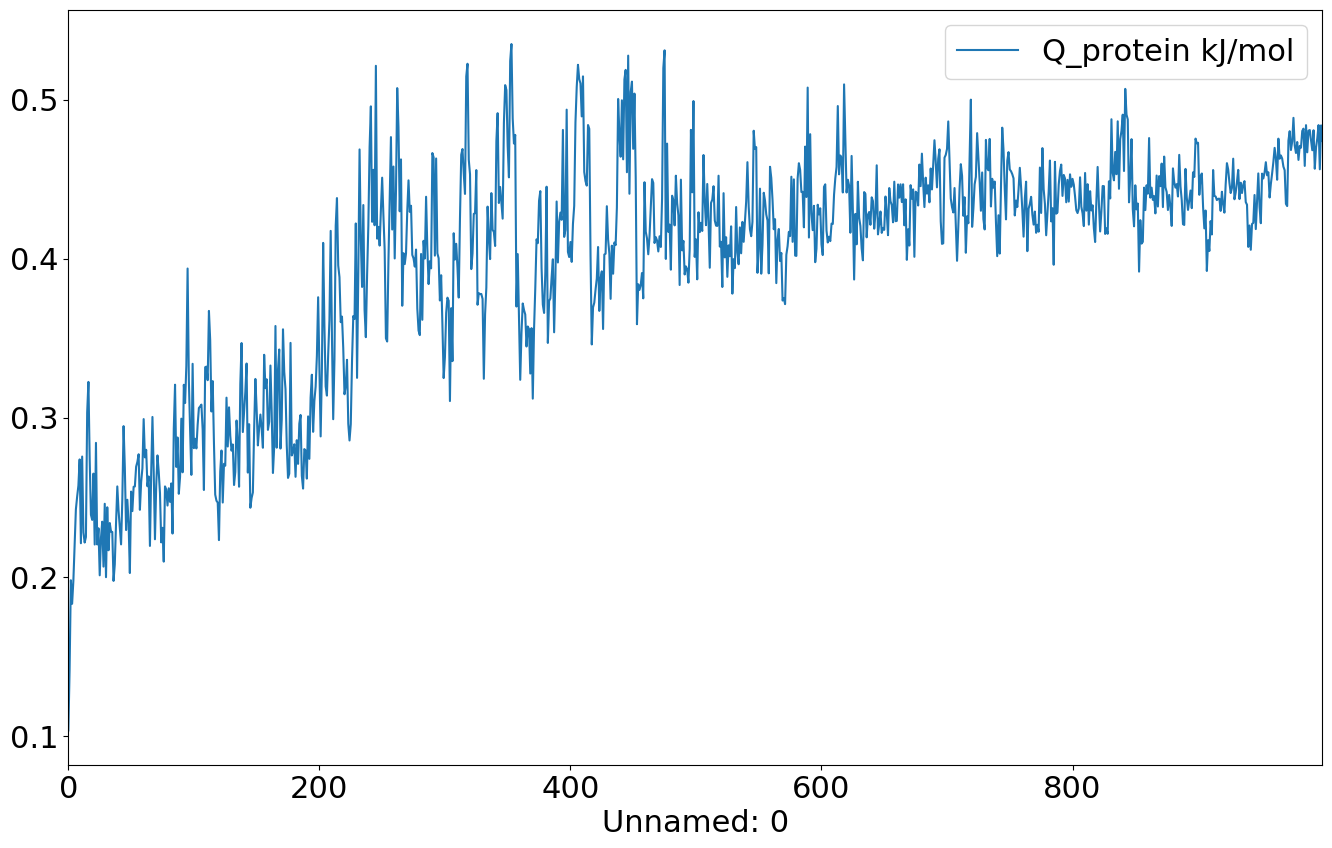

In [17]:
test_energy.plot("Unnamed: 0", "Q_protein kJ/mol")

In [11]:


test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/native_with_DP_bonds_4y60_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0        -2699.730713             680.539429   
1             1        -2611.925537             719.089661   
2             2        -2662.556641             694.320984   
3             3        -2721.850342             695.070129   
4             4        -2738.814453             658.747314   
..          ...                 ...                    ...   
245         245        -2747.729492             711.295288   
246         246        -2716.127930             704.222107   
247         247        -2719.772705             695.687439   
248         248        -2705.848633             680.997131   
249         249        -2640.365967             756.452637   

     dna_protein_bond kJ/mol  constraint kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0                  60.570366         132.621796    60.570366    132.621796   
1                  66.261383         136.650299    66.261383    136.650299   
2                  59.803658         123.551888    59.803658    123.551888   
3                  65.322525         121.277725    65.322525    121.277725   
4                  84.781540         140.143814    84.781540    140.143814   
..                       ...                ...          ...           ...   
245                76.268761         114.554710    76.268761    114.554710   
246                67.757370         144.353149    67.757370    144.353149   
247                60.331821         141.465256    60.331821    141.465256   
248                68.552170         123.740288    68.552170    123.740288   
249                85.896439         114.379646    85.896439    114.379646   

     Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0        -341.896301      -350.991669      -225.373367            -31.557611   
1        -329.996857      -342.179871      -200.158890            -33.334087   
2        -321.294678      -370.048370      -203.869904            -38.536827   
3        -333.259003      -364.631409      -219.685196            -38.292812   
4        -328.479614      -357.212158      -218.033203            -37.900898   
..               ...              ...              ...                   ...   
245      -318.049500      -370.464111      -217.579865            -36.409447   
246      -337.592987      -361.639526      -226.498535            -35.209896   
247      -323.605896      -363.948059      -228.967834            -35.926090   
248      -326.217316      -367.463531      -215.130707            -37.726742   
249      -326.478210      -379.116974      -208.333191            -36.097183   

     Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0            0.326982              19.576027           680.539429   
1            0.115507              19.516079           719.089661   
2            0.876580              20.169744           694.320984   
3            1.508956              21.993513           695.070129   
4            0.275371              20.636593           658.747314   
..                ...                    ...                  ...   
245          1.420260              19.285393           711.295288   
246          0.255442              20.533215           704.222107   
247          0.423843              19.229902           695.687439   
248          1.862479              19.366589           680.997131   
249          2.886812              19.405453           756.452637   

     Chain kJ/mol  Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0      680.539429  680.539429   680.539429  -728.190552      -728.190552   
1      719.089661  719.089661   719.089661  -685.073303      -685.073303   
2      694.320984  694.320984   694.320984  -660.942261      -660.942261   
3      695.070129  695.070129   695.070129  -678.553040      -678.553040   
4      658.747314  658.747314   658.747314  -707.661072      -707.661072   
..            ...         ...          ...          ...              ...   
2

In [13]:

test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/native_4y60_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  constraint kJ/mol  \
0             0        -2693.327148             667.712158         166.876556   
1             1        -2768.368164             671.086487         129.424698   
2             2        -2650.918945             796.540283         100.345680   
3             3        -2774.744629             657.371155         119.771149   
4             4        -2773.488770             698.844849         112.633728   
..          ...                 ...                    ...                ...   
245         245        -2677.777100             723.690491         134.460983   
246         246        -2537.766357             925.569763         109.832726   
247         247        -2729.502441             700.158508         141.033463   
248         248        -2708.869385             700.398315         108.728043   
249         249        -2696.270508             646.327820         174.891510   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0      50.261482    166.876556      -332.899963      -369.063293   
1      48.426983    129.424698      -334.713531      -361.882263   
2      73.218719    100.345680      -341.466034      -364.907867   
3      42.125145    119.771149      -336.720428      -381.044037   
4      46.912674    112.633728      -322.390839      -378.980286   
..           ...           ...              ...              ...   
245    42.747536    134.460983      -328.686523      -371.768646   
246    45.510765    109.832726      -318.239288      -382.803162   
247    64.737442    141.033463      -319.260895      -376.820374   
248    61.983536    108.728043      -344.921082      -351.655457   
249    51.150246    174.891510      -328.904358      -370.321564   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -211.376114            -34.592678          1.231306   
1        -232.340408            -38.304050          0.403983   
2        -219.472595            -37.754959          1.469082   
3        -200.905945            -34.907841          0.012123   
4        -213.020660            -38.712315          0.026223   
..               ...                   ...               ...   
245      -218.915314            -37.493256          1.074495   
246      -212.655746            -33.763058          0.094523   
247      -215.473373            -34.322605          0.097829   
248      -198.903290            -39.133198          0.052734   
249      -214.202194            -35.595234          0.778098   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol  Chi kJ/mol  \
0                19.750187           667.712158    667.712158  667.712158   
1                19.440002           671.086487    671.086487  671.086487   
2                20.208855           796.540283    796.540283  796.540283   
3                19.019665           657.371155    657.371155  657.371155   
4                19.960886           698.844849    698.844849  698.844849   
..                     ...                  ...           ...         ...   
245              18.593029           723.690491    723.690491  723.690491   
246              18.182850           925.569763    925.569763  925.569763   
247              17.574776           700.158508    700.158508  700.158508   
248              19.490358           700.398315    700.398315  700.398315   
249              19.459772           646.327820    646.327820  646.327820   

     Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0     667.712158  -715.235596      -715.235596     -351.189392    -73.361115   
1     671.086487  -715.766418      -715.766418     -368.017456    -59.343334   
2     796.540283  -722.702209      -722.702209     -377.000549    -64.620903   
3     657.371155  -733.446228      -733.446228     -359.843658    -65.249954   
4     698.844849  -735.387878      -735.387878     -390.094177    -73.015915   
..           ...          ...            

In [14]:
test_energy.columns

Index(['Unnamed: 0', 'TotalEnergy kJ/mol', 'dna_constraint kJ/mol',
       'constraint kJ/mol', 'Bond kJ/mol', 'Angle kJ/mol', 'Stacking kJ/mol',
       'Dihedral kJ/mol', 'BasePair kJ/mol', 'CrossStacking kJ/mol',
       'Exclusion kJ/mol', 'Electrostatics kJ/mol', 'Connectivity kJ/mol',
       'Chain kJ/mol', 'Chi kJ/mol', 'Excl kJ/mol', 'rama kJ/mol',
       'rama_pro kJ/mol', 'contact kJ/mol', 'beta1 kJ/mol', 'beta2 kJ/mol',
       'beta3 kJ/mol', 'pap1 kJ/mol', 'pap2 kJ/mol', 'fm kJ/mol',
       'ExclusionProteinDNA kJ/mol', 'ElectrostaticsProteinDNA kJ/mol',
       'Q_protein kJ/mol', 'Q_value_sigma5', 'Q_value_sigma3',
       'Q_value_sigma1', 'Q_value_sym_sigma5', 'Q_value_sym_sigma3',
       'Q_value_sym_sigma1'],
      dtype='object')

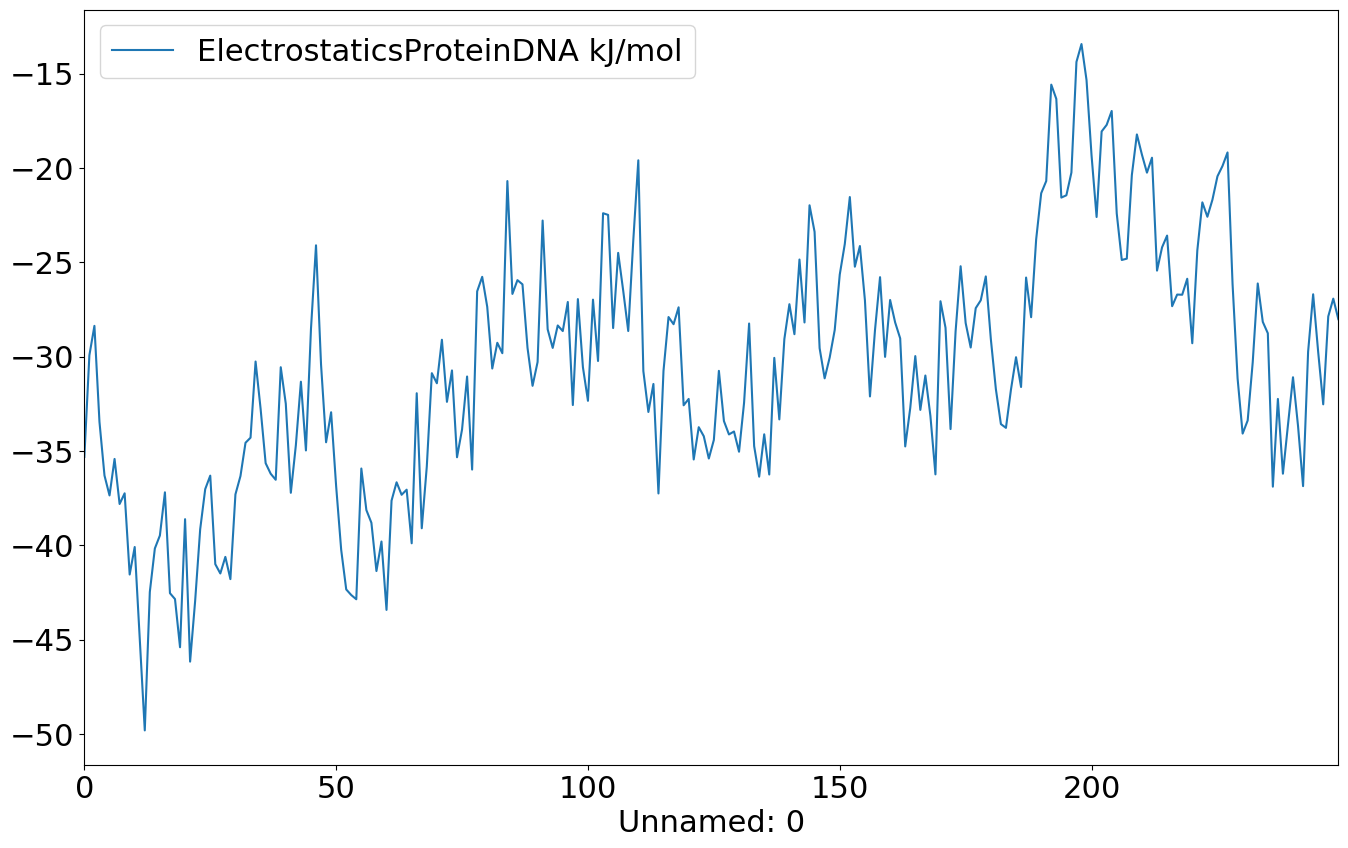

In [15]:
test_energy.plot("Unnamed: 0", "ElectrostaticsProteinDNA kJ/mol")

In [18]:
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/run1_local_4y60_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  constraint kJ/mol  \
0             0         1149.457275            1997.370972         718.133179   
1             1          796.982666            1723.353027         568.413513   
2             2          903.166504            2006.876709         530.537048   
3             3          942.549805            2031.681396         513.913940   
4             4          863.594238            1924.665039         498.520203   
..          ...                 ...                    ...                ...   
995         995        -3158.782959             443.530365          89.397293   
996         996        -3151.521973             453.091309         106.974136   
997         997        -3073.408691             458.516937         129.758209   
998         998        -3155.346191             475.489105          83.757828   
999         999        -3100.100342             469.851685         111.367104   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     162.097931    718.133179      -216.747650      -138.532837   
1     175.520386    568.413513      -159.372879      -168.118637   
2     126.919777    530.537048      -211.478638      -154.698975   
3     184.522095    513.913940      -181.455933      -179.186417   
4     159.361404    498.520203      -163.741058      -180.249557   
..           ...           ...              ...              ...   
995    46.547150     89.397293      -342.140564      -394.190796   
996    27.400700    106.974136      -345.788574      -383.731384   
997    37.153809    129.758209      -341.534912      -386.737152   
998    40.510159     83.757828      -358.029114      -390.307739   
999    43.735306    111.367104      -341.732666      -389.931702   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -48.022877             -8.970857          3.401863   
1          -0.002469             -4.576169          2.925653   
2         -16.679733             -2.338175          0.652144   
3         -15.526243             -3.724121          2.872958   
4         -26.080467             -4.476280         13.218819   
..               ...                   ...               ...   
995      -226.920059            -41.756058          0.919186   
996      -232.920410            -35.053371          0.211685   
997      -230.942032            -38.689388          0.412992   
998      -234.718002            -42.788380          0.611248   
999      -226.465912            -41.346535          0.503911   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0                21.898750          1997.370972   1997.370972  1997.370972   
1                21.325041          1723.353027   1723.353027  1723.353027   
2                24.232115          2006.876709   2006.876587  2006.876709   
3                22.787895          2031.681396   2031.681396  2031.681396   
4                22.346138          1924.665039   1924.665039  1924.665039   
..                     ...                  ...           ...          ...   
995              19.981197           443.530365    443.530365   443.530365   
996              18.827240           453.091309    453.091309   453.091309   
997              19.427261           458.516907    458.516907   458.516907   
998              19.458977           475.489136    475.489105   475.489136   
999              19.991550           469.851685    469.851685   469.851685   

     Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    1997.370972  -368.178467      -368.178467     -271.064148     -1.750732   
1    1723.353027  -306.799316      -306.799316     -276.542938     -1.125144   
2    2006.876709  -335.592194      -335.592194     -284.131317     -3.816046   
3    2031.681396  -352.558167      -352.558167     -292.690613    -13.692242   
4    1924.665039  -311.872253      -311.872253     -265.449585    -11.038004   
..           ...          ...

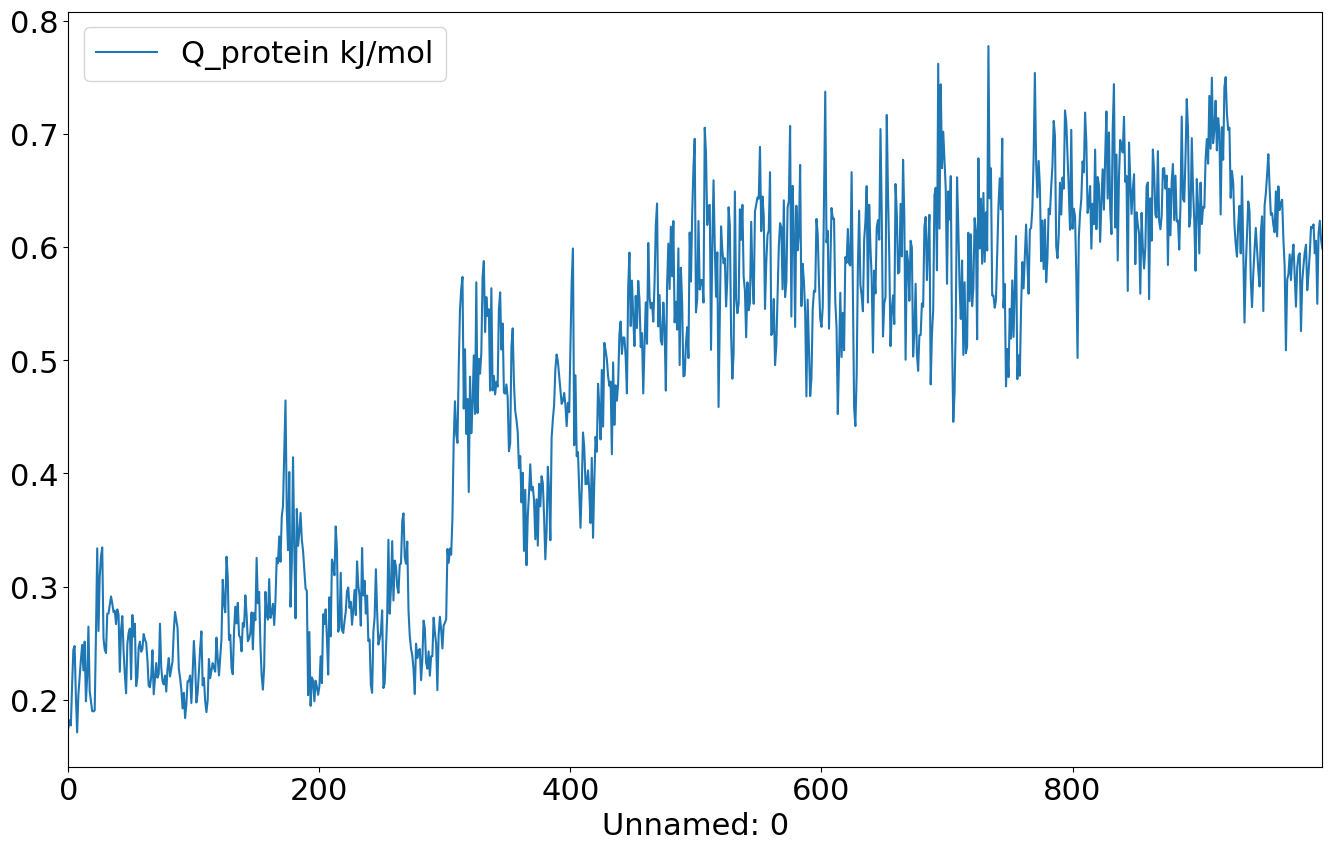

In [19]:
test_energy.plot("Unnamed: 0", "Q_protein kJ/mol")

In [162]:
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/run1_1a1j_0_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  constraint kJ/mol  \
0           0          557.021301            1841.318848         352.134155   
1           1          323.314362            1761.761963         342.547882   
2           2         -258.509155            1579.101929         251.759323   
3           3         -382.805115            1368.413818         207.878860   
4           4         -714.687012            1390.924683         192.127518   
5           5        -1147.475220            1109.608765         167.376663   
6           6        -1438.475586            1019.022095         153.888336   
7           7        -2071.240967             783.810242         136.459839   
8           8        -2322.412354             682.715027         125.009567   
9           9        -2419.239014             676.057495          84.254318   

   Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0    88.465927    352.134155      -156.066864      -144.166763   
1    96.119019    342.547882      -108.764000      -149.282913   
2    79.051964    251.759323      -181.400436      -132.744370   
3    79.655090    207.878860      -156.866974      -143.544342   
4    32.410713    192.127518      -192.648407      -156.898636   
5    55.389984    167.376663      -164.782516      -165.312958   
6    50.101940    153.888336      -188.811951      -203.821060   
7    35.027023    136.459839      -206.705933      -224.580063   
8    33.928421    125.009567      -236.803558      -224.387238   
9    34.409286     84.254318      -222.561676      -223.278336   

   BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0       -29.755480             -2.935120          1.037475   
1       -50.909523             -7.843520          0.000000   
2      -101.804382            -18.078224          2.526787   
3      -102.996727            -18.421175          0.000000   
4       -85.961914            -22.800781          2.241223   
5       -73.844131            -21.679342          1.426584   
6       -97.849152            -20.264725          2.635292   
7      -160.241974            -30.097418          0.277100   
8      -153.765839            -30.431648          0.976243   
9      -161.395538            -27.340906          0.000000   

   Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0               8.829189          1841.318848   1841.318848  1841.318848   
1               9.650272          1761.761963   1761.761963  1761.761963   
2               9.245409          1579.101929   1579.101929  1579.101929   
3               9.605591          1368.413818   1368.413818  1368.413818   
4               9.435081          1390.924683   1390.924683  1390.924683   
5               9.457170          1109.608765   1109.608765  1109.608765   
6               9.238403          1019.022095   1019.022095  1019.022095   
7               9.528406           783.810242    783.810242   783.810242   
8               9.717251           682.715027    682.715027   682.715027   
9               9.136267           676.057495    676.057495   676.057495   

   Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0  1841.318848  -352.030029      -352.030029     -280.810455    -12.588223   
1  1761.761963  -419.482544      -419.482544     -294.709839     -6.013396   
2  1579.101929  -457.150909      -457.150909     -303.228149     -4.630230   
3  1368.413818  -426.156097      -426.156097     -304.473450    -18.713223   
4  1390.924683  -514.470886      -514.470886     -360.048920    -14.362317   
5  1109.608765  -559.737122      -559.737122     -366.822571    -33.216976   
6  1019.022095  -561.272217      -561.272217     -391.615479    -64.144478   
7   783.810242  -668.597290      -668.597290     -412.646027    -79.541481   
8   682.715027  -741.045898      -741.045898     -410.330872    -84.640297   
9   676.057495  -709.122681      -709.122681     -426.327393   -108.251091   

   beta2 kJ/mol  beta3 kJ/m

In [159]:
test_energy.columns

Index(['Unnamed: 0', 'TotalEnergy kJ/mol', 'dna_constraint kJ/mol',
       'constraint kJ/mol', 'Bond kJ/mol', 'Angle kJ/mol', 'Stacking kJ/mol',
       'Dihedral kJ/mol', 'BasePair kJ/mol', 'CrossStacking kJ/mol',
       'Exclusion kJ/mol', 'Electrostatics kJ/mol', 'Connectivity kJ/mol',
       'Chain kJ/mol', 'Chi kJ/mol', 'Excl kJ/mol', 'rama kJ/mol',
       'rama_pro kJ/mol', 'contact kJ/mol', 'beta1 kJ/mol', 'beta2 kJ/mol',
       'beta3 kJ/mol', 'pap1 kJ/mol', 'pap2 kJ/mol', 'fm kJ/mol',
       'ExclusionProteinDNA kJ/mol', 'ElectrostaticsProteinDNA kJ/mol',
       'Q_protein kJ/mol', 'Q_value_sigma5', 'Q_value_sigma3',
       'Q_value_sigma1', 'Q_value_sym_sigma5', 'Q_value_sym_sigma3',
       'Q_value_sym_sigma1'],
      dtype='object')

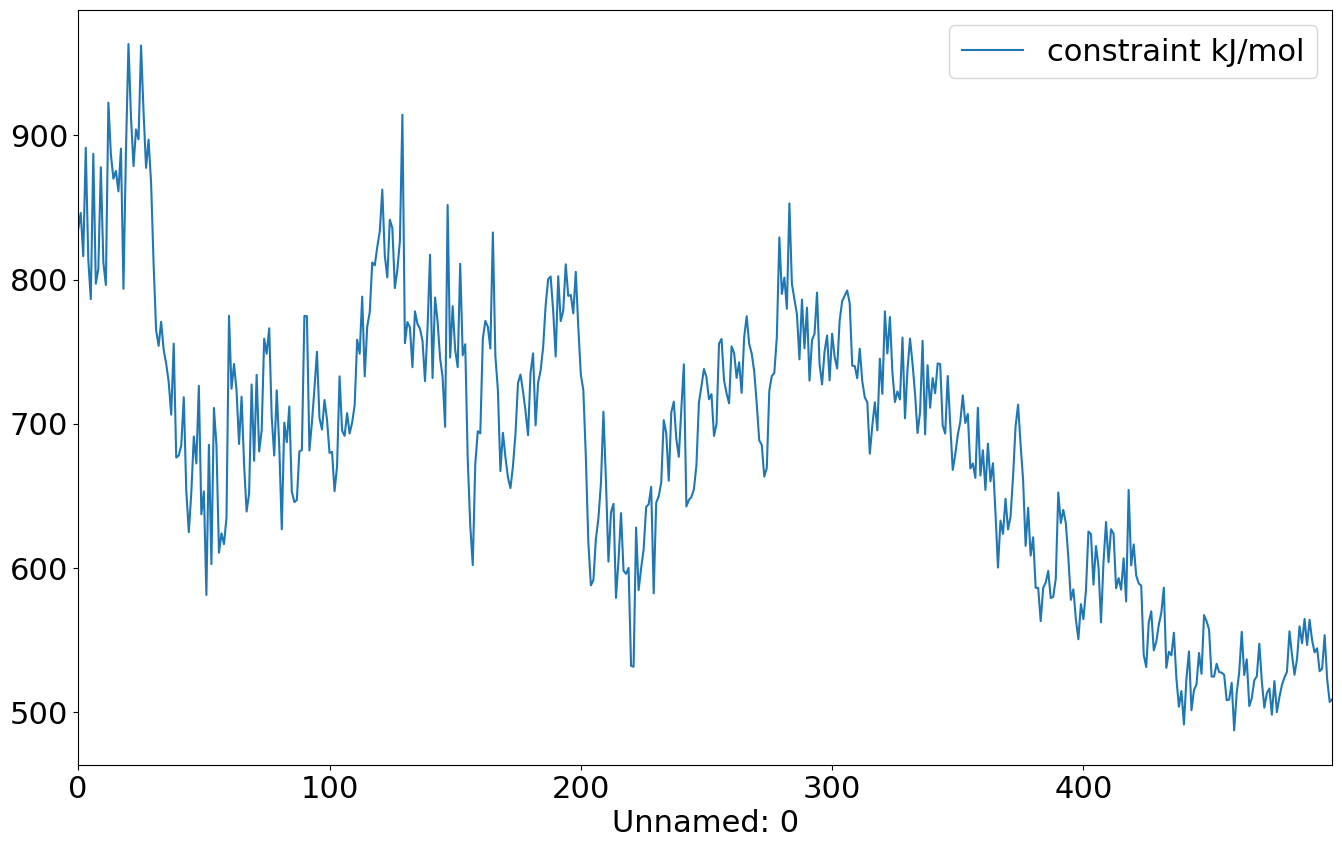

In [160]:
test_energy.plot("Unnamed: 0", "constraint kJ/mol")

In [156]:
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/test_1a1j_2_energies.csv"
test_energy = pd.read_csv(test)
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  constraint kJ/mol  \
0             0        -4155.417969             830.338562          58.261890   
1             1        -4337.937012             744.170776          71.145126   
2             2        -4342.987793             668.419250          71.116913   
3             3        -4091.565430             861.014343          81.271019   
4             4        -4208.320801             752.978638          96.598991   
..          ...                 ...                    ...                ...   
245         245        -4643.930664             502.551788          45.325054   
246         246        -4584.796875             570.234375          66.817818   
247         247        -4553.240234             538.270996          66.985603   
248         248        -4668.943848             505.713196          59.004738   
249         249        -4643.302246             505.431610          49.189445   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0      28.651072     58.261890      -207.470459      -226.970825   
1      26.657326     71.145126      -229.045410      -226.435699   
2      46.362762     71.116913      -219.275528      -219.428894   
3      43.515457     81.271019      -222.026871      -217.853043   
4      34.578030     96.598991      -225.351334      -214.378540   
..           ...           ...              ...              ...   
245    33.529053     45.325054      -226.791580      -240.839523   
246    29.920319     66.817818      -231.181915      -218.930542   
247    27.610985     66.985603      -238.337372      -235.132355   
248    22.448866     59.004738      -237.555267      -237.050919   
249    19.639977     49.189445      -235.328262      -219.110825   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -152.880066            -32.570721          1.908048   
1        -157.297775            -37.632111          0.764863   
2        -158.670624            -33.511768          0.002036   
3        -145.859833            -31.615713          0.039745   
4        -154.820312            -32.452229          0.081206   
..               ...                   ...               ...   
245      -169.658661            -35.626656          0.074671   
246      -163.326019            -35.904003          0.176073   
247      -157.373444            -33.456261          0.134577   
248      -164.297607            -32.102859          0.187392   
249      -153.350281            -33.157066          0.639383   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol  Chi kJ/mol  \
0                 9.596300           830.338562    830.338562  830.338562   
1                 9.708164           744.170776    744.170776  744.170776   
2                 9.400763           668.419250    668.419250  668.419250   
3                 9.443526           861.014343    861.014343  861.014343   
4                 9.746097           752.978638    752.978638  752.978638   
..                     ...                  ...           ...         ...   
245               9.410284           502.551788    502.551788  502.551788   
246               9.497507           570.234375    570.234375  570.234375   
247               9.542325           538.270996    538.270996  538.270996   
248               9.744363           505.713196    505.713196  505.713196   
249               9.645859           505.431610    505.431641  505.431641   

     Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0     830.338562  -772.781006      -772.781006     -225.691803   -110.183212   
1     744.170776  -796.580078      -796.580078     -233.022583   -108.647591   
2     668.419250  -769.860413      -769.860413     -232.378525   -120.329308   
3     861.014343  -791.975891      -791.975891     -232.579102    -87.480194   
4     752.978638  -768.761475      -768.761475     -219.175903   -108.940704   
..           ...          ...            

In [154]:
test = f"/Users/weilu/Research/server/jun_week3_2020/protein_DNA/test_1a1j_0_energies.csv"
test_energy = pd.read_csv(test)

In [155]:
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  constraint kJ/mol  \
0             0           39.823486            2360.641846         299.961304   
1             1         -698.732239            1969.341309         295.087830   
2             2         -801.595154            2222.901123         257.331390   
3             3         -949.325867            2059.958984         291.460144   
4             4        -1025.987305            2059.117920         274.807404   
..          ...                 ...                    ...                ...   
245         245        -4509.291504             553.072266          85.382362   
246         246        -4519.078125             551.566223          82.523125   
247         247        -4583.382812             499.982666          69.911003   
248         248        -4520.576660             518.867920          82.211746   
249         249        -4464.675781             597.465210          88.833214   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0      67.016731    299.961304      -121.195396       -65.336189   
1      98.836876    295.087830      -115.695892       -69.030624   
2      87.430458    257.331390      -167.998871       -92.219078   
3      74.332581    291.460144      -143.539062      -108.213570   
4      85.999092    274.807404      -131.939636      -118.279694   
..           ...           ...              ...              ...   
245    31.081087     85.382362      -223.268021      -235.113663   
246    25.172474     82.523125      -243.365234      -236.295105   
247    44.617153     69.911003      -237.382324      -232.918396   
248    32.160069     82.211746      -240.931641      -229.275192   
249    30.694790     88.833214      -229.268295      -219.706787   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0           1.075122             -1.544315          1.773512   
1         -18.795986             -4.599777          7.335309   
2         -21.649542             -7.202574          4.036797   
3         -22.348705             -8.996019          4.976562   
4         -22.480148             -3.913847          0.936185   
..               ...                   ...               ...   
245      -162.424042            -41.547173          0.195563   
246      -160.547653            -32.312897          0.066495   
247      -163.370346            -32.344398          0.307826   
248      -149.423965            -32.866112          0.047689   
249      -166.731750            -30.443710          0.198675   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0                11.889565          2360.641846   2360.641846  2360.641846   
1                 9.834860          1969.341309   1969.341309  1969.341309   
2                 9.479951          2222.901123   2222.901123  2222.901123   
3                 9.774589          2059.958984   2059.958984  2059.958984   
4                 9.810230          2059.117920   2059.117920  2059.117920   
..                     ...                  ...           ...          ...   
245               9.364694           553.072266    553.072266   553.072266   
246               9.874746           551.566223    551.566223   551.566223   
247               9.464544           499.982666    499.982666   499.982666   
248               9.640162           518.867920    518.867920   518.867920   
249               9.579359           597.465210    597.465210   597.465210   

     Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    2360.641846  -339.464905      -339.464905     -176.742371     -5.182293   
1    1969.341309  -364.512573      -364.512573     -194.051010    -13.226708   
2    2222.901123  -302.696075      -302.696075     -209.000793     -8.465828   
3    2059.958984  -372.708313      -372.708313     -216.721756     -6.296357   
4    2059.117920  -404.156525      -404.156525     -208.737106    -11.296759   
..           ...          ...

In [153]:
test_energy

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  Bond kJ/mol  \
0             0         -349.084930            2173.238770    75.407318   
1             1         -971.565674            2026.654541   124.595978   
2             2         -973.380188            2127.672852    97.400055   
3             3         -858.046997            2258.286133    58.622879   
4             4         -907.980591            2019.662354   103.377312   
..          ...                 ...                    ...          ...   
245         245        -4422.561035             541.814697    16.625736   
246         246        -4376.637207             553.183105    25.222174   
247         247        -4397.236328             505.757568    25.320171   
248         248        -4332.902832             555.005310    16.565491   
249         249        -4400.042969             530.055847    22.343199   

     Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  \
0      189.677826      -117.732140       -58.348492        -0.344947   
1      228.775513      -164.091049      -104.577934       -51.482243   
2      215.599670      -127.804237      -114.314873       -15.291305   
3      242.722565      -108.770157       -76.415924        -7.846669   
4      238.520065      -133.074966      -111.043861        -8.392876   
..            ...              ...              ...              ...   
245     48.289219      -243.639267      -237.803421      -169.516693   
246     53.743736      -222.160065      -235.690536      -152.038742   
247     61.190659      -236.235168      -230.297379      -157.485046   
248     58.772957      -223.437988      -226.699326      -160.959320   
249     64.440956      -229.289734      -237.283600      -152.993225   

     CrossStacking kJ/mol  Exclusion kJ/mol  Electrostatics kJ/mol  \
0               -2.301164          3.031464               9.131438   
1               -6.293706          0.103784              10.327463   
2               -3.968056          2.117152              10.252430   
3               -3.987401          1.177509               9.105085   
4               -0.656323          1.066873               8.139092   
..                    ...               ...                    ...   
245            -36.915016          0.070329               9.403797   
246            -36.197487          0.181921               9.844149   
247            -27.071873          0.281559               9.254151   
248            -33.683346          0.163398               9.380742   
249            -30.244156          0.114701               9.328447   

     Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  \
0            2173.238770   2173.238770  2173.238770  2173.238770  -327.001160   
1            2026.654541   2026.654541  2026.654541  2026.654541  -467.136475   
2            2127.672852   2127.672852  2127.672852  2127.672852  -470.248718   
3            2258.286133   2258.286133  2258.286133  2258.286133  -463.263885   
4            2019.662354   2019.662354  2019.662354  2019.662354  -418.661407   
..                   ...           ...          ...          ...          ...   
245           541.814697    541.814697   541.814697   541.814697  -775.409363   
246           553.183105    553.183105   553.183105   553.183105  -797.220276   
247           505.757568    505.757568   505.757568   505.757568  -765.278687   
248           555.005310    555.005310   555.005310   555.005310  -757.398071   
249           530.055847    530.055847   530.055847   530.055847  -777.313721   

     rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  beta2 kJ/mol  \
0        -327.001160     -185.699936     -5.339263     -5.339263   
1        -467.136475     -188.233154    -23.884880    -23.884880   
2        -470.248718     -222.799225     -8.911196     -8.911196   
3        -463.263885     -187.615433    -17.138174    -17.138174   
4        -418.661407     -191.200455     -9.512941     -9.512941   
..               

In [7]:
native_file = f"{pre}/local_jun08_pdb_1a36_repetition_4_energies.csv"
native_energy = pd.read_csv(native_file)

In [40]:
native_energy

Unnamed: 0  TotalEnergy kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0              0       -16226.179688    75.343147    276.041107   
1              1       -16902.947266    78.837830    202.295883   
2              2       -17401.970703    45.343399    182.227188   
3              3       -17375.707031    64.157196    163.367340   
4              4       -17164.117188    63.687706    146.258926   
...          ...                 ...          ...           ...   
1354        1354       -17476.857422    90.647484    192.593048   
1355        1355       -17466.509766    67.424332    174.690521   
1356        1356       -17659.167969    76.937561    191.284973   
1357        1357       -17700.429688    76.072556    159.028076   
1358        1358       -17512.953125    85.468567    158.939133   

      Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -404.931763      -447.719604      -191.299622            -40.055317   
1         -463.306152      -500.029358      -240.514221            -61.044060   
2         -466.012146      -497.576752      -246.141373            -58.878994   
3         -460.814972      -489.121033      -270.730896            -62.089310   
4         -476.539734      -496.871429      -256.511597            -65.100105   
...               ...              ...              ...                   ...   
1354      -469.639832      -468.173981      -270.791748            -71.202927   
1355      -477.919586      -487.781281      -266.450928            -60.205299   
1356      -473.358185      -480.496826      -254.787201            -66.500099   
1357      -466.892578      -502.093323      -242.100998            -59.811329   
1358      -484.828430      -508.126953      -278.751129            -57.349087   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             1.675032              33.851437          5306.451172   
1             4.596742              31.475451          5053.401367   
2             3.851930              30.994713          4868.971680   
3             0.573608              29.920187          4948.175293   
4             1.010401              29.678307          5107.647949   
...                ...                    ...                  ...   
1354          0.528191              30.002693          5095.862305   
1355          4.617456              31.505203          5152.246582   
1356          0.077047              30.118214          4912.732422   
1357          0.785941              30.083229          4942.963867   
1358          1.047828              30.279930          5236.811035   

      Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0      5306.451172  5306.451172  5306.451172 -5018.418945     -5018.418945   
1      5053.401855  5053.401367  5053.401367 -5036.673828     -5036.673828   
2      4868.971680  4868.971680  4868.971680 -5122.433105     -5122.433105   
3      4948.175293  4948.175293  4948.175293 -5069.142090     -5069.142090   
4      5107.647949  5107.647461  5107.647949 -5062.104980     -5062.104980   
...            ...          ...          ...          ...              ...   
1354   5095.862305  5095.862305  5095.862305 -5181.652344     -5181.652344   
1355   5152.246094  5152.246582  5152.246582 -5129.292969     -5129.292969   
1356   4912.732422  4912.732422  4912.732422 -5098.808594     -5098.808594   
1357   4942.963867  4942.964355  4942.963867 -5079.197266     -5079.197266   
1358   5236.811035  5236.811035  5236.811035 -5098.156250     -5098.156250   

      contact kJ/mol  beta1 kJ/mol  beta2 kJ/mol  beta3 kJ/mol  pap1 kJ/mol  \
0       -3669.246094   -700.023071   -700.023071   -700.023071   -92.312622   
1       -3837.937500   -722.758850   -722.758850   -722.758850   -98.811943   
2       -3992.948730   -731.085449   -731.085449   -731.085449   -98.652359   
3       -3956.500000   -741.189331   -741.189331   -741.189331   -92.324829   
4       -3953.353516   -687.670105   -687.670105   -687

In [5]:
energy_file = f"{pre}/check_unfold_no_protein_dna_long_1a36_3_energies.csv"
energy = pd.read_csv(energy_file)

In [9]:
energy_file = f"{pre}/stronger_constraint_within_DNA_1a36_3_energies.csv"
stronger_constraint = pd.read_csv(energy_file)

In [43]:
energy_file = f"{pre}/compare.csv"
compare = pd.read_csv(energy_file)

In [45]:
energy_file = f"{pre}/with_amhgo_quick_1a36_3_energies.csv"
with_amhgo = pd.read_csv(energy_file)

In [143]:

energy_file = f"{pre}/with_er_regular_inter_1a36_0_energies.csv"
with_er_regular_inter_1a36_0_energies = pd.read_csv(energy_file)

In [144]:
with_er_regular_inter_1a36_0_energies

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0       -14000.619141           16748.166016   
1             1       -15790.304688           17160.291016   
2             2       -16990.832031           16455.716797   
3             3       -17799.298828           16700.445312   
4             4       -18204.070312           16755.984375   
..          ...                 ...                    ...   
745         745       -41710.742188            5543.875000   
746         746       -41833.734375            5414.332520   
747         747       -41827.937500            5558.282715   
748         748       -42305.597656            5049.744141   
749         749       -41868.699219            5204.234863   

     dna_protein_bond kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0                2563.367188  2563.367188    550.935547      -219.115402   
1                1287.477905  1287.477905    577.592041      -193.010590   
2                 909.138672   909.138672    758.350952      -256.893646   
3                 802.155396   802.155396    594.262451      -226.488617   
4                 778.743469   778.743469    664.797607      -255.211975   
..                       ...          ...           ...              ...   
745               211.059555   211.059555    213.080704      -477.956909   
746               214.427658   214.427658    149.601608      -483.973877   
747               211.470200   211.470200    163.798538      -481.616272   
748               249.072479   249.072479    177.006317      -492.562164   
749               238.780731   238.780731    186.144501      -470.977722   

     Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -237.696899       -49.031216            -18.493217          8.499491   
1        -167.409668        -3.183158            -11.888466          2.539808   
2        -236.299500       -29.446934            -10.828147          7.283559   
3        -199.179871       -10.057462            -14.891386          4.588534   
4        -207.315308       -20.596722             -6.786825          1.613914   
..               ...              ...                   ...               ...   
745      -480.563446      -285.286438            -65.932274          3.022510   
746      -492.562836      -285.071625            -56.379883          0.786993   
747      -496.274261      -266.222717            -68.886215          1.135251   
748      -469.891602      -272.876312            -64.300331          3.282044   
749      -491.949493      -266.520874            -70.370270          3.759845   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                27.698605         16748.167969  16748.167969  16748.167969   
1                31.779448         17160.289062  17160.291016  17160.291016   
2                27.197603         16455.714844  16455.716797  16455.714844   
3                37.784122         16700.445312  16700.445312  16700.445312   
4                32.989372         16755.984375  16755.984375  16755.984375   
..                     ...                  ...           ...           ...   
745              31.707573          5543.875000   5543.875000   5543.875000   
746              32.652199          5414.333008   5414.333008   5414.333008   
747              30.620701          5558.282715   5558.282715   5558.282227   
748              31.981205          5049.744141   5049.744141   5049.744141   
749              30.516413          5204.234375   5204.234863   5204.234375   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    16748.167969 -1750.368896     -1750.368896    -1234.339844    -58.612610   
1    17160.289062 -1627.511230     -1627.511230    -1274.558105    -45.683517   
2    16455.716797 -1709.427734     -1709.427734    -1339.484131    -72.881042   
3    16700.445312 -1670.132690     -1670.132690    -1313.989258    -73.567566   
4    16755.984375 -1

In [145]:
with_dna_protein_bond_and_er_regular_inter

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0              0       -25113.011719           15213.275391   
1              1       -27233.019531           15671.946289   
2              2       -29412.171875           14884.777344   
3              3       -30445.765625           15459.026367   
4              4       -31220.523438           15123.919922   
...          ...                 ...                    ...   
2495        2495       -53475.191406            5437.392090   
2496        2496       -53520.351562            5175.629883   
2497        2497       -53638.917969            5122.781250   
2498        2498       -53591.886719            5266.937012   
2499        2499       -53582.320312            5117.964844   

      dna_protein_bond kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0                 1396.384155  1396.384155    568.831421      -254.716675   
1                  830.277039   830.277039    700.534607      -289.423981   
2                  681.438416   681.438416    689.653870      -293.755493   
3                  676.766479   676.766479    542.113647      -296.310425   
4                  829.743713   829.743713    538.306824      -228.928253   
...                       ...          ...           ...              ...   
2495               164.572510   164.572510    165.457443      -477.048065   
2496               154.459518   154.459518    152.555496      -486.757507   
2497               206.524231   206.524231    158.441833      -490.239624   
2498               169.046600   169.046600    204.129654      -461.154663   
2499               175.550415   175.550415    204.601837      -479.894745   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -208.203766       -11.446313            -10.360762   
1         -213.242661       -26.910570             -7.485239   
2         -231.623169       -42.849586            -18.094606   
3         -255.682785       -57.522942             -9.102396   
4         -236.550522       -15.065624             -9.895781   
...               ...              ...                   ...   
2495      -511.165619      -242.537964            -54.973854   
2496      -500.540131      -269.931396            -63.669117   
2497      -488.299042      -293.155457            -67.977005   
2498      -506.339172      -266.694275            -63.712521   
2499      -484.111603      -282.617310            -61.933254   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0            12.430771              28.383865         15213.275391   
1            10.097235              30.497986         15671.945312   
2             1.321061              32.943748         14884.777344   
3             7.696231              29.914497         15459.025391   
4            33.727947              34.547218         15123.919922   
...                ...                    ...                  ...   
2495          1.879056              31.301361          5437.391602   
2496          1.586104              31.530334          5175.629883   
2497          7.043468              30.395050          5122.780762   
2498          3.694311              30.305124          5266.937500   
2499          0.919242              30.016945          5117.964844   

      Chain kJ/mol    Chi kJ/mol   Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0     15213.275391  15213.275391  15213.275391 -2006.858398     -2006.858398   
1     15671.945312  15671.945312  15671.945312 -2103.403809     -2103.403809   
2     14884.777344  14884.777344  14884.777344 -2212.348145     -2212.348145   
3     15459.026367  15459.025391  15459.025391 -2068.183105     -2068.183105   
4     15123.919922  15123.920898  15123.919922 -2320.590088     -2320.590088   
...            ...           ...           ...          ...              ...   
2495   5437.391602   5437.392090   5437.392090 -4616.214844     -4616.214844   
2496   5175.629883   5175.629395   5175.629883 -4522.477539     -4522.4775

#### this one, without AMH-go, and ER. doesn't fold well. even with 1.5e7 steps.

In [141]:

energy_file = f"{pre}/with_dna_protein_bond_and_no_er_regular_inter_long_1a36_0_energies.csv"
with_dna_protein_bond_and_no_er_regular_inter_long = pd.read_csv(energy_file)

In [142]:
with_dna_protein_bond_and_no_er_regular_inter_long

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0              0        10226.996094           16373.279297   
1              1         8802.133789           16178.447266   
2              2         8531.545898           16419.931641   
3              3         9093.503906           16778.125000   
4              4         9221.838867           16491.808594   
...          ...                 ...                    ...   
3745        3745       -15152.976562            5026.809570   
3746        3746       -15058.488281            5007.347168   
3747        3747       -14862.297852            5225.870605   
3748        3748       -15043.521484            5163.494141   
3749        3749       -14907.193359            5182.839844   

      dna_protein_bond kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0                 2371.009277  2371.009277    603.912659      -258.299774   
1                 1227.702881  1227.702881    485.050232      -272.594299   
2                  855.906128   855.906128    491.065704      -279.433807   
3                  669.767334   669.767334    622.687439      -211.305252   
4                  712.419678   712.419678    803.970154      -259.659790   
...                       ...          ...           ...              ...   
3745               105.480354   105.480354    177.659927      -481.165771   
3746               137.184692   137.184692    151.237885      -464.431641   
3747               139.996582   139.996582    168.836304      -508.743652   
3748               106.586151   106.586151    199.503784      -504.391785   
3749               119.547516   119.547516    209.879044      -483.834839   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -247.249954       -53.013573            -17.335554   
1         -209.265594       -14.792652             -9.640638   
2         -212.408554       -22.828575             -2.128881   
3         -179.581497       -15.840036             -8.842993   
4         -158.128494        -0.842916             -8.221447   
...               ...              ...                   ...   
3745      -508.989380      -269.131775            -62.344807   
3746      -501.786377      -301.797180            -71.039284   
3747      -517.134827      -300.156525            -70.109322   
3748      -513.653870      -281.031250            -72.862152   
3749      -500.966553      -290.469543            -65.607857   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             8.711543              28.566280         16373.279297   
1            11.250684              28.565052         16178.447266   
2             2.845388              30.721703         16419.933594   
3             4.059708              33.195301         16778.125000   
4             8.970200              32.478909         16491.808594   
...                ...                    ...                  ...   
3745          2.830058              31.588661          5026.809570   
3746          0.921664              29.679722          5007.346680   
3747          3.077751              30.356539          5225.870117   
3748          0.264688              30.463551          5163.494141   
3749          1.369849              30.317133          5182.839844   

      Chain kJ/mol    Chi kJ/mol   Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0     16373.279297  16373.278320  16373.278320 -2039.092529     -2039.092529   
1     16178.446289  16178.447266  16178.448242 -1891.509399     -1891.509399   
2     16419.933594  16419.933594  16419.933594 -2150.773926     -2150.773926   
3     16778.125000  16778.126953  16778.125000 -1986.462158     -1986.462158   
4     16491.808594  16491.808594  16491.808594 -2138.400879     -2138.400879   
...            ...           ...           ...          ...              ...   
3745   5026.809082   5026.809570   5026.809570 -5104.049805     -5104.049805   
3746   5007.346680   5007.346680   5007.346680 -5055.144531     -5055.1445

In [129]:
native_new

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0             0       -41761.898438          0.910350  -24148.511719   
1             1       -41800.851562          0.925077  -24174.560547   
2             2       -41745.632812          0.851793  -24189.828125   
3             3       -41892.742188          0.886018  -24129.302734   
4             4       -41876.664062          0.916250  -24161.134766   
..          ...                 ...               ...            ...   
245         245       -44218.445312          0.910282  -24328.419922   
246         246       -44081.304688          0.869112  -24308.099609   
247         247       -43920.828125          0.884810  -24328.154297   
248         248       -44173.488281          0.905386  -24323.910156   
249         249       -44217.929688          0.881131  -24323.048828   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0      72.628693    174.160477      -492.280762      -496.281281   
1      72.544197    165.041199      -480.148041      -500.106628   
2      91.083344    172.127487      -461.366455      -494.880646   
3      51.578461    184.347809      -506.004578      -479.178986   
4      88.812004    172.881195      -492.063080      -504.710785   
..           ...           ...              ...              ...   
245    53.136841    105.146851      -508.894928      -512.151855   
246    58.100685    124.604019      -516.636841      -512.087708   
247    56.388245    144.464966      -480.523895      -513.313965   
248    47.034550    116.440445      -496.897888      -512.915588   
249    57.388577     98.314499      -520.283386      -528.126709   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -299.294342            -65.298683          1.116977   
1        -274.647064            -63.609055          0.172277   
2        -291.325989            -64.341721          0.568332   
3        -276.171234            -59.279732          1.358014   
4        -276.787720            -68.570572          2.135250   
..               ...                   ...               ...   
245      -310.310913            -76.330750          1.095423   
246      -298.018494            -66.826683          0.774467   
247      -315.142426            -69.884544          0.503394   
248      -299.912720            -70.170296          0.917068   
249      -308.141663            -77.708755          0.809490   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0                32.101761          4982.414062   4982.413574  4982.414062   
1                30.470150          4873.564453   4873.563965  4873.564453   
2                31.616669          5072.878906   5072.878906  5072.878906   
3                31.211781          4813.846680   4813.846680  4813.846680   
4                31.823505          4870.122070   4870.122070  4870.122070   
..                     ...                  ...           ...          ...   
245              32.260189          3308.041260   3308.041016  3308.041016   
246              31.588593          3324.935547   3324.935547  3324.935303   
247              31.224329          3461.500488   3461.500732  3461.500488   
248              32.955006          3295.433594   3295.433350  3295.433350   
249              32.398632          3235.748535   3235.749023  3235.748779   

     Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    4982.413574 -5116.578125     -5116.578125    -3372.669434   -788.578857   
1    4873.564453 -5086.610840     -5086.610840    -3325.110840   -782.810059   
2    5072.878906 -5138.804688     -5138.804688    -3395.028320   -788.807373   
3    4813.846680 -5095.519531     -5095.519531    -3352.770020   -804.503418   
4    4870.121582 -5147.251953     -5147.251953    -3358.418945   -787.141235   
..           ...          ...              ...             ...           ...   
245  3308.041260 -5325.213867     -5325.213867    -3454.2

In [139]:

energy_file = f"{pre}/with_dna_protein_bond_and_no_er_regular_inter_short_1a36_0_energies.csv"
with_dna_protein_bond_and_no_er_regular_inter_short = pd.read_csv(energy_file)

In [140]:
with_dna_protein_bond_and_no_er_regular_inter_short

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0         9127.415039           14525.158203   
1             1         8957.602539           16086.345703   
2             2         6365.622070           14607.689453   
3             3         6973.531250           14913.457031   
4             4         7065.994141           15212.683594   
..          ...                 ...                    ...   
995         995       -14696.871094            5114.482422   
996         996       -14825.744141            5007.963379   
997         997       -14522.886719            5245.998535   
998         998       -14749.774414            5146.747070   
999         999       -14519.336914            5120.292969   

     dna_protein_bond kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0                2697.747070  2697.747070    605.406738      -250.368103   
1                1492.339355  1492.339355    622.997681      -297.531128   
2                 914.850647   914.850647    467.844910      -291.474945   
3                 808.598022   808.598022    655.385010      -214.178085   
4                 744.216248   744.216248    570.235657      -225.186844   
..                       ...          ...           ...              ...   
995               158.847580   158.847580    182.141876      -494.844879   
996               164.670258   164.670258    157.856369      -484.206482   
997               160.487213   160.487213    142.549515      -493.587158   
998               185.451508   185.451508    178.919022      -485.103516   
999               188.783798   188.783798    165.138657      -484.363068   

     Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -233.610504       -41.521984             -9.966216          5.151029   
1        -200.324631       -22.809326            -18.524002          3.602570   
2        -231.439346       -16.779318             -8.683804         26.855642   
3        -187.189514       -23.428823            -15.153639          3.709998   
4        -238.246704       -13.037592            -12.802148         23.964462   
..               ...              ...                   ...               ...   
995      -477.735504      -291.245911            -64.160713          1.589803   
996      -509.903412      -280.313751            -70.066917          0.875295   
997      -497.342804      -277.600494            -69.676651          0.582503   
998      -503.149506      -282.831055            -73.892326          0.497496   
999      -505.516846      -289.386902            -64.020615          0.700149   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                28.869446         14525.158203  14525.159180  14525.160156   
1                27.225203         16086.345703  16086.346680  16086.345703   
2                36.504627         14607.689453  14607.689453  14607.689453   
3                36.819572         14913.457031  14913.457031  14913.457031   
4                30.252686         15212.685547  15212.683594  15212.683594   
..                     ...                  ...           ...           ...   
995              32.420090          5114.482422   5114.481934   5114.481934   
996              30.529055          5007.962891   5007.963379   5007.963379   
997              31.153845          5245.999023   5245.999023   5245.999023   
998              32.872646          5146.747070   5146.747070   5146.747070   
999              30.205866          5120.292969   5120.292969   5120.292969   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    14525.160156 -2175.564453     -2175.564453    -1197.665771    -31.779808   
1    16086.345703 -1979.145264     -1979.145264    -1201.169189    -26.634792   
2    14607.689453 -2299.407471     -2299.407471    -1234.374634    -19.632896   
3    14913.457031 -2082.257812     -2082.257812    -1264.408447    -37.454704   
4    15212.684570 -2

In [130]:



energy_file = f"{pre}/with_dna_protein_bond_and_er_regular_inter_short_1a36_1_energies.csv"
with_dna_protein_bond_and_er_regular_inter_short_1 = pd.read_csv(energy_file)

In [131]:
with_dna_protein_bond_and_er_regular_inter_short_1

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0       -24055.808594           15301.533203   
1             1       -27723.984375           14802.665039   
2             2       -29697.339844           14742.403320   
3             3       -29613.158203           15617.820312   
4             4       -30916.828125           15003.067383   
..          ...                 ...                    ...   
495         495       -49905.824219            6775.476562   
496         496       -49538.171875            7015.426758   
497         497       -50388.179688            6449.608398   
498         498       -50168.972656            6541.162109   
499         499       -50197.085938            6746.481445   

     dna_protein_bond kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0                2797.630371  2797.630371    559.293518      -259.372284   
1                1365.441650  1365.441650    670.968750      -281.478271   
2                 966.706604   966.706604    517.745911      -332.201447   
3                 754.815247   754.815247    535.740906      -264.623108   
4                 643.818359   643.818359    484.299286      -247.284470   
..                       ...          ...           ...              ...   
495               162.165680   162.165680    348.025909      -460.278534   
496               192.819733   192.819733    304.291199      -482.066132   
497               196.859283   196.859283    205.569397      -467.076080   
498               232.708344   232.708344    224.630798      -466.797333   
499               191.180450   191.180450    203.548492      -477.579285   

     Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -264.448639       -29.994204            -17.911156          7.567412   
1        -238.248215       -22.932543            -20.631466          3.381753   
2        -289.065338       -46.351055            -14.245848          1.437738   
3        -278.848755        -5.299677             -6.972278          3.022138   
4        -212.410370        -6.111562            -11.521433          2.622487   
..               ...              ...                   ...               ...   
495      -480.046082      -185.099731            -44.686455          1.606389   
496      -467.533295      -205.297180            -55.169079          3.280465   
497      -469.940521      -236.848404            -58.437943          0.635657   
498      -484.339294      -268.989258            -61.733963          4.929641   
499      -480.196503      -253.372345            -53.599365          5.167786   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                29.695469         15301.533203  15301.534180  15301.533203   
1                30.097397         14802.664062  14802.666016  14802.665039   
2                30.617626         14742.403320  14742.403320  14742.404297   
3                30.112740         15617.820312  15617.820312  15617.820312   
4                35.091660         15003.067383  15003.066406  15003.068359   
..                     ...                  ...           ...           ...   
495              29.996651          6775.476562   6775.476562   6775.476562   
496              30.493914          7015.426758   7015.427246   7015.427246   
497              30.519222          6449.608398   6449.607910   6449.608398   
498              29.515995          6541.162598   6541.162109   6541.162109   
499              32.869297          6746.481445   6746.481445   6746.480957   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    15301.534180 -2242.792969     -2242.792969    -1283.301758    -88.794456   
1    14802.665039 -2043.829590     -2043.829590    -1360.717285   -114.404617   
2    14742.403320 -2057.126953     -2057.126953    -1413.422241    -96.418633   
3    15617.820312 -2198.784668     -2198.784668    -1401.806641   -114.289642   
4    15003.067383 -2

In [132]:



energy_file = f"{pre}/local_jun08_pdb_1a36_repetition_0_energies.csv"
local_jun08_pdb_1a36_repetition_0_energies = pd.read_csv(energy_file)

In [133]:
local_jun08_pdb_1a36_repetition_0_energies

Unnamed: 0  TotalEnergy kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0              0       -16320.150391    74.475220    210.609955   
1              1       -16727.988281   105.296135    164.350174   
2              2       -17066.710938    72.720604    147.385223   
3              3       -17468.425781    80.091873    197.759094   
4              4       -16705.625000    76.169281    160.586716   
...          ...                 ...          ...           ...   
1347        1347       -17272.636719    58.789490    137.027802   
1348        1348       -17272.820312    73.538147    160.681412   
1349        1349       -17234.392578    73.686440    145.862000   
1350        1350       -17608.339844    55.219597    203.999298   
1351        1351       -17294.462891    64.212326    170.454681   

      Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -392.763519      -469.106354      -157.546158            -38.410599   
1         -454.326996      -458.210724      -205.394699            -52.416176   
2         -452.154327      -482.814850      -250.886322            -62.619217   
3         -464.373169      -491.921661      -259.558838            -57.891171   
4         -470.116486      -492.720490      -277.024078            -59.199928   
...               ...              ...              ...                   ...   
1347      -466.996399      -491.325348      -286.931213            -62.402119   
1348      -468.127136      -480.733856      -280.583740            -62.032452   
1349      -476.791382      -507.396545      -257.636108            -61.765190   
1350      -487.359497      -472.829437      -269.801270            -64.448120   
1351      -482.677307      -490.268250      -265.353516            -64.491074   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             4.216712              33.212463          5355.384277   
1             1.369517              31.705673          5250.726562   
2             0.485088              30.012085          5135.125977   
3             2.858864              29.756275          4897.955566   
4             1.816934              29.753113          5378.410156   
...                ...                    ...                  ...   
1347          2.976237              31.393959          5405.324219   
1348          3.921861              32.144428          5369.016113   
1349          1.093132              31.936871          5399.900391   
1350          0.890099              33.351913          5085.490723   
1351          1.272023              31.911182          5245.522461   

      Chain kJ/mol   Chi kJ/mol  Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0      5355.384277  5355.384277  5355.384766 -4940.760742     -4940.760742   
1      5250.726562  5250.726562  5250.726562 -5014.828125     -5014.828125   
2      5135.125977  5135.125977  5135.125977 -4991.761230     -4991.761230   
3      4897.955566  4897.955566  4897.956055 -5151.034180     -5151.034180   
4      5378.410156  5378.409668  5378.410156 -4941.544922     -4941.544922   
...            ...          ...          ...          ...              ...   
1347   5405.323730  5405.323730  5405.323730 -4995.520020     -4995.520020   
1348   5369.015625  5369.016113  5369.016113 -5030.248535     -5030.248535   
1349   5399.900879  5399.900879  5399.900879 -5047.286133     -5047.286133   
1350   5085.490723  5085.490723  5085.490723 -4999.078613     -4999.078613   
1351   5245.522949  5245.522949  5245.522949 -5015.397949     -5015.397949   

      contact kJ/mol  beta1 kJ/mol  beta2 kJ/mol  beta3 kJ/mol  pap1 kJ/mol  \
0       -3838.023682   -720.704956   -720.704956   -720.704956  -103.133423   
1       -3910.713867   -725.014282   -725.014282   -725.014282   -87.351898   
2       -3883.658203   -745.737976   -745.737976   -745.737976   -96.754745   
3       -3997.531006   -737.855225   -737.855225   -737.855225   -85.441666   
4       -3958.017090   -688.917114   -688.917114   -688

In [134]:
energy_file = f"{pre}/new_evalute.csv"
new_evalute = pd.read_csv(energy_file)

In [136]:
new_evalute.columns

Index(['Unnamed: 0', 'TotalEnergy kJ/mol', 'Q_protein kJ/mol', 'AMH_Go kJ/mol',
       'Bond kJ/mol', 'Angle kJ/mol', 'Stacking kJ/mol', 'Dihedral kJ/mol',
       'BasePair kJ/mol', 'CrossStacking kJ/mol', 'Exclusion kJ/mol',
       'Electrostatics kJ/mol', 'Connectivity kJ/mol', 'Chain kJ/mol',
       'Chi kJ/mol', 'Excl kJ/mol', 'rama kJ/mol', 'rama_pro kJ/mol',
       'contact kJ/mol', 'beta1 kJ/mol', 'beta2 kJ/mol', 'beta3 kJ/mol',
       'pap1 kJ/mol', 'pap2 kJ/mol', 'fm kJ/mol', 'ExclusionProteinDNA kJ/mol',
       'ElectrostaticsProteinDNA kJ/mol', 'num_contact kJ/mol',
       'Q_value_sigma5', 'Q_value_sigma3', 'Q_value_sym_sigma5',
       'Q_value_sym_sigma3', 'Q_value_sym_sigma1'],
      dtype='object')

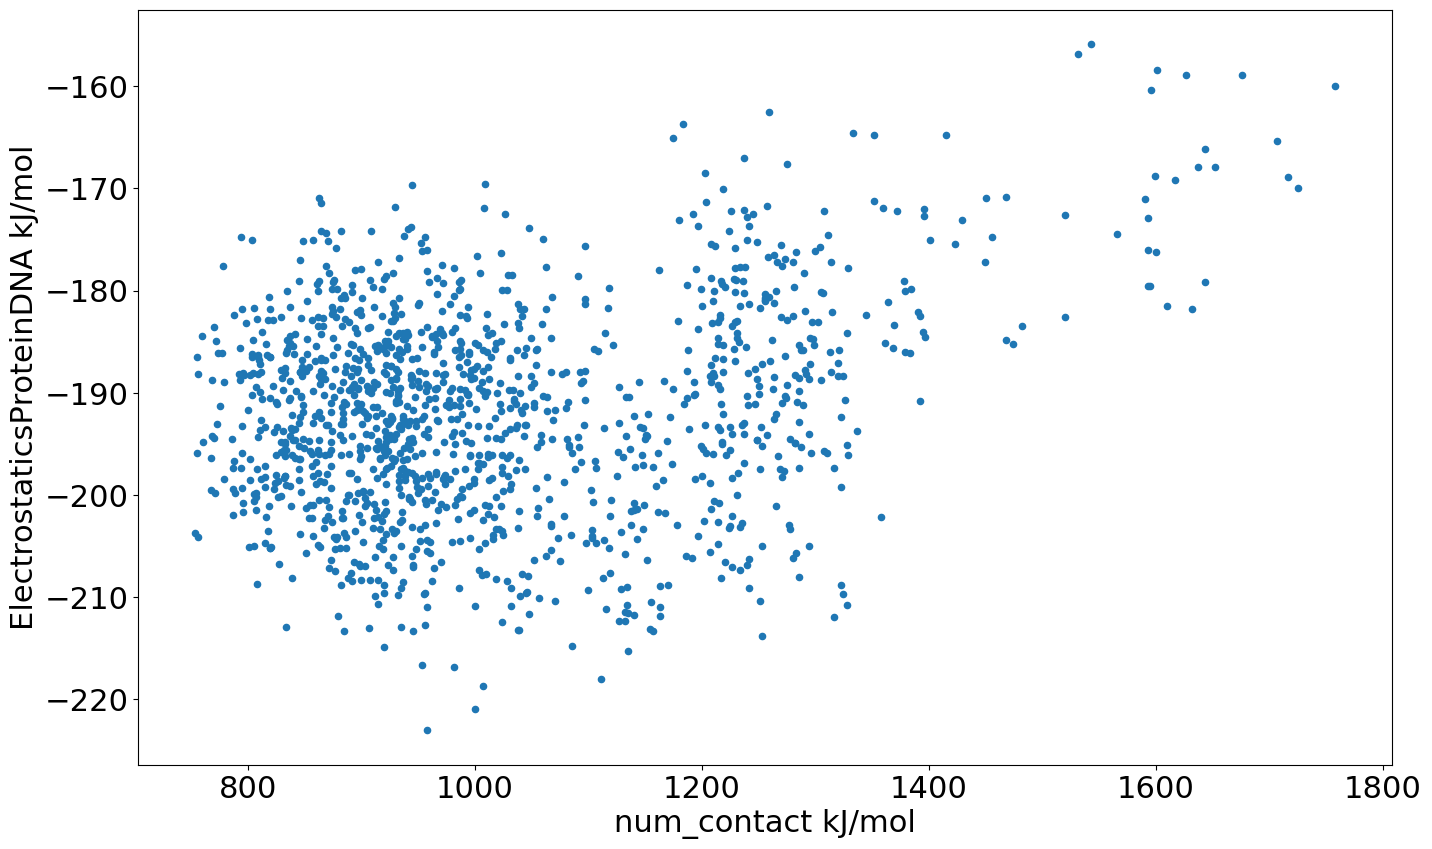

In [138]:
new_evalute.plot.scatter("num_contact kJ/mol", "ElectrostaticsProteinDNA kJ/mol")

In [135]:
new_evalute

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0              0       -35742.613281          0.817115  -21180.789062   
1              1       -36282.210938          0.799650  -21279.539062   
2              2       -36646.601562          0.799917  -21287.203125   
3              3       -37012.773438          0.792599  -21260.644531   
4              4       -35947.656250          0.783824  -20918.382812   
...          ...                 ...               ...            ...   
1347        1347       -35565.031250          0.376207  -19291.630859   
1348        1348       -35487.343750          0.391762  -19194.771484   
1349        1349       -35572.609375          0.398252  -19324.468750   
1350        1350       -35979.250000          0.381592  -19376.152344   
1351        1351       -35345.847656          0.360881  -19048.601562   

      Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0       74.475235    210.609955      -392.763519      -469.106415   
1      105.296127    164.350159      -454.326996      -458.210754   
2       72.720612    147.385193      -452.154358      -482.814880   
3       80.091888    197.759125      -464.373169      -491.921631   
4       76.169296    160.586700      -470.116486      -492.720520   
...           ...           ...              ...              ...   
1347    58.789482    137.027802      -466.996429      -491.325348   
1348    73.538170    160.681442      -468.127167      -480.733887   
1349    73.686447    145.862000      -476.791351      -507.396545   
1350    55.219601    203.999329      -487.359528      -472.829407   
1351    64.212341    170.454636      -482.677307      -490.268250   

      BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -157.546173            -38.410610          4.216719   
1         -205.394714            -52.416176          1.369517   
2         -250.886307            -62.619205          0.485089   
3         -259.558838            -57.891163          2.858867   
4         -277.024048            -59.199924          1.816933   
...               ...                   ...               ...   
1347      -286.931183            -62.402122          2.976238   
1348      -280.583740            -62.032436          3.921859   
1349      -257.636139            -61.765186          1.093132   
1350      -269.801270            -64.448105          0.890099   
1351      -265.353516            -64.491066          1.272023   

      Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0                 33.212463          5355.384766   5355.385254  5355.385254   
1                 31.705673          5250.727539   5250.727539  5250.727539   
2                 30.012089          5135.126953   5135.126953  5135.126953   
3                 29.756277          4897.955566   4897.955566  4897.956055   
4                 29.753113          5378.410156   5378.410156  5378.410156   
...                     ...                  ...           ...          ...   
1347              31.393963          5405.324707   5405.324219  5405.324707   
1348              32.144428          5369.016602   5369.016602  5369.016602   
1349              31.936869          5399.901367   5399.900879  5399.900879   
1350              33.351913          5085.491211   5085.491211  5085.491211   
1351              31.911182          5245.523438   5245.523438  5245.523438   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0     5355.385254 -4940.760742     -4940.760742    -3838.023438   -720.704956   
1     5250.727539 -5014.829102     -5014.829102    -3910.713623   -725.014282   
2     5135.126953 -4991.761719     -4991.761719    -3883.658203   -745.737915   
3     4897.955566 -5151.034180     -5151.034180    -3997.531006   -737.855347   
4     5378.410156 -4941.545410     -4941.545410    -3958.017090   -688.917114   
...           ...          ...              ...             ...           ...   
134

In [127]:


energy_file = f"{pre}/with_dna_protein_bond_and_er_regular_inter_short_1a36_0_energies.csv"
with_dna_protein_bond_and_er_regular_inter_short = pd.read_csv(energy_file)

In [128]:
with_dna_protein_bond_and_er_regular_inter_short

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0       -24693.507812           15021.001953   
1             1       -26831.142578           15772.398438   
2             2       -29290.984375           14878.052734   
3             3       -29915.574219           15087.328125   
4             4       -29745.451172           15486.254883   
..          ...                 ...                    ...   
245         245       -44151.082031           10038.781250   
246         246       -44481.257812            9818.949219   
247         247       -44308.308594           10134.249023   
248         248       -43744.273438           10229.148438   
249         249       -44351.437500            9891.104492   

     dna_protein_bond kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0                1426.226196  1426.226196    653.965576      -269.549194   
1                 985.953003   985.953003    580.098877      -229.292511   
2                 974.952515   974.952515    571.402344      -275.302124   
3                 748.272461   748.272461    617.961914      -264.035339   
4                 839.339111   839.339111    577.150757      -254.674545   
..                       ...          ...           ...              ...   
245               429.294861   429.294861    331.506958      -364.676025   
246               369.002014   369.002014    281.116486      -356.319336   
247               361.416718   361.416718    316.134186      -380.495697   
248               376.918335   376.918335    379.432007      -386.202637   
249               415.926117   415.926117    354.594360      -367.543701   

     Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -177.473129       -23.259935            -12.476166          3.079231   
1        -187.259567       -21.188015             -8.945752         11.731072   
2        -206.076157        13.662031            -15.313881          3.975441   
3        -162.975586       -14.057974            -10.640308          5.654045   
4        -215.078430       -16.816208            -12.174308         17.847595   
..               ...              ...                   ...               ...   
245      -350.539764      -102.115341            -21.681091          9.721833   
246      -321.343903       -96.108353            -28.963867          2.142846   
247      -352.242035       -95.688438            -31.113920         14.038322   
248      -277.075989      -150.307205            -31.207958         10.502914   
249      -383.383240      -114.245262            -36.028046         17.048773   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                33.425529         15021.001953  15021.000977  15021.001953   
1                36.439121         15772.397461  15772.397461  15772.398438   
2                39.543850         14878.052734  14878.052734  14878.052734   
3                37.940441         15087.328125  15087.327148  15087.328125   
4                34.704056         15486.255859  15486.254883  15486.254883   
..                     ...                  ...           ...           ...   
245              34.137527         10038.781250  10038.782227  10038.781250   
246              31.738731          9818.949219   9818.949219   9818.949219   
247              32.697540         10134.248047  10134.249023  10134.249023   
248              33.137932         10229.148438  10229.148438  10229.148438   
249              31.219267          9891.103516   9891.104492   9891.103516   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    15021.001953 -2048.901123     -2048.901123    -1311.678711    -77.829529   
1    15772.397461 -2082.229004     -2082.229004    -1316.234375    -98.935181   
2    14878.051758 -2223.881348     -2223.881348    -1389.048584    -99.523308   
3    15087.327148 -2189.303223     -2189.303223    -1468.953857   -133.416000   
4    15486.254883 -2

In [123]:


energy_file = f"{pre}/with_dna_protein_bond_and_er_regular_inter_1a36_0_energies.csv"
with_dna_protein_bond_and_er_regular_inter = pd.read_csv(energy_file)

In [124]:
with_dna_protein_bond_and_er_regular_inter

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0              0       -25113.011719           15213.275391   
1              1       -27233.019531           15671.946289   
2              2       -29412.171875           14884.777344   
3              3       -30445.765625           15459.026367   
4              4       -31220.523438           15123.919922   
...          ...                 ...                    ...   
2495        2495       -53475.191406            5437.392090   
2496        2496       -53520.351562            5175.629883   
2497        2497       -53638.917969            5122.781250   
2498        2498       -53591.886719            5266.937012   
2499        2499       -53582.320312            5117.964844   

      dna_protein_bond kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0                 1396.384155  1396.384155    568.831421      -254.716675   
1                  830.277039   830.277039    700.534607      -289.423981   
2                  681.438416   681.438416    689.653870      -293.755493   
3                  676.766479   676.766479    542.113647      -296.310425   
4                  829.743713   829.743713    538.306824      -228.928253   
...                       ...          ...           ...              ...   
2495               164.572510   164.572510    165.457443      -477.048065   
2496               154.459518   154.459518    152.555496      -486.757507   
2497               206.524231   206.524231    158.441833      -490.239624   
2498               169.046600   169.046600    204.129654      -461.154663   
2499               175.550415   175.550415    204.601837      -479.894745   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -208.203766       -11.446313            -10.360762   
1         -213.242661       -26.910570             -7.485239   
2         -231.623169       -42.849586            -18.094606   
3         -255.682785       -57.522942             -9.102396   
4         -236.550522       -15.065624             -9.895781   
...               ...              ...                   ...   
2495      -511.165619      -242.537964            -54.973854   
2496      -500.540131      -269.931396            -63.669117   
2497      -488.299042      -293.155457            -67.977005   
2498      -506.339172      -266.694275            -63.712521   
2499      -484.111603      -282.617310            -61.933254   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0            12.430771              28.383865         15213.275391   
1            10.097235              30.497986         15671.945312   
2             1.321061              32.943748         14884.777344   
3             7.696231              29.914497         15459.025391   
4            33.727947              34.547218         15123.919922   
...                ...                    ...                  ...   
2495          1.879056              31.301361          5437.391602   
2496          1.586104              31.530334          5175.629883   
2497          7.043468              30.395050          5122.780762   
2498          3.694311              30.305124          5266.937500   
2499          0.919242              30.016945          5117.964844   

      Chain kJ/mol    Chi kJ/mol   Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0     15213.275391  15213.275391  15213.275391 -2006.858398     -2006.858398   
1     15671.945312  15671.945312  15671.945312 -2103.403809     -2103.403809   
2     14884.777344  14884.777344  14884.777344 -2212.348145     -2212.348145   
3     15459.026367  15459.025391  15459.025391 -2068.183105     -2068.183105   
4     15123.919922  15123.920898  15123.919922 -2320.590088     -2320.590088   
...            ...           ...           ...          ...              ...   
2495   5437.391602   5437.392090   5437.392090 -4616.214844     -4616.214844   
2496   5175.629883   5175.629395   5175.629883 -4522.477539     -4522.4775

In [125]:
with_dna_protein_bond_and_er_regular_inter.columns

Index(['Unnamed: 0', 'TotalEnergy kJ/mol', 'dna_constraint kJ/mol',
       'dna_protein_bond kJ/mol', 'Bond kJ/mol', 'Angle kJ/mol',
       'Stacking kJ/mol', 'Dihedral kJ/mol', 'BasePair kJ/mol',
       'CrossStacking kJ/mol', 'Exclusion kJ/mol', 'Electrostatics kJ/mol',
       'Connectivity kJ/mol', 'Chain kJ/mol', 'Chi kJ/mol', 'Excl kJ/mol',
       'rama kJ/mol', 'rama_pro kJ/mol', 'contact kJ/mol', 'beta1 kJ/mol',
       'beta2 kJ/mol', 'beta3 kJ/mol', 'pap1 kJ/mol', 'pap2 kJ/mol',
       'fm kJ/mol', 'er kJ/mol', 'ExclusionProteinDNA kJ/mol',
       'ElectrostaticsProteinDNA kJ/mol', 'Q_protein kJ/mol', 'Q_value_sigma5',
       'Q_value_sigma3', 'Q_value_sigma1', 'Q_value_sym_sigma5',
       'Q_value_sym_sigma3', 'Q_value_sym_sigma1'],
      dtype='object')

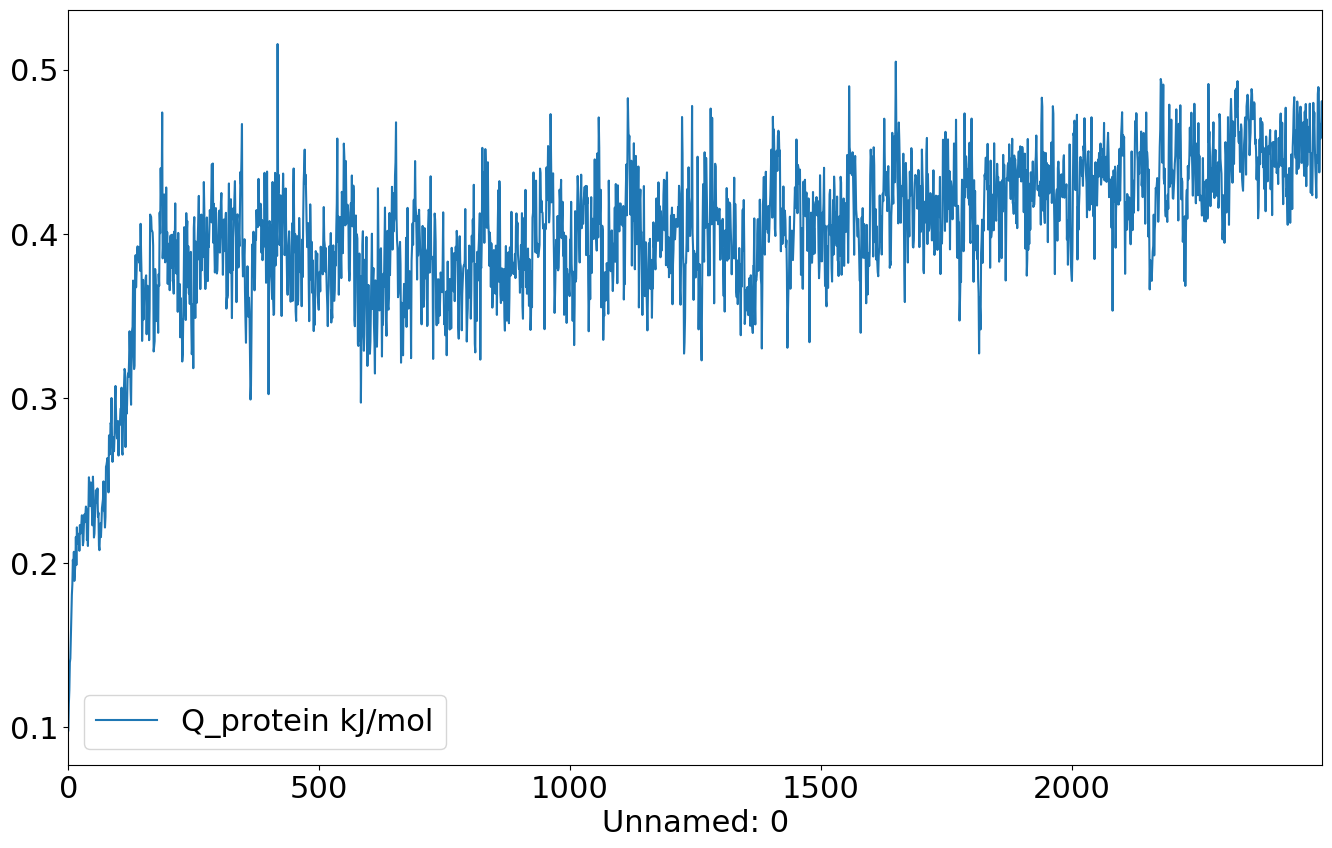

In [126]:
with_dna_protein_bond_and_er_regular_inter.plot("Unnamed: 0", "Q_protein kJ/mol")

In [119]:


energy_file = f"{pre}/with_dna_protein_bond_and_er_1a36_1_energies.csv"
with_dna_protein_bond_and_er_1a36_1 = pd.read_csv(energy_file)

In [120]:
with_dna_protein_bond_and_er_1a36_1

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0       -25206.402344           14888.933594   
1             1       -27761.199219           15331.582031   
2             2       -28298.675781           15438.144531   
3             3       -29871.166016           15298.605469   
4             4       -30875.324219           15038.380859   
..          ...                 ...                    ...   
995         995       -53198.312500            5141.760254   
996         996       -53369.546875            5013.210938   
997         997       -53290.480469            5028.659668   
998         998       -53161.734375            5122.421875   
999         999       -53434.363281            4853.821289   

     dna_protein_bond kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0                1622.723999  1622.723999    443.290894      -259.304504   
1                1174.520386  1174.520386    593.834534      -245.702209   
2                 781.317261   781.317261    540.262451      -234.477036   
3                 700.552734   700.552734    575.032043      -254.174164   
4                 808.278076   808.278076    587.150940      -270.358521   
..                       ...          ...           ...              ...   
995               183.002487   183.002487    157.588364      -490.311707   
996               165.501556   165.501556    151.824554      -486.544006   
997               172.207855   172.207855    157.845108      -489.188110   
998               195.892181   195.892181    180.739471      -488.787628   
999               219.476242   219.476242    145.100464      -461.787689   

     Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -249.766312       -12.799174            -10.329629          2.744922   
1        -210.734802       -28.006517            -10.816239         12.800676   
2        -179.699356        -1.169111             -8.965717         27.860428   
3        -194.817719        -5.042788            -16.217186         20.364546   
4        -232.139450        -9.437372            -16.307322          5.817956   
..               ...              ...                   ...               ...   
995      -503.223999      -276.239899            -63.831264          2.226560   
996      -509.940674      -245.161346            -64.738823          1.771675   
997      -500.046631      -271.910889            -61.530422          1.522354   
998      -507.089752      -274.461761            -67.300316          0.631500   
999      -498.320587      -273.035126            -63.263905          0.471262   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                30.028885         14888.933594  14888.933594  14888.933594   
1                32.368805         15331.582031  15331.582031  15331.582031   
2                32.922264         15438.144531  15438.144531  15438.144531   
3                36.145622         15298.606445  15298.605469  15298.606445   
4                35.441593         15038.380859  15038.380859  15038.380859   
..                     ...                  ...           ...           ...   
995              29.742519          5141.760254   5141.760254   5141.759766   
996              29.964407          5013.210938   5013.210938   5013.210938   
997              29.801796          5028.659668   5028.659668   5028.660156   
998              29.636150          5122.421875   5122.421387   5122.421875   
999              29.242758          4853.820801   4853.820801   4853.820801   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    14888.933594 -1916.531494     -1916.531494    -1303.225342    -69.902802   
1    15331.583008 -2242.398438     -2242.398438    -1347.305054    -99.174316   
2    15438.144531 -1967.528564     -1967.528564    -1366.320679   -103.664429   
3    15298.605469 -1984.553833     -1984.553833    -1432.021240   -110.527596   
4    15038.380859 -2

In [122]:
native_new

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0             0       -41761.898438          0.910350  -24148.511719   
1             1       -41800.851562          0.925077  -24174.560547   
2             2       -41745.632812          0.851793  -24189.828125   
3             3       -41892.742188          0.886018  -24129.302734   
4             4       -41876.664062          0.916250  -24161.134766   
..          ...                 ...               ...            ...   
245         245       -44218.445312          0.910282  -24328.419922   
246         246       -44081.304688          0.869112  -24308.099609   
247         247       -43920.828125          0.884810  -24328.154297   
248         248       -44173.488281          0.905386  -24323.910156   
249         249       -44217.929688          0.881131  -24323.048828   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0      72.628693    174.160477      -492.280762      -496.281281   
1      72.544197    165.041199      -480.148041      -500.106628   
2      91.083344    172.127487      -461.366455      -494.880646   
3      51.578461    184.347809      -506.004578      -479.178986   
4      88.812004    172.881195      -492.063080      -504.710785   
..           ...           ...              ...              ...   
245    53.136841    105.146851      -508.894928      -512.151855   
246    58.100685    124.604019      -516.636841      -512.087708   
247    56.388245    144.464966      -480.523895      -513.313965   
248    47.034550    116.440445      -496.897888      -512.915588   
249    57.388577     98.314499      -520.283386      -528.126709   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -299.294342            -65.298683          1.116977   
1        -274.647064            -63.609055          0.172277   
2        -291.325989            -64.341721          0.568332   
3        -276.171234            -59.279732          1.358014   
4        -276.787720            -68.570572          2.135250   
..               ...                   ...               ...   
245      -310.310913            -76.330750          1.095423   
246      -298.018494            -66.826683          0.774467   
247      -315.142426            -69.884544          0.503394   
248      -299.912720            -70.170296          0.917068   
249      -308.141663            -77.708755          0.809490   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0                32.101761          4982.414062   4982.413574  4982.414062   
1                30.470150          4873.564453   4873.563965  4873.564453   
2                31.616669          5072.878906   5072.878906  5072.878906   
3                31.211781          4813.846680   4813.846680  4813.846680   
4                31.823505          4870.122070   4870.122070  4870.122070   
..                     ...                  ...           ...          ...   
245              32.260189          3308.041260   3308.041016  3308.041016   
246              31.588593          3324.935547   3324.935547  3324.935303   
247              31.224329          3461.500488   3461.500732  3461.500488   
248              32.955006          3295.433594   3295.433350  3295.433350   
249              32.398632          3235.748535   3235.749023  3235.748779   

     Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    4982.413574 -5116.578125     -5116.578125    -3372.669434   -788.578857   
1    4873.564453 -5086.610840     -5086.610840    -3325.110840   -782.810059   
2    5072.878906 -5138.804688     -5138.804688    -3395.028320   -788.807373   
3    4813.846680 -5095.519531     -5095.519531    -3352.770020   -804.503418   
4    4870.121582 -5147.251953     -5147.251953    -3358.418945   -787.141235   
..           ...          ...              ...             ...           ...   
245  3308.041260 -5325.213867     -5325.213867    -3454.2

In [117]:


energy_file = f"{pre}/with_dna_protein_bond_and_er_1a36_0_energies.csv"
with_dna_protein_bond_and_er_1a36_0 = pd.read_csv(energy_file)

In [118]:
with_dna_protein_bond_and_er_1a36_0

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0       -26055.074219           14611.609375   
1             1       -28105.531250           14708.051758   
2             2       -30737.076172           14977.237305   
3             3       -31992.298828           14479.767578   
4             4       -32408.623047           15038.445312   
..          ...                 ...                    ...   
245         245       -52805.187500            5356.251953   
246         246       -52704.945312            5457.871094   
247         247       -52878.089844            5300.280762   
248         248       -52802.250000            5291.218750   
249         249       -53092.933594            5280.054688   

     dna_protein_bond kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0                1475.164307  1475.164307    486.222717      -278.954285   
1                1085.279053  1085.279053    597.548157      -256.803162   
2                 761.495178   761.495178    474.626617      -269.960083   
3                 827.625122   827.625122    488.996155      -287.505127   
4                 790.083191   790.083191    465.865448      -170.492569   
..                       ...          ...           ...              ...   
245               241.396469   241.396469    189.596176      -495.454498   
246               246.697586   246.697586    141.143295      -478.458130   
247               227.284409   227.284409    155.245255      -496.128326   
248               218.353119   218.353119    194.409546      -491.582214   
249               219.372131   219.372131    156.199158      -494.391846   

     Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -289.858887         2.202472            -13.879367          3.509465   
1        -163.553772       -10.235674            -15.704374         14.783965   
2        -176.069122       -45.432426            -10.508386         10.123620   
3        -163.447815       -24.378351            -11.416314          7.240215   
4        -201.070404       -26.923603             -8.823274          9.521983   
..               ...              ...                   ...               ...   
245      -510.843353      -293.967560            -68.695358          0.072573   
246      -495.206543      -246.147720            -62.075897          1.654974   
247      -511.833344      -282.354828            -66.476852          0.410354   
248      -520.871887      -269.095306            -70.452377          0.228974   
249      -498.909271      -280.819458            -65.666443          0.121710   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                30.581259         14611.609375  14611.609375  14611.609375   
1                31.881634         14708.050781  14708.050781  14708.050781   
2                34.676281         14977.237305  14977.237305  14977.237305   
3                35.883739         14479.767578  14479.767578  14479.767578   
4                35.753136         15038.445312  15038.445312  15038.445312   
..                     ...                  ...           ...           ...   
245              31.251450          5356.251953   5356.251953   5356.251953   
246              31.483849          5457.871582   5457.871094   5457.871094   
247              30.191788          5300.280762   5300.280762   5300.281250   
248              31.114557          5291.219238   5291.219238   5291.219238   
249              31.841377          5280.054688   5280.055176   5280.055176   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    14611.609375 -2161.553223     -2161.553223    -1372.686157   -110.347130   
1    14708.050781 -1990.168701     -1990.168701    -1425.000732    -91.456085   
2    14977.236328 -2387.196045     -2387.196045    -1527.652954   -131.600739   
3    14479.768555 -2599.467041     -2599.467041    -1503.030029   -186.050934   
4    15038.445312 -2

### add the bond between protein and DNA. to ensure they are in native contact.

In [114]:


energy_file = f"{pre}/with_dna_protein_bond_1a36_0_energies.csv"
with_dna_protein_bond = pd.read_csv(energy_file)

In [115]:
with_dna_protein_bond

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  \
0             0         -467.744507           15207.207031   
1             1        -2798.031982           15377.487305   
2             2        -3857.514648           15497.428711   
3             3        -4783.910156           14987.666016   
4             4        -6164.950684           14548.517578   
..          ...                 ...                    ...   
245         245       -25648.447266            5185.463867   
246         246       -25657.988281            5115.803711   
247         247       -25624.839844            5297.968262   
248         248       -26098.644531            4936.685547   
249         249       -26010.326172            4996.624023   

     dna_protein_bond kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0                1520.193359  1520.193359    579.519226      -268.620789   
1                 998.145203   998.145203    599.738159      -250.527512   
2                 625.153137   625.153137    640.194763      -299.430054   
3                 653.489563   653.489563    568.696106      -251.788544   
4                 584.299255   584.299255    571.186218      -278.178009   
..                       ...          ...           ...              ...   
245               262.024719   262.024719    204.918793      -472.856964   
246               278.873291   278.873291    182.550201      -487.786346   
247               268.407379   268.407379    185.669815      -480.746216   
248               264.826477   264.826477    214.620193      -499.446625   
249               226.313263   226.313263    182.577637      -471.651550   

     Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -194.005508       -14.522429            -12.689537         10.890283   
1        -221.077362        -0.449299             -9.358805          3.007111   
2        -213.524994       -35.315254            -11.355023          7.521466   
3        -274.831451       -18.307970            -12.378512         24.416430   
4        -252.683212       -42.726120            -14.628922          8.432912   
..               ...              ...                   ...               ...   
245      -424.063934      -244.047012            -41.686195          1.618226   
246      -448.062256      -232.840027            -45.712330          1.841576   
247      -452.739044      -248.372147            -43.957413          6.348877   
248      -431.650757      -239.861221            -43.219990         16.882938   
249      -436.782349      -245.364853            -40.691994          1.751009   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                33.702301         15207.207031  15207.205078  15207.206055   
1                31.417149         15377.488281  15377.488281  15377.487305   
2                31.429810         15497.429688  15497.429688  15497.429688   
3                34.140175         14987.666016  14987.666016  14987.666016   
4                31.980976         14548.517578  14548.516602  14548.516602   
..                     ...                  ...           ...           ...   
245              30.529890          5185.464355   5185.463867   5185.464355   
246              31.543209          5115.804199   5115.803711   5115.804199   
247              30.705921          5297.968750   5297.968750   5297.968750   
248              32.271507          4936.685547   4936.685547   4936.686035   
249              31.328274          4996.624023   4996.624512   4996.624023   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    15207.206055 -2289.256836     -2289.256836    -1271.702148    -49.685577   
1    15377.488281 -2309.317871     -2309.317871    -1352.401123   -108.884064   
2    15497.428711 -2363.800293     -2363.800293    -1356.808716   -131.373459   
3    14987.666016 -2451.455566     -2451.455566    -1369.601074   -145.328888   
4    14548.516602 -2

In [89]:


energy_file = f"{pre}/with_elec_PD_fm_k2_long_1a36_0_energies.csv"
with_elec_PD_fm_k2_long = pd.read_csv(energy_file)

In [90]:
with_elec_PD_fm_k2_long

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  Bond kJ/mol  \
0              0        -2538.068604           14986.912109   249.780426   
1              1        -4030.669922           14894.742188   263.292175   
2              2        -4048.184570           15727.791016   194.440674   
3              3        -5612.025879           14738.788086   268.273865   
4              4        -6499.157227           15152.313477   193.379486   
...          ...                 ...                    ...          ...   
3745        3745       -27188.796875            5101.370117    94.965935   
3746        3746       -27511.511719            4888.036133    60.601658   
3747        3747       -27604.695312            4885.696289    69.465485   
3748        3748       -27200.857422            5020.501953    86.356964   
3749        3749       -27501.417969            4946.089844    79.462135   

      Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  \
0       589.105530      -220.482941      -271.074249       -53.770676   
1       521.607605      -220.119904      -259.365967       -20.630465   
2       647.218323      -317.517609      -278.889038       -14.401599   
3       526.792847      -271.898621      -205.735336       -21.480417   
4       526.643921      -316.522858      -247.433395       -14.709517   
...            ...              ...              ...              ...   
3745    147.976257      -490.117493      -507.364319      -290.380859   
3746    157.436279      -479.589111      -494.821686      -294.324799   
3747    163.667725      -496.187195      -509.731812      -271.164398   
3748    151.850235      -473.954956      -521.767456      -252.832153   
3749    145.748306      -490.710022      -523.619873      -295.614136   

      CrossStacking kJ/mol  Exclusion kJ/mol  Electrostatics kJ/mol  \
0               -23.907406          4.144581              36.603165   
1                -7.958625          2.017937              31.728765   
2                -7.779828          7.600757              28.845783   
3                -4.720959         10.634282              30.609665   
4                -6.676085          0.159797              31.299288   
...                    ...               ...                    ...   
3745            -66.310608          2.939061              31.392286   
3746            -61.335056          0.567451              30.713554   
3747            -67.123581          0.669205              31.481956   
3748            -63.002563          2.266031              29.502819   
3749            -69.890907          3.562120              29.753006   

      Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol   Excl kJ/mol  \
0            14986.912109  14986.912109  14986.912109  14986.912109   
1            14894.742188  14894.742188  14894.742188  14894.742188   
2            15727.791016  15727.791992  15727.792969  15727.791016   
3            14738.788086  14738.788086  14738.788086  14738.789062   
4            15152.313477  15152.313477  15152.312500  15152.314453   
...                   ...           ...           ...           ...   
3745          5101.370117   5101.370605   5101.370605   5101.370117   
3746          4888.036133   4888.036133   4888.036133   4888.036133   
3747          4885.696289   4885.696289   4885.696289   4885.696289   
3748          5020.501953   5020.501953   5020.501953   5020.501953   
3749          4946.089355   4946.089844   4946.089844   4946.089844   

      rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    -2194.646973     -2194.646973    -1196.337646    -67.790588   
1    -2355.711670     -2355.711670    -1205.842407    -84.849312   
2    -2468.952637     -2468.952637    -1187.520630   -121.524826   
3    -2659.316895     -2659.316895    -1211.271606   -132.490753   
4    -2874.054443     -2874.054443    -1247.669189   -165.306396   
...           ...              ...             ...           ...   
3745 -5057.494141     -5057.494141

In [86]:

energy_file = f"{pre}/no_elec_PD_fm_k2_1a36_1_energies.csv"
no_elec_PD_fm_k2 = pd.read_csv(energy_file)

In [87]:
no_elec_PD_fm_k2

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  Bond kJ/mol  \
0             0        -2817.765625           15458.158203   254.367279   
1             1        -4856.808594           15053.111328   280.692322   
2             2        -6045.305664           14766.082031   342.805603   
3             3        -5234.680664           15804.160156   227.210083   
4             4        -7113.800781           15141.484375   216.128510   
..          ...                 ...                    ...          ...   
995         995       -27147.880859            4931.836914   103.192078   
996         996       -27026.101562            5110.825195    88.514496   
997         997       -27201.800781            4946.042480    93.343201   
998         998       -26719.044922            5396.250977    73.735046   
999         999       -26852.597656            5124.725586    77.237061   

     Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  \
0      491.722076      -311.528137      -278.608307       -75.776825   
1      529.039185      -284.241699      -297.870117       -43.890682   
2      564.643494      -327.364502      -279.434326         5.788673   
3      430.859741      -264.294556      -266.601837       -27.231817   
4      614.363892      -268.998718      -309.322662       -31.835688   
..            ...              ...              ...              ...   
995    172.973129      -493.601959      -503.158936      -297.705078   
996    174.461517      -487.750732      -498.453522      -278.084595   
997    180.743912      -484.308777      -504.591522      -266.799957   
998    140.999588      -490.173889      -503.805237      -262.737915   
999    192.921860      -479.260010      -515.713684      -287.638824   

     CrossStacking kJ/mol  Exclusion kJ/mol  Electrostatics kJ/mol  \
0              -24.425158         10.696676              34.154716   
1              -16.672424         34.260136              29.634205   
2              -12.714335          7.471346              27.266710   
3               -9.361356          3.832142              27.980145   
4               -8.322509          4.489673              28.239109   
..                    ...               ...                    ...   
995            -67.222214          1.240260              30.747005   
996            -72.909920          3.643381              30.995527   
997            -59.651524          3.094773              31.844486   
998            -61.965893          1.378956              31.983120   
999            -61.810482          2.197131              30.146061   

     Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol   Excl kJ/mol  \
0           15458.159180  15458.158203  15458.159180  15458.158203   
1           15053.111328  15053.111328  15053.111328  15053.111328   
2           14766.082031  14766.082031  14766.082031  14766.081055   
3           15804.161133  15804.161133  15804.160156  15804.161133   
4           15141.483398  15141.483398  15141.482422  15141.482422   
..                   ...           ...           ...           ...   
995          4931.836914   4931.836914   4931.836914   4931.836914   
996          5110.825195   5110.825195   5110.825195   5110.825684   
997          4946.042480   4946.042480   4946.041992   4946.042480   
998          5396.250977   5396.251465   5396.250977   5396.250977   
999          5124.725098   5124.725586   5124.725586   5124.725586   

     rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  beta2 kJ/mol  \
0   -2261.000977     -2261.000977    -1173.311890    -86.364052    -86.364052   
1   -2533.397949     -2533.397949    -1182.528564   -107.517365   -107.517365   
2   -2727.257080     -2727.257080    -1239.440674   -152.309570   -152.309570   
3   -2330.283203     -2330.283203    -1235.837646   -134.893738   -134.893738   
4   -2955.866699     -2955.866699    -1274.805054   -179.790817   -179.790817   
..           ...              ...             ...           ...        

In [84]:

energy_file = f"{pre}/no_elec_PD_fm_k2_1a36_0_energies.csv"
no_elec_PD_fm_k2 = pd.read_csv(energy_file)

In [85]:
no_elec_PD_fm_k2

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  Bond kJ/mol  \
0             0        -2665.194092           15103.355469   222.010651   
1             1        -4376.646484           14708.171875   252.368164   
2             2        -5651.489258           14816.953125   253.354813   
3             3        -6229.262695           14835.302734   253.330063   
4             4        -5733.814941           14955.227539   209.262573   
..          ...                 ...                    ...          ...   
745         745       -26764.734375            5119.753418    74.306915   
746         746       -26793.425781            5199.767578    75.535492   
747         747       -27015.636719            5086.201660    70.449234   
748         748       -26648.906250            5183.793945    74.939865   
749         749       -26564.939453            5200.723145    80.046982   

     Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  \
0      567.488281      -236.233765      -295.434540       -48.607677   
1      486.690155      -288.714661      -210.117615       -31.429754   
2      537.718506      -288.788666      -324.398102       -22.928154   
3      531.099609      -288.926697      -237.968445       -17.738323   
4      658.260132      -271.505859      -235.037003        -1.215147   
..            ...              ...              ...              ...   
745    134.677322      -497.534180      -497.357208      -267.745514   
746    160.246704      -486.733154      -494.721985      -267.403290   
747    160.201813      -486.951263      -493.339539      -285.030334   
748    172.749924      -492.901886      -495.294739      -294.297852   
749    159.177444      -499.012085      -494.364563      -281.278656   

     CrossStacking kJ/mol  Exclusion kJ/mol  Electrostatics kJ/mol  \
0              -15.259773         30.949139              30.157701   
1              -10.748849          1.837250              31.463348   
2              -10.653888          1.819814              30.481457   
3              -12.508602          3.792984              30.654873   
4               -6.876260          2.102283              27.037155   
..                    ...               ...                    ...   
745            -61.020782          0.920776              33.410576   
746            -68.834160          3.259102              32.107140   
747            -70.170181          0.497078              30.743246   
748            -69.959084          3.003781              31.331415   
749            -62.378822          1.121310              33.269279   

     Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol   Excl kJ/mol  \
0           15103.356445  15103.356445  15103.356445  15103.356445   
1           14708.171875  14708.171875  14708.171875  14708.171875   
2           14816.953125  14816.953125  14816.953125  14816.952148   
3           14835.302734  14835.302734  14835.302734  14835.302734   
4           14955.226562  14955.226562  14955.227539  14955.228516   
..                   ...           ...           ...           ...   
745          5119.753418   5119.753418   5119.753906   5119.753418   
746          5199.768066   5199.767578   5199.767578   5199.768066   
747          5086.202148   5086.202148   5086.202148   5086.202148   
748          5183.793945   5183.793945   5183.793945   5183.793945   
749          5200.723145   5200.722656   5200.723145   5200.723145   

     rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  beta2 kJ/mol  \
0   -2268.554443     -2268.554443    -1162.637939    -46.586327    -46.586327   
1   -2428.259766     -2428.259766    -1209.350586    -91.300095    -91.300095   
2   -2711.393555     -2711.393555    -1212.394287   -134.685745   -134.685745   
3   -2744.128418     -2744.128418    -1230.319214   -152.523010   -152.523010   
4   -2761.312500     -2761.312500    -1221.755127   -145.201508   -145.201508   
..           ...              ...             ...           ...        

### not able to fold. also fold around the DNA(which I don't want.)
### I need consider run the protein only folding first. (by setting the elect_PD to 0 first)
### at the same time, I could double the fm potential strength.


In [82]:
energy_file = f"{pre}/elec_k3_weak_contact_first_no_short_1a36_1_energies.csv"
elec_k3_weak_contact_first_no_short_1a36_1 = pd.read_csv(energy_file)

In [83]:
elec_k3_weak_contact_first_no_short_1a36_1

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0             0         3333.349609          0.044572   -3664.265625   
1             1         4573.924805          0.043466   -3456.186035   
2             2         3927.585938          0.047009   -3546.894043   
3             3         2847.348389          0.048234   -3900.821777   
4             4         3664.427734          0.046618   -3873.283203   
..          ...                 ...               ...            ...   
745         745       -29629.609375          0.164252  -13890.210938   
746         746       -30399.722656          0.164833  -14134.255859   
747         747       -30158.404297          0.170718  -14023.467773   
748         748       -29949.449219          0.173145  -13916.080078   
749         749       -29595.912109          0.168019  -13790.462891   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     257.364899    448.487030      -320.285950      -346.918549   
1     275.213715    600.825745      -262.539795      -266.550934   
2     184.192001    643.550903      -307.681580      -248.466187   
3     258.141754    745.398682      -243.835571      -217.084274   
4     276.414185    494.399597      -327.849426      -214.793625   
..           ...           ...              ...              ...   
745    92.670929    161.004425      -481.356628      -513.171570   
746    70.241409    180.417374      -481.053741      -506.749359   
747    76.682755    167.771484      -494.236115      -503.929077   
748    74.562141    203.066803      -472.787445      -474.417542   
749    73.007278    177.771561      -494.367493      -521.052551   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -63.540119            -18.141821         20.633106   
1         -21.598471             -6.922228         23.170530   
2          -8.262829            -15.520299          0.465830   
3           8.502748            -15.434340          1.406526   
4         -88.643852            -21.324875         12.332932   
..               ...                   ...               ...   
745      -267.478180            -67.744888          0.838159   
746      -256.430664            -68.001938          4.444097   
747      -268.584473            -61.445007          0.760293   
748      -267.469269            -68.739700          4.921869   
749      -278.169861            -66.661964          0.381318   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                31.115551         16154.539062  16154.540039  16154.540039   
1                33.710800         17000.748047  17000.748047  17000.748047   
2                33.290462         16682.500000  16682.500000  16682.500000   
3                34.040352         15771.925781  15771.925781  15771.925781   
4                33.309967         16669.523438  16669.523438  16669.525391   
..                     ...                  ...           ...           ...   
745              32.005920          5141.227539   5141.227051   5141.227539   
746              31.865253          5052.570801   5052.570801   5052.570801   
747              31.906912          4996.554688   4996.554688   4996.554688   
748              31.853222          5076.749023   5076.749023   5076.749512   
749              29.333956          5146.752930   5146.752441   5146.752441   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    16154.540039 -2062.196777     -2062.196777    -1913.081299    -20.996777   
1    17000.748047 -2102.938721     -2102.938721    -1929.632568    -10.261171   
2    16682.500000 -2111.381592     -2111.381592    -1967.076172    -16.796186   
3    15771.925781 -2105.030762     -2105.030762    -1935.426270    -29.398438   
4    16669.525391 -2025.959717     -2025.959717    -1978.667236    -23.655382   
..            ...          ...              ...             ...           ...   
745   5141.227539 -5073.194336     -50

In [81]:
elec_k3_weak_contact_first_no_short_1a36_1

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  Bond kJ/mol  \
0             0         7897.604492           16284.689453   257.364899   
1             1         9032.875977           17225.041016   275.213715   
2             2         8487.603516           16904.244141   184.191986   
3             3         7669.874512           15915.384766   258.141724   
4             4         8475.857422           16814.769531   276.414154   
..          ...                 ...                    ...          ...   
745         745       -14411.169922            5159.003906    92.670937   
746         746       -14859.990234            5067.438965    70.241409   
747         747       -14725.578125            5018.265625    76.682739   
748         748       -14662.036133            5096.433594    74.562141   
749         749       -14492.439453            5166.001953    73.007263   

     Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  \
0      448.486938      -320.285950      -346.918488       -63.540100   
1      600.825745      -262.539795      -266.550964       -21.598467   
2      643.550781      -307.681519      -248.466156        -8.262804   
3      745.398682      -243.835571      -217.084229         8.502745   
4      494.399536      -327.849426      -214.793610       -88.643829   
..            ...              ...              ...              ...   
745    161.004456      -481.356628      -513.171509      -267.478180   
746    180.417343      -481.053741      -506.749298      -256.430664   
747    167.771484      -494.236115      -503.929047      -268.584503   
748    203.066833      -472.787445      -474.417511      -267.469299   
749    177.771561      -494.367523      -521.052551      -278.169769   

     CrossStacking kJ/mol  Exclusion kJ/mol  Electrostatics kJ/mol  \
0              -18.141823         20.633106              31.115549   
1               -6.922232         23.170559              33.710796   
2              -15.520295          0.465829              33.290459   
3              -15.434343          1.406526              34.040348   
4              -21.324875         12.332931              33.309963   
..                    ...               ...                    ...   
745            -67.744911          0.838157              32.005920   
746            -68.001945          4.444091              31.865252   
747            -61.445019          0.760293              31.906910   
748            -68.739700          4.921869              31.853218   
749            -66.661964          0.381318              29.333956   

     Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol   Excl kJ/mol  \
0           16284.690430  16284.689453  16284.689453  16284.689453   
1           17225.041016  17225.039062  17225.041016  17225.041016   
2           16904.242188  16904.242188  16904.244141  16904.244141   
3           15915.383789  15915.384766  15915.383789  15915.384766   
4           16814.769531  16814.769531  16814.769531  16814.769531   
..                   ...           ...           ...           ...   
745          5159.003906   5159.003906   5159.003906   5159.003906   
746          5067.439453   5067.438965   5067.439453   5067.439453   
747          5018.265625   5018.265625   5018.265625   5018.265625   
748          5096.434082   5096.433594   5096.434082   5096.434082   
749          5166.001953   5166.001953   5166.001953   5166.001953   

     rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  beta2 kJ/mol  \
0   -2062.196289     -2062.196289    -1147.848877    -20.996778    -20.996778   
1   -2102.938965     -2102.938965    -1157.779541    -10.261171    -10.261171   
2   -2111.381348     -2111.381348    -1180.245605    -16.796186    -16.796186   
3   -2105.030273     -2105.030273    -1161.255737    -29.398438    -29.398438   
4   -2025.959351     -2025.959351    -1187.200317    -23.655382    -23.655382   
..           ...              ...             ...           ...        

### this is just due to accidentally turning off the exlcude volume term.
### The exclude volume term is extremely large, probably because it penetrates the well.
### This one leads to an error (Nan in energy).

In [74]:
energy_file = f"{pre}/elec_k3_weak_contact_first_no_1a36_0_energies.csv"
elec_k3_weak_contact_first_no = pd.read_csv(energy_file)

In [75]:
elec_k3_weak_contact_first_no

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0              0        4.888317e+03          0.041506   -3502.797852   
1              1        4.839873e+03          0.041714   -3528.088379   
2              2        2.617640e+03          0.044255   -4421.237793   
3              3        4.212543e+03          0.040398   -3809.341064   
4              4        3.832761e+03          0.046615   -4239.596680   
...          ...                 ...               ...            ...   
1531        1531        1.835904e+11          0.086942   -6593.646484   
1532        1532        8.644709e+11          0.092654   -6567.783203   
1533        1533        2.203505e+08          0.091075   -5610.623535   
1534        1534        1.914049e+08          0.094393   -5626.024414   
1535        1535                 NaN          0.000002      -0.000000   

      Bond kJ/mol   Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0      216.784088     604.204468      -236.717377      -208.287720   
1      325.486755     567.145020      -256.185516      -262.942322   
2      298.202240     638.514038      -232.071838      -229.285324   
3      212.715118     537.349365      -230.112457      -210.232437   
4      339.234375     632.278809      -256.294739      -243.661987   
...           ...            ...              ...              ...   
1531   238.697235     429.649780      -336.064484      -289.720154   
1532   113.813187     474.533905      -304.016663      -257.389984   
1533   174.252518     481.888489      -336.541382      -244.248856   
1534   195.901215     481.837982      -373.744324      -311.745941   
1535          inf  187496.406250         0.000000              NaN   

      BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0          -18.921688             -8.608337          3.130348   
1           -6.743728            -11.230458         11.402826   
2          -25.919687            -10.365200          5.298040   
3          -43.502811            -14.042479          1.332218   
4          -37.535301             -9.274466          1.100596   
...               ...                   ...               ...   
1531       -38.561596            -21.541681          5.874960   
1532       -41.711903            -17.600792          4.039763   
1533       -37.538986            -18.069632         14.111604   
1534       -34.930965            -12.812784          8.375858   
1535         0.000000              0.000000          0.000000   

      Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                 32.158432         1.697562e+04  1.697562e+04  1.697562e+04   
1                 29.266075         1.694019e+04  1.694019e+04  1.694019e+04   
2                 29.606083         1.612111e+04  1.612111e+04  1.612111e+04   
3                 27.776890         1.700405e+04  1.700405e+04  1.700405e+04   
4                 27.413500         1.709823e+04  1.709823e+04  1.709823e+04   
...                     ...                  ...           ...           ...   
1531              29.085995         1.165264e+04  1.165264e+04  1.165264e+04   
1532              30.076029         1.185255e+04  1.185255e+04  1.185255e+04   
1533              31.987423         1.181245e+04  1.181244e+04  1.181244e+04   
1534              31.961525         1.160254e+04  1.160254e+04  1.160254e+04   
1535               0.000000         4.167559e+11  4.167559e+11  4.167559e+11   

       Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  \
0     1.697562e+04 -1936.100708     -1936.100708    -1880.886230   
1     1.694019e+04 -1941.609741     -1941.609741    -1961.023682   
2     1.612111e+04 -2039.498779     -2039.498779    -1965.158447   
3     1.700405e+04 -2051.897217     -2051.897217    -1980.648682   
4     1.709823e+04 -1964.567627     -1964.567627    -1985.949707   
...            ...          ...              ...             ...   
1531  1.165264e+04 -2677.085938     -2677.085938    -2419.899658   
15

In [76]:
elec_k3_weak_contact_first_no.columns

Index(['Unnamed: 0', 'TotalEnergy kJ/mol', 'Q_protein kJ/mol', 'AMH_Go kJ/mol',
       'Bond kJ/mol', 'Angle kJ/mol', 'Stacking kJ/mol', 'Dihedral kJ/mol',
       'BasePair kJ/mol', 'CrossStacking kJ/mol', 'Exclusion kJ/mol',
       'Electrostatics kJ/mol', 'Connectivity kJ/mol', 'Chain kJ/mol',
       'Chi kJ/mol', 'Excl kJ/mol', 'rama kJ/mol', 'rama_pro kJ/mol',
       'contact kJ/mol', 'beta1 kJ/mol', 'beta2 kJ/mol', 'beta3 kJ/mol',
       'pap1 kJ/mol', 'pap2 kJ/mol', 'fm kJ/mol', 'ExclusionProteinDNA kJ/mol',
       'ElectrostaticsProteinDNA kJ/mol', 'Q_value_sigma5', 'Q_value_sigma3',
       'Q_value_sigma1', 'Q_value_sym_sigma5', 'Q_value_sym_sigma3',
       'Q_value_sym_sigma1'],
      dtype='object')

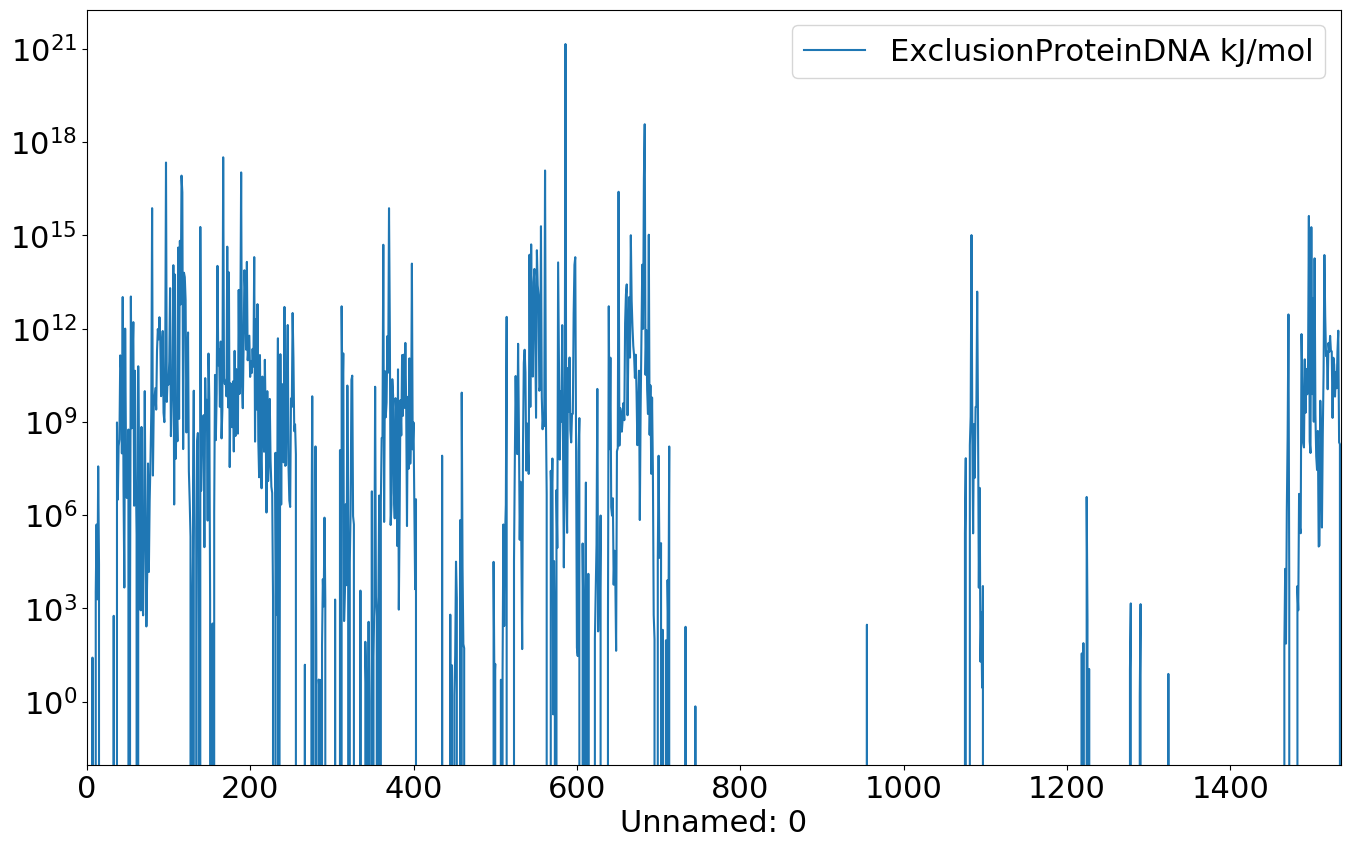

In [78]:
elec_k3_weak_contact_first_no.plot("Unnamed: 0", "ExclusionProteinDNA kJ/mol")
plt.yscale("log")

### this one, the protein fold around the DNA, the shape is not normal.
### still a very large elec-PD.(protein-DNA) -274 compared with -170 in native.
### so I decide, to run without the elec-PD first, then bring it back after the protein is folded.

In [72]:
energy_file = f"{pre}/elec_k3_weak_contact_1a36_0_energies.csv"
elec_k3_weak_contact = pd.read_csv(energy_file)

In [73]:
elec_k3_weak_contact

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0             0         -591.627197          0.046304   -3750.447754   
1             1        -2319.415039          0.049877   -4844.100586   
2             2        -1437.811768          0.050713   -4784.676270   
3             3        -2172.055664          0.053842   -4827.446289   
4             4        -1324.769287          0.051825   -4476.101562   
..          ...                 ...               ...            ...   
745         745       -29707.246094          0.180550  -13539.585938   
746         746       -29827.328125          0.185199  -13654.011719   
747         747       -30196.355469          0.182041  -13742.802734   
748         748       -29392.640625          0.185684  -13396.259766   
749         749       -29857.906250          0.188364  -13687.683594   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     158.260208    477.781555      -350.364044      -337.554688   
1     181.922852    484.479065      -287.615997      -309.621948   
2     253.881271    534.353149      -265.211029      -286.368439   
3     281.847717    426.217407      -314.825897      -190.567047   
4     283.268646    523.928223      -257.409546      -262.557281   
..           ...           ...              ...              ...   
745    60.820023    152.966492      -491.024628      -506.458801   
746    85.772575    171.248138      -502.159271      -491.975555   
747    50.330521    168.061584      -475.156738      -501.522888   
748    79.043900    165.770874      -502.630127      -488.151276   
749    68.289467    205.726151      -487.147217      -506.653015   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -101.299805            -22.383598          5.276686   
1         -50.050198            -16.093178          8.403635   
2         -31.059809            -17.342331          2.968157   
3         -25.410385            -18.896715          9.181881   
4         -27.531574            -11.682346          4.000017   
..               ...                   ...               ...   
745      -266.521851            -65.257889          3.940273   
746      -283.862793            -68.162506          0.994475   
747      -281.153992            -65.834267          7.296491   
748      -270.985321            -64.453468          0.666489   
749      -282.655518            -61.409477          2.467853   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                30.820671         13181.394531  13181.394531  13181.394531   
1                27.858191         12913.630859  12913.630859  12913.629883   
2                32.293884         13442.193359  13442.193359  13442.193359   
3                32.520653         13187.001953  13187.000977  13187.000977   
4                30.571556         13380.287109  13380.287109  13380.287109   
..                     ...                  ...           ...           ...   
745              32.302399          5188.449219   5188.448730   5188.448730   
746              31.327314          5206.958496   5206.958496   5206.958496   
747              31.829210          4983.755859   4983.756348   4983.755859   
748              31.695663          5322.836914   5322.836914   5322.836914   
749              30.636265          5096.162109   5096.162109   5096.162109   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    13181.394531 -2394.257324     -2394.257324    -1936.160889    -21.753494   
1    12913.629883 -2460.115234     -2460.115234    -1933.147461    -56.040894   
2    13442.193359 -2228.415039     -2228.415039    -1966.096802    -35.908363   
3    13187.000977 -2508.762695     -2508.762695    -2000.892944    -38.393044   
4    13380.287109 -2475.623047     -2475.623047    -1927.803101    -45.686489   
..            ...          ...              ...             ...           ...   
745   5188.448730 -5095.400391     -50

In [70]:
elec_k3_weak_contact

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  Bond kJ/mol  \
0             0         4025.972412           13280.344727   158.260162   
1             1         3442.242188           13064.487305   181.922791   
2             2         4274.123535           13591.301758   253.881256   
3             3         3613.936523           13350.619141   281.847626   
4             4         4062.674316           13532.033203   283.268677   
..          ...                 ...                    ...          ...   
745         745       -15033.839844            5215.513184    60.820015   
746         746       -15071.269531            5220.625977    85.772568   
747         747       -15375.636719            5004.402832    50.330532   
748         748       -14928.156250            5345.765625    79.043884   
749         749       -15132.220703            5118.064941    68.289459   

     Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  \
0      477.781555      -350.364044      -337.554657      -101.299789   
1      484.479095      -287.615997      -309.621918       -50.050182   
2      534.353271      -265.211060      -286.368378       -31.059803   
3      426.217529      -314.825897      -190.567062       -25.410397   
4      523.928223      -257.409515      -262.557251       -27.531567   
..            ...              ...              ...              ...   
745    152.966522      -491.024628      -506.458740      -266.521790   
746    171.248138      -502.159271      -491.975555      -283.862701   
747    168.061630      -475.156738      -501.522827      -281.153992   
748    165.770874      -502.630127      -488.151276      -270.985352   
749    205.726151      -487.147217      -506.653015      -282.655487   

     CrossStacking kJ/mol  Exclusion kJ/mol  Electrostatics kJ/mol  \
0              -22.383596          5.276686              30.820669   
1              -16.093176          8.403636              27.858189   
2              -17.342335          2.968159              32.293880   
3              -18.896715          9.181882              32.520649   
4              -11.682342          4.000018              30.571556   
..                    ...               ...                    ...   
745            -65.257889          3.940270              32.302399   
746            -68.162491          0.994473              31.327316   
747            -65.834267          7.296498              31.829205   
748            -64.453476          0.666489              31.695662   
749            -61.409458          2.467852              30.636261   

     Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol   Excl kJ/mol  \
0           13280.344727  13280.344727  13280.344727  13280.344727   
1           13064.486328  13064.486328  13064.487305  13064.487305   
2           13591.300781  13591.302734  13591.302734  13591.301758   
3           13350.619141  13350.619141  13350.619141  13350.619141   
4           13532.033203  13532.032227  13532.033203  13532.033203   
..                   ...           ...           ...           ...   
745          5215.513672   5215.513184   5215.512695   5215.513184   
746          5220.625977   5220.625977   5220.625977   5220.625977   
747          5004.403320   5004.402832   5004.402832   5004.403320   
748          5345.765625   5345.765625   5345.765625   5345.765625   
749          5118.064941   5118.065430   5118.065430   5118.065430   

     rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  beta2 kJ/mol  \
0   -2394.257324     -2394.257324    -1161.696533    -21.753496    -21.753496   
1   -2460.115234     -2460.115234    -1159.888428    -56.040890    -56.040890   
2   -2228.415039     -2228.415039    -1179.658081    -35.908363    -35.908363   
3   -2508.762695     -2508.762695    -1200.535645    -38.393044    -38.393044   
4   -2475.622803     -2475.622803    -1156.681885    -45.686485    -45.686485   
..           ...              ...             ...           ...        

### This fold to crowded. too large contact and elctro term
### i decrease the electro k to 3, and contact to 0.6

In [64]:
energy_file = f"{pre}/elec_k5_1a36_0_energies.csv"
elec_k5 = pd.read_csv(energy_file)

In [65]:
elec_k5

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0             0        -1275.583984          0.044242   -3975.183105   
1             1        -1117.047241          0.047039   -4022.068359   
2             2        -1255.271729          0.050780   -4633.486816   
3             3        -2515.203369          0.053514   -4950.270508   
4             4        -2773.610840          0.057187   -5151.971680   
..          ...                 ...               ...            ...   
745         745       -29647.820312          0.174253  -12966.069336   
746         746       -29861.570312          0.172975  -12997.693359   
747         747       -29743.214844          0.174273  -13040.927734   
748         748       -29611.640625          0.174808  -13095.754883   
749         749       -29393.707031          0.171729  -12899.969727   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     213.720657    446.278412      -342.176544      -340.320770   
1     233.990997    434.423523      -332.631531      -311.402893   
2     150.035248    456.900696      -295.273010      -303.788239   
3     263.255066    549.169434      -299.608765      -295.383667   
4     277.642273    554.294556      -281.504425      -270.216370   
..           ...           ...              ...              ...   
745    73.332268    154.937408      -501.866089      -453.833008   
746    94.608513    163.193542      -502.075806      -445.566895   
747    77.943298    186.227722      -499.087311      -443.266357   
748    92.791779    225.841248      -474.238342      -466.915039   
749    88.008614    156.585587      -483.028259      -454.568420   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -87.032585            -29.616756         10.055121   
1         -33.870060            -13.922815          7.842590   
2          -7.998295             -8.315025         21.840111   
3         -15.696991             -7.779157          1.726174   
4         -11.418318             -7.857366          5.273697   
..               ...                   ...               ...   
745      -259.537415            -57.208065          3.519470   
746      -274.083344            -63.066883         11.536770   
747      -252.712921            -61.326359          3.869683   
748      -263.965881            -62.675774          4.623479   
749      -246.376831            -61.220921         13.772707   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                31.307692         12814.176758  12814.176758  12814.176758   
1                29.874681         13223.242188  13223.242188  13223.242188   
2                28.099506         13727.435547  13727.435547  13727.434570   
3                28.249380         12837.708984  12837.709961  12837.709961   
4                28.883514         12986.953125  12986.953125  12986.952148   
..                     ...                  ...           ...           ...   
745              39.181747          5158.396484   5158.395508   5158.395996   
746              40.124180          5025.058105   5025.058105   5025.057617   
747              41.342808          5125.562012   5125.562500   5125.562012   
748              39.833611          5345.441895   5345.441895   5345.441895   
749              41.063721          5267.428711   5267.428711   5267.428711   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    12814.175781 -2319.988281     -2319.988281    -2019.848633    -24.214420   
1    13223.242188 -2627.866943     -2627.866943    -2032.746460    -26.395811   
2    13727.435547 -2340.547363     -2340.547363    -2060.383057    -21.627968   
3    12837.709961 -2401.757568     -2401.757568    -2066.503418    -73.142250   
4    12986.953125 -2538.182129     -2538.182129    -2156.076660    -63.303425   
..            ...          ...              ...             ...           ...   
745   5158.395508 -4869.236816     -48

In [63]:
elec_k5

Unnamed: 0  TotalEnergy kJ/mol  dna_constraint kJ/mol  Bond kJ/mol  \
0             0         2798.751221           12920.017578   213.720612   
1             1         2977.150391           13306.714844   233.990997   
2             2         3570.504395           13938.670898   150.035217   
3             3         2501.365479           12937.806641   263.255005   
4             4         2531.562988           13158.144531   277.642212   
..          ...                 ...                    ...          ...   
745         745       -17743.507812            5215.877441    73.332260   
746         746       -17915.023438            5074.129883    94.608505   
747         747       -17752.500000            5186.471191    77.943291   
748         748       -17549.781250            5396.810059    92.791763   
749         749       -17510.771484            5321.157227    88.008652   

     Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  \
0      446.278381      -342.176544      -340.320770       -87.032585   
1      434.423584      -332.631470      -311.402832       -33.870079   
2      456.900757      -295.272980      -303.788239        -7.998293   
3      549.169434      -299.608704      -295.383636       -15.696985   
4      554.294556      -281.504333      -270.216339       -11.418300   
..            ...              ...              ...              ...   
745    154.937393      -501.866119      -453.833008      -259.537415   
746    163.193542      -502.075806      -445.566833      -274.083374   
747    186.227692      -499.087250      -443.266357      -252.712921   
748    225.841217      -474.238281      -466.915009      -263.965851   
749    156.585602      -483.028259      -454.568390      -246.376846   

     CrossStacking kJ/mol  Exclusion kJ/mol  Electrostatics kJ/mol  \
0              -29.616756         10.055115              31.307690   
1              -13.922819          7.842584              29.874681   
2               -8.315023         21.840113              28.099504   
3               -7.779157          1.726175              28.249378   
4               -7.857361          5.273691              28.883511   
..                    ...               ...                    ...   
745            -57.208065          3.519470              39.181747   
746            -63.066891         11.536770              40.124176   
747            -61.326370          3.869683              41.342804   
748            -62.675781          4.623479              39.833614   
749            -61.220936         13.772704              41.063721   

     Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol   Excl kJ/mol  \
0           12920.017578  12920.017578  12920.017578  12920.017578   
1           13306.713867  13306.714844  13306.713867  13306.714844   
2           13938.670898  13938.670898  13938.669922  13938.669922   
3           12937.806641  12937.806641  12937.806641  12937.806641   
4           13158.144531  13158.144531  13158.144531  13158.144531   
..                   ...           ...           ...           ...   
745          5215.877930   5215.877930   5215.877441   5215.877441   
746          5074.129883   5074.130371   5074.129883   5074.130371   
747          5186.471680   5186.471191   5186.471191   5186.471680   
748          5396.810547   5396.810547   5396.810547   5396.810547   
749          5321.157227   5321.157227   5321.157227   5321.157227   

     rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  beta2 kJ/mol  \
0   -2319.988281     -2319.988281    -2019.848633    -24.214420    -24.214420   
1   -2627.866699     -2627.866699    -2032.746338    -26.395809    -26.395809   
2   -2340.547363     -2340.547363    -2060.383057    -21.627968    -21.627968   
3   -2401.757568     -2401.757568    -2066.503418    -73.142242    -73.142242   
4   -2538.181885     -2538.181885    -2156.077148    -63.303421    -63.303421   
..           ...              ...             ...           ...        

## there is a mirror image, probably due to the annealing is too fast.
### also, maybe the current potential is too large. so it stuck at some local minimum. 
### I will try to increase the temperature, and drop the amh-go term.
### currently, the protein fold at around 600K.

In [60]:
energy_file = f"{pre}/with_amhgo_cutoff16_elec_k5_1a36_0_energies.csv"
cutoff16_elec_k5 = pd.read_csv(energy_file)

In [61]:
cutoff16_elec_k5

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0             0       -12020.449219          0.091437  -11418.078125   
1             1       -15817.218750          0.112425  -13717.338867   
2             2       -16640.150391          0.132516  -14857.622070   
3             3       -19121.332031          0.195720  -16053.638672   
4             4       -20265.617188          0.238421  -16940.810547   
..          ...                 ...               ...            ...   
745         745       -38422.332031          0.524700  -21104.023438   
746         746       -37996.253906          0.524586  -21114.894531   
747         747       -38202.527344          0.518202  -21113.101562   
748         748       -38249.167969          0.513549  -21096.587891   
749         749       -38157.593750          0.520546  -21051.214844   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     232.238434    413.090912      -313.558594      -306.008972   
1     228.072342    417.927734      -313.610962      -276.851471   
2     186.258850    426.691223      -311.815521      -309.777832   
3     163.782227    472.322388      -287.218658      -319.453552   
4     233.142395    541.981812      -272.532715      -292.790649   
..           ...           ...              ...              ...   
745    41.598854    103.465637      -507.283752      -440.298645   
746    56.193478    127.726250      -514.384827      -445.876373   
747    45.844772    131.175369      -504.280884      -441.355927   
748    53.846836    131.354858      -503.173584      -442.483643   
749    72.694794    130.819962      -497.553711      -455.650604   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -31.621284            -18.530718          0.609952   
1         -45.610928            -13.101348          2.812229   
2           5.608495            -15.508778          4.318938   
3         -15.821905             -9.537273          1.192322   
4         -37.592258            -16.264042          0.465356   
..               ...                   ...               ...   
745      -294.400391            -66.015854          1.136151   
746      -285.449005            -66.659737          2.700405   
747      -289.696289            -65.251602          1.604773   
748      -288.690948            -68.287811          0.955609   
749      -283.759216            -62.429966          1.340667   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                30.964396         13667.182617  13667.183594  13667.182617   
1                30.374706         13517.341797  13517.341797  13517.341797   
2                30.590771         13906.835938  13906.834961  13906.835938   
3                27.967075         13418.086914  13418.087891  13418.086914   
4                30.907730         13298.978516  13298.978516  13298.978516   
..                     ...                  ...           ...           ...   
745              37.929596          3827.874023   3827.874023   3827.874023   
746              37.998619          4187.053711   4187.053711   4187.053711   
747              37.929401          4053.935547   4053.935547   4053.935547   
748              38.580032          3939.638184   3939.638184   3939.638184   
749              37.391083          4005.538086   4005.538086   4005.538330   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    13667.182617 -2752.714844     -2752.714844    -2403.342285   -205.898102   
1    13517.341797 -3218.535889     -3218.535889    -2565.927734   -376.312805   
2    13906.835938 -3024.222900     -3024.222900    -2513.442871   -397.080139   
3    13418.087891 -3283.142334     -3283.142334    -2657.123291   -380.883972   
4    13298.978516 -3494.699951     -3494.699951    -2813.550781   -425.137512   
..            ...          ...              ...             ...           ...   
745   3827.874023 -4664.638672     -46

In [59]:
cutoff16_elec_k5

Unnamed: 0  TotalEnergy kJ/mol  AMH_Go kJ/mol  dna_constraint kJ/mol  \
0             0       -37038.421875  -36533.500000           13776.740234   
1             1       -46726.242188  -44761.757812           13661.101562   
2             2       -52470.546875  -50902.460938           14132.503906   
3             3       -60475.433594  -57563.722656           13582.892578   
4             4       -67496.343750  -64251.734375           13415.923828   
..          ...                 ...            ...                    ...   
745         745      -100683.921875  -83015.343750            3878.244629   
746         746      -100322.437500  -83063.031250            4227.273926   
747         747      -100408.828125  -82946.453125            4095.352783   
748         748      -100548.296875  -83051.609375            3979.464355   
749         749      -100435.648438  -82949.820312            4055.005127   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     232.238388    413.090881      -313.558594      -306.008972   
1     228.072327    417.927673      -313.610962      -276.851471   
2     186.258789    426.691223      -311.815491      -309.777802   
3     163.782181    472.322449      -287.218658      -319.453552   
4     233.142365    541.981812      -272.532684      -292.790619   
..           ...           ...              ...              ...   
745    41.598839    103.465591      -507.283752      -440.298645   
746    56.193466    127.726288      -514.384888      -445.876343   
747    45.844772    131.175354      -504.280853      -441.355927   
748    53.846851    131.354889      -503.173584      -442.483612   
749    72.694817    130.819962      -497.553680      -455.650604   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -31.621319            -18.530704          0.609951   
1         -45.610909            -13.101356          2.812228   
2           5.608494            -15.508768          4.318938   
3         -15.821922             -9.537271          1.192320   
4         -37.592285            -16.264044          0.465354   
..               ...                   ...               ...   
745      -294.400360            -66.015846          1.136153   
746      -285.449005            -66.659752          2.700405   
747      -289.696289            -65.251602          1.604773   
748      -288.690979            -68.287827          0.955607   
749      -283.759155            -62.429962          1.340666   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                30.964396         13776.740234  13776.740234  13776.740234   
1                30.374704         13661.101562  13661.101562  13661.101562   
2                30.590771         14132.502930  14132.503906  14132.502930   
3                27.967072         13582.892578  13582.893555  13582.893555   
4                30.907730         13415.923828  13415.923828  13415.923828   
..                     ...                  ...           ...           ...   
745              37.929596          3878.244629   3878.244629   3878.244629   
746              37.998615          4227.273438   4227.273438   4227.273926   
747              37.929398          4095.352539   4095.352539   4095.352539   
748              38.580029          3979.464355   3979.464600   3979.464844   
749              37.391083          4055.005371   4055.005127   4055.005371   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    13776.740234 -2752.714600     -2752.714600    -2403.342041   -205.898087   
1    13661.101562 -3218.535645     -3218.535645    -2565.927734   -376.312775   
2    14132.503906 -3024.222412     -3024.222412    -2513.442871   -397.080139   
3    13582.893555 -3283.142090     -3283.142090    -2657.123291   -380.883972   
4    13415.923828 -3494.699707     -3494.699707    -2813.550781   -425.137482   
..            ...          ...              ...            

## increase the cutoff of AMH-GO term, improved the Q_protein.
However, it is still not perfect. and the Go term energy is not as low as expected.
More importantly, the next step is to increase the protein DNA interaction strength.
I will use a regular single memory, and half the regualr strength of AMH-go term.
and 5 times the regualr interaction strength.

In [55]:
energy_file = f"{pre}/with_amhgo_cutoff16_1a36_0_energies.csv"
cutoff16 = pd.read_csv(energy_file)

In [56]:
cutoff16

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0             0       -17128.343750          0.116952  -14603.701172   
1             1       -19392.123047          0.177122  -16584.847656   
2             2       -21480.886719          0.264335  -18751.417969   
3             3       -24360.800781          0.368844  -20440.398438   
4             4       -24577.890625          0.381158  -20552.609375   
..          ...                 ...               ...            ...   
745         745       -38144.640625          0.692829  -21755.726562   
746         746       -37998.812500          0.693175  -21735.675781   
747         747       -38111.281250          0.691325  -21738.675781   
748         748       -38121.042969          0.691387  -21767.707031   
749         749       -38158.750000          0.692693  -21777.593750   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     146.953308    489.531677      -299.672058      -255.312149   
1     227.527847    527.590149      -325.255798      -249.528748   
2     176.604767    494.746124      -312.765045      -304.191956   
3     240.809555    403.346558      -325.337769      -267.300110   
4     173.109344    480.086853      -351.632996      -310.278687   
..           ...           ...              ...              ...   
745    39.873760    126.750160      -505.605469      -526.474182   
746    46.600971    114.086853      -507.295715      -515.546997   
747    37.133106    106.935028      -488.953461      -515.929321   
748    57.228374    151.500854      -526.246948      -517.678406   
749    51.980255    105.414421      -507.669037      -513.667419   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -49.175858            -14.365455          5.225780   
1         -22.831799            -17.290840         10.705187   
2         -69.215302            -20.777632          3.038112   
3         -43.077816            -18.757130          2.351897   
4         -38.378777             -7.215595          1.496390   
..               ...                   ...               ...   
745      -298.282532            -69.617584          0.816472   
746      -304.073334            -70.855804          2.688676   
747      -311.949738            -70.660736          0.959485   
748      -293.462280            -71.246544          2.887837   
749      -304.206665            -68.411415          2.937351   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                33.911648         13719.543945  13719.543945  13719.543945   
1                34.084347         13990.775391  13990.775391  13990.775391   
2                32.298748         14464.813477  14464.813477  14464.813477   
3                33.191490         14274.659180  14274.659180  14274.659180   
4                32.398083         13985.944336  13985.944336  13985.945312   
..                     ...                  ...           ...           ...   
745              31.011040          4759.320312   4759.320312   4759.320312   
746              30.718037          4831.432617   4831.432617   4831.432617   
747              29.900311          4814.083008   4814.083008   4814.083008   
748              30.156889          4797.367676   4797.367676   4797.368164   
749              30.635065          4873.005859   4873.005859   4873.005859   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    13719.544922 -3216.645996     -3216.645996    -2501.313965   -384.308746   
1    13990.775391 -3446.583008     -3446.583008    -2642.278076   -415.942841   
2    14464.813477 -3291.305664     -3291.305664    -2838.295166   -476.329407   
3    14274.659180 -3800.162109     -3800.162109    -2917.007568   -561.603149   
4    13985.943359 -3482.352539     -3482.352539    -2869.675293   -613.383057   
..            ...          ...              ...             ...           ...   
745   4759.320312 -4607.873047     -46

# a stronger AMH-GO term.  somehow doesn't further guide the folding.
## the minimum is ~24000, but it only reaches ~20000.
## might be because it was stuck somewhere.
## the protein - DNA interaction is weak. should be increased.
## why I cannot fold the protein?

In [ ]:
energy_file = f"{pre}/with_amhgo_k2_1a36_0_energies.csv"
with_amhgo_k2 = pd.read_csv(energy_file)

In [52]:
with_amhgo_k2.columns

Index(['Unnamed: 0', 'TotalEnergy kJ/mol', 'Q_protein kJ/mol', 'AMH_Go kJ/mol',
       'Bond kJ/mol', 'Angle kJ/mol', 'Stacking kJ/mol', 'Dihedral kJ/mol',
       'BasePair kJ/mol', 'CrossStacking kJ/mol', 'Exclusion kJ/mol',
       'Electrostatics kJ/mol', 'Connectivity kJ/mol', 'Chain kJ/mol',
       'Chi kJ/mol', 'Excl kJ/mol', 'rama kJ/mol', 'rama_pro kJ/mol',
       'contact kJ/mol', 'beta1 kJ/mol', 'beta2 kJ/mol', 'beta3 kJ/mol',
       'pap1 kJ/mol', 'pap2 kJ/mol', 'fm kJ/mol', 'ExclusionProteinDNA kJ/mol',
       'ElectrostaticsProteinDNA kJ/mol', 'Q_value_sigma5', 'Q_value_sigma3',
       'Q_value_sigma1', 'Q_value_sym_sigma5', 'Q_value_sym_sigma3',
       'Q_value_sym_sigma1'],
      dtype='object')

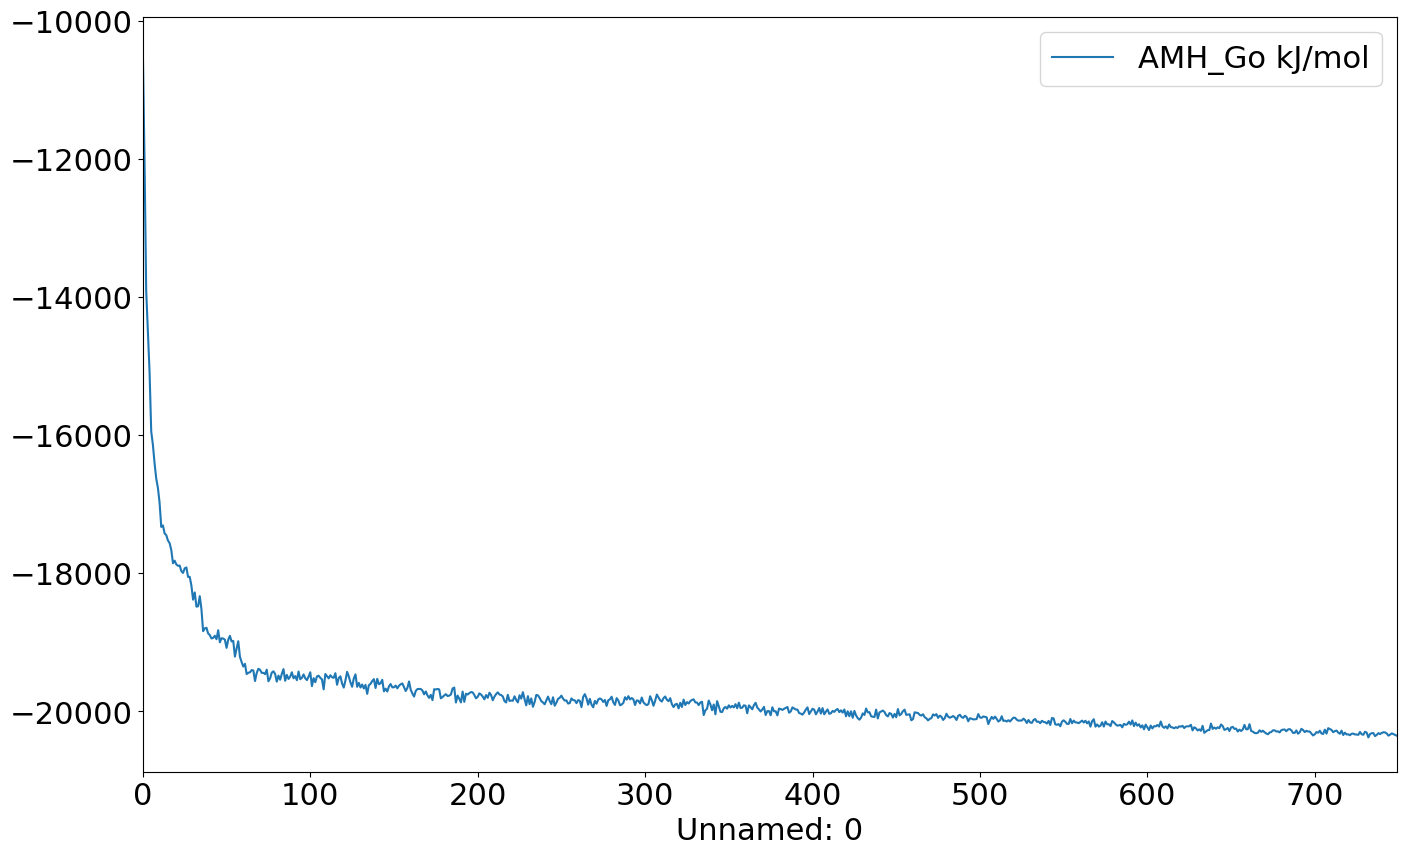

In [54]:
with_amhgo_k2.plot("Unnamed: 0", "AMH_Go kJ/mol")

In [51]:
with_amhgo_k2

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0             0       -11349.651367          0.068178  -10437.296875   
1             1       -14084.978516          0.084096  -12013.707031   
2             2       -17059.992188          0.101687  -13908.556641   
3             3       -16731.947266          0.106183  -14512.938477   
4             4       -18375.710938          0.110928  -15078.777344   
..          ...                 ...               ...            ...   
745         745       -38212.691406          0.283995  -20336.820312   
746         746       -38280.851562          0.285329  -20318.714844   
747         747       -38079.382812          0.291415  -20329.679688   
748         748       -38259.046875          0.287246  -20341.089844   
749         749       -38396.617188          0.285596  -20352.402344   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     229.184723    524.388794      -308.894257      -320.585846   
1     176.230942    459.207275      -280.465149      -336.121185   
2     214.218445    389.616669      -335.475525      -355.794220   
3     229.765549    515.253052      -323.237915      -276.040558   
4     189.639374    442.696381      -243.429733      -301.115112   
..           ...           ...              ...              ...   
745    58.009045    123.575005      -511.079803      -494.487854   
746    38.719402    118.692078      -513.610901      -513.120605   
747    60.986191    119.370621      -513.069214      -492.840881   
748    47.043564    127.358841      -499.029938      -497.525024   
749    49.127647    136.112961      -512.312622      -501.881561   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -77.693710            -17.556198          7.299036   
1         -21.834370            -15.261388          4.649366   
2        -105.173904            -25.313942          3.374076   
3         -23.327225            -15.916163         20.737286   
4         -33.101917            -18.181795          3.875393   
..               ...                   ...               ...   
745      -304.937836            -75.029045          2.687514   
746      -312.903687            -73.642670          0.687082   
747      -293.534943            -68.005554          0.812024   
748      -294.895660            -67.680504          0.535318   
749      -296.989075            -75.481476          0.353090   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                30.974798         13191.244141  13191.244141  13191.244141   
1                28.876444         13429.396484  13429.396484  13429.396484   
2                32.034401         12884.892578  12884.891602  12884.891602   
3                34.048325         13660.233398  13660.234375  13660.234375   
4                30.610514         13234.298828  13234.298828  13234.299805   
..                     ...                  ...           ...           ...   
745              32.131157          3956.689209   3956.689209   3956.689209   
746              30.368240          3926.859375   3926.859619   3926.859619   
747              32.676510          4105.003906   4105.003906   4105.003906   
748              31.628651          3932.154541   3932.154297   3932.154541   
749              33.288712          3828.843506   3828.843750   3828.843750   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    13191.244141 -2839.753662     -2839.753662    -2063.025879   -240.442749   
1    13429.396484 -3083.194824     -3083.194824    -2222.266113   -324.775696   
2    12884.892578 -3346.017578     -3346.017578    -2239.096191   -376.672058   
3    13660.234375 -3155.703857     -3155.703857    -2401.351562   -369.741272   
4    13234.299805 -3418.221680     -3418.221680    -2449.976074   -405.144470   
..            ...          ...              ...             ...           ...   
745   3956.689209 -4720.538574     -47

In [47]:
energy_file = f"{pre}/native_1a36_3_energies.csv"
native_new = pd.read_csv(energy_file)

In [48]:
native_new

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0             0       -41761.898438          0.910350  -24148.511719   
1             1       -41800.851562          0.925077  -24174.560547   
2             2       -41745.632812          0.851793  -24189.828125   
3             3       -41892.742188          0.886018  -24129.302734   
4             4       -41876.664062          0.916250  -24161.134766   
..          ...                 ...               ...            ...   
245         245       -44218.445312          0.910282  -24328.419922   
246         246       -44081.304688          0.869112  -24308.099609   
247         247       -43920.828125          0.884810  -24328.154297   
248         248       -44173.488281          0.905386  -24323.910156   
249         249       -44217.929688          0.881131  -24323.048828   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0      72.628693    174.160477      -492.280762      -496.281281   
1      72.544197    165.041199      -480.148041      -500.106628   
2      91.083344    172.127487      -461.366455      -494.880646   
3      51.578461    184.347809      -506.004578      -479.178986   
4      88.812004    172.881195      -492.063080      -504.710785   
..           ...           ...              ...              ...   
245    53.136841    105.146851      -508.894928      -512.151855   
246    58.100685    124.604019      -516.636841      -512.087708   
247    56.388245    144.464966      -480.523895      -513.313965   
248    47.034550    116.440445      -496.897888      -512.915588   
249    57.388577     98.314499      -520.283386      -528.126709   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -299.294342            -65.298683          1.116977   
1        -274.647064            -63.609055          0.172277   
2        -291.325989            -64.341721          0.568332   
3        -276.171234            -59.279732          1.358014   
4        -276.787720            -68.570572          2.135250   
..               ...                   ...               ...   
245      -310.310913            -76.330750          1.095423   
246      -298.018494            -66.826683          0.774467   
247      -315.142426            -69.884544          0.503394   
248      -299.912720            -70.170296          0.917068   
249      -308.141663            -77.708755          0.809490   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0                32.101761          4982.414062   4982.413574  4982.414062   
1                30.470150          4873.564453   4873.563965  4873.564453   
2                31.616669          5072.878906   5072.878906  5072.878906   
3                31.211781          4813.846680   4813.846680  4813.846680   
4                31.823505          4870.122070   4870.122070  4870.122070   
..                     ...                  ...           ...          ...   
245              32.260189          3308.041260   3308.041016  3308.041016   
246              31.588593          3324.935547   3324.935547  3324.935303   
247              31.224329          3461.500488   3461.500732  3461.500488   
248              32.955006          3295.433594   3295.433350  3295.433350   
249              32.398632          3235.748535   3235.749023  3235.748779   

     Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    4982.413574 -5116.578125     -5116.578125    -3372.669434   -788.578857   
1    4873.564453 -5086.610840     -5086.610840    -3325.110840   -782.810059   
2    5072.878906 -5138.804688     -5138.804688    -3395.028320   -788.807373   
3    4813.846680 -5095.519531     -5095.519531    -3352.770020   -804.503418   
4    4870.121582 -5147.251953     -5147.251953    -3358.418945   -787.141235   
..           ...          ...              ...             ...           ...   
245  3308.041260 -5325.213867     -5325.213867    -3454.2

In [46]:
with_amhgo

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0             0       -10750.947266          0.062825   -9678.261719   
1             1       -13297.464844          0.075604  -11053.300781   
2             2       -14902.109375          0.083236  -12035.213867   
3             3       -15947.250000          0.088237  -12537.917969   
4             4       -15843.654297          0.093418  -12806.130859   
..          ...                 ...               ...            ...   
245         245       -39596.703125          0.314597  -20387.183594   
246         246       -39606.546875          0.310633  -20429.335938   
247         247       -39578.765625          0.309249  -20390.837891   
248         248       -39468.675781          0.306236  -20398.111328   
249         249       -39478.097656          0.306462  -20409.382812   

     Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0     149.426193    517.377930      -319.720062      -275.121674   
1     213.087036    501.993713      -338.494598      -313.467285   
2     181.505737    466.779846      -292.776245      -346.465729   
3     247.747009    517.660400      -308.050293      -278.021027   
4     153.598907    528.759277      -352.527618      -260.748627   
..           ...           ...              ...              ...   
245    55.472801    138.631836      -496.102478      -517.640259   
246    70.273003    130.749512      -510.427429      -511.141541   
247    59.400360     96.042801      -516.172241      -510.332550   
248    60.345993    127.284348      -493.340912      -523.022644   
249    43.699539    128.529327      -499.468048      -516.597412   

     BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0        -104.039024            -24.935095         13.402123   
1         -33.131500            -26.611055          3.097094   
2         -33.652851            -12.882930         12.337412   
3         -42.643871            -15.114118          4.471396   
4         -42.027218            -24.561172          0.508689   
..               ...                   ...               ...   
245      -301.709351            -73.817024          1.231170   
246      -303.869232            -74.540977          0.828926   
247      -310.443481            -71.254417          2.212485   
248      -308.064453            -72.393158          1.028468   
249      -300.053864            -67.303329          1.255454   

     Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                34.191772         13019.257812  13019.257812  13019.257812   
1                28.511181         12592.583984  12592.583984  12592.583984   
2                29.659906         12704.085938  12704.085938  12704.085938   
3                29.861839         12395.682617  12395.683594  12395.682617   
4                26.447130         12933.581055  12933.582031  12933.581055   
..                     ...                  ...           ...           ...   
245              30.545010          3564.943359   3564.943359   3564.943359   
246              31.340694          3511.935059   3511.935059   3511.935059   
247              30.084549          3513.275879   3513.275879   3513.275879   
248              30.895117          3640.344238   3640.344238   3640.344238   
249              30.709763          3644.728027   3644.727783   3644.728027   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    13019.257812 -2925.430420     -2925.430420    -2049.059082   -240.644409   
1    12592.583984 -3026.788574     -3026.788574    -2087.078369   -284.897614   
2    12704.085938 -3162.030762     -3162.030762    -2219.551758   -326.753876   
3    12395.682617 -3292.691406     -3292.691406    -2303.702637   -376.941223   
4    12933.582031 -3276.439453     -3276.439453    -2357.783691   -345.748291   
..            ...          ...              ...             ...           ...   
245   3564.943359 -5073.248535     -50

In [44]:
compare

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0              0       -37504.875000          0.825722  -21279.523438   
1              1       -37955.546875          0.762591  -21053.363281   
2              2       -38121.593750          0.726033  -20720.347656   
3              3       -37943.062500          0.707940  -20568.064453   
4              4       -37851.929688          0.718896  -20688.535156   
...          ...                 ...               ...            ...   
1354        1354       -36506.070312          0.430025  -19029.640625   
1355        1355       -36861.421875          0.424452  -19395.335938   
1356        1356       -36988.414062          0.412031  -19329.656250   
1357        1357       -37012.460938          0.416456  -19312.449219   
1358        1358       -36703.621094          0.422809  -19191.089844   

      Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0       75.343140    276.041138      -404.931763      -447.719666   
1       78.837845    202.295853      -463.306152      -500.029388   
2       45.343384    182.227203      -466.012146      -497.576752   
3       64.157227    163.367310      -460.815002      -489.121063   
4       63.687714    146.258972      -476.539734      -496.871429   
...           ...           ...              ...              ...   
1354    90.647491    192.593079      -469.639801      -468.173981   
1355    67.424347    174.690506      -477.919586      -487.781250   
1356    76.937561    191.284973      -473.358185      -480.496857   
1357    76.072525    159.028076      -466.892578      -502.093353   
1358    85.468567    158.939087      -484.828491      -508.127014   

      BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0         -191.299591            -40.055309          1.675032   
1         -240.514221            -61.044048          4.596742   
2         -246.141342            -58.878990          3.851925   
3         -270.730865            -62.089294          0.573608   
4         -256.511627            -65.100105          1.010401   
...               ...                   ...               ...   
1354      -270.791748            -71.202927          0.528190   
1355      -266.450928            -60.205299          4.617456   
1356      -254.787170            -66.500061          0.077047   
1357      -242.101013            -59.811340          0.785941   
1358      -278.751129            -57.349087          1.047828   

      Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol   Chi kJ/mol  \
0                 33.851437          5306.451172   5306.451172  5306.451172   
1                 31.475452          5053.401855   5053.401855  5053.401855   
2                 30.994719          4868.972656   4868.972656  4868.972656   
3                 29.920189          4948.175781   4948.174805  4948.175293   
4                 29.678308          5107.648438   5107.648438  5107.648438   
...                     ...                  ...           ...          ...   
1354              30.002695          5095.862793   5095.862793  5095.862793   
1355              31.505207          5152.247070   5152.247070  5152.247070   
1356              30.118217          4912.732910   4912.732910  4912.733398   
1357              30.083233          4942.964355   4942.964355  4942.963867   
1358              30.279930          5236.811523   5236.811523  5236.811523   

      Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0     5306.451172 -5018.418945     -5018.418945    -3669.246338   -700.023132   
1     5053.401855 -5036.673828     -5036.673828    -3837.937500   -722.758911   
2     4868.972656 -5122.433594     -5122.433594    -3992.948730   -731.085510   
3     4948.175293 -5069.142578     -5069.142578    -3956.500000   -741.189331   
4     5107.648438 -5062.105469     -5062.105469    -3953.353516   -687.670166   
...           ...          ...              ...             ...           ...   
135

In [ ]:
energy_file = f"{pre}/stronger_constraint_within_DNA_long_2_1a36_3_energies.csv"
stronger_constraint_fold = pd.read_csv(energy_file)

In [42]:
stronger_constraint_fold

Unnamed: 0  TotalEnergy kJ/mol  Q_protein kJ/mol  AMH_Go kJ/mol  \
0              0        -4963.160156          0.054905   -6479.621094   
1              1        -7802.266113          0.058871   -7683.869629   
2              2        -9053.828125          0.068091   -8166.125977   
3              3        -9764.839844          0.072248   -8775.859375   
4              4       -10567.179688          0.082018   -9535.031250   
...          ...                 ...               ...            ...   
2495        2495       -36563.640625          0.242864  -16216.877930   
2496        2496       -36352.265625          0.237273  -16116.456055   
2497        2497       -36430.898438          0.240580  -16319.963867   
2498        2498       -36592.046875          0.238279  -16310.494141   
2499        2499       -36301.097656          0.240433  -16182.482422   

      Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  Dihedral kJ/mol  \
0      193.614624    389.494141      -337.716522      -332.910492   
1      207.127121    519.555725      -325.887848      -206.008972   
2      307.757141    478.538879      -362.240845      -349.713165   
3      181.355347    514.997986      -327.461060      -301.684448   
4      217.547180    591.753052      -370.520905      -261.485016   
...           ...           ...              ...              ...   
2495    41.515511    106.215195      -508.794769      -502.782135   
2496    56.799339    146.473862      -515.979736      -524.444519   
2497    48.113899     84.582481      -519.115356      -514.517883   
2498    50.091408    120.050140      -523.828125      -522.137390   
2499    55.518173    116.415909      -505.374084      -510.044006   

      BasePair kJ/mol  CrossStacking kJ/mol  Exclusion kJ/mol  \
0          -36.121056            -22.702259          0.020081   
1           -4.853895             -5.854814          7.975885   
2          -32.963295            -14.374836          0.852112   
3          -78.616936            -15.030621          1.428239   
4          -26.641947            -13.509037          0.000000   
...               ...                   ...               ...   
2495      -303.192627            -71.480873          0.203188   
2496      -312.506287            -75.415520          0.854753   
2497      -305.784332            -72.026321          0.400839   
2498      -305.585388            -76.846069          1.107746   
2499      -306.866028            -73.560120          0.091450   

      Electrostatics kJ/mol  Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol  \
0                 31.347294         13908.466797  13908.466797  13908.466797   
1                 30.976982         12999.916016  12999.916016  12999.915039   
2                 27.070225         12746.144531  12746.143555  12746.142578   
3                 29.101568         13285.304688  13285.304688  13285.303711   
4                 30.445271         13473.679688  13473.679688  13473.679688   
...                     ...                  ...           ...           ...   
2495              29.868338          3382.899658   3382.899658   3382.899902   
2496              30.287872          3462.850098   3462.850098   3462.849854   
2497              30.814110          3461.850098   3461.850098   3461.850098   
2498              31.206524          3345.335449   3345.335205   3345.335449   
2499              30.793739          3463.173340   3463.173340   3463.173340   

       Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  \
0     13908.466797 -2489.110107     -2489.110107    -2115.102051   
1     12999.915039 -2809.565430     -2809.565430    -2095.776123   
2     12746.144531 -2711.636719     -2711.636719    -2032.897461   
3     13285.304688 -2995.083984     -2995.083984    -2119.717773   
4     13473.679688 -3035.397461     -3035.397461    -2208.354004   
...            ...          ...              ...             ...   
2495   3382.899658 -5261.002441     -5261.002441    -4907.549805   
2496   3462.85

In [39]:
stronger_constraint_fold

Unnamed: 0  TotalEnergy kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0              0         1516.460449   193.614624    389.494141   
1              1         -118.396622   207.127121    519.555725   
2              2         -887.701416   307.757141    478.538879   
3              3         -988.980469   181.355347    514.997986   
4              4        -1032.149292   217.547180    591.753052   
...          ...                 ...          ...           ...   
2495        2495       -20346.761719    41.515511    106.215195   
2496        2496       -20235.808594    56.799339    146.473862   
2497        2497       -20110.933594    48.113899     84.582481   
2498        2498       -20281.556641    50.091408    120.050140   
2499        2499       -20118.617188    55.518173    116.415909   

      Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -337.716522      -332.910492       -36.121056            -22.702259   
1         -325.887848      -206.008972        -4.853895             -5.854814   
2         -362.240845      -349.713165       -32.963295            -14.374836   
3         -327.461060      -301.684448       -78.616936            -15.030621   
4         -370.520905      -261.485016       -26.641947            -13.509037   
...               ...              ...              ...                   ...   
2495      -508.794769      -502.782135      -303.192627            -71.480873   
2496      -515.979736      -524.444519      -312.506287            -75.415520   
2497      -519.115356      -514.517883      -305.784332            -72.026321   
2498      -523.828125      -522.137390      -305.585388            -76.846069   
2499      -505.374084      -510.044006      -306.866028            -73.560120   

      Exclusion kJ/mol  Electrostatics kJ/mol  Q_protein kJ/mol  \
0             0.020081              31.347294          0.054905   
1             7.975885              30.976984          0.058871   
2             0.852112              27.070225          0.068091   
3             1.428239              29.101566          0.072248   
4             0.000000              30.445271          0.082018   
...                ...                    ...               ...   
2495          0.203188              29.868340          0.242864   
2496          0.854753              30.287872          0.237273   
2497          0.400839              30.814110          0.240580   
2498          1.107746              31.206522          0.238279   
2499          0.091450              30.793739          0.240433   

      Connectivity kJ/mol  Chain kJ/mol    Chi kJ/mol   Excl kJ/mol  \
0            13908.466797  13908.466797  13908.466797  13908.466797   
1            12999.915039  12999.915039  12999.915039  12999.916016   
2            12746.143555  12746.143555  12746.143555  12746.143555   
3            13285.304688  13285.303711  13285.303711  13285.304688   
4            13473.679688  13473.679688  13473.679688  13473.679688   
...                   ...           ...           ...           ...   
2495          3382.899902   3382.899902   3382.899658   3382.899658   
2496          3462.850098   3462.850098   3462.850098   3462.850098   
2497          3461.850098   3461.850098   3461.850098   3461.850098   
2498          3345.335205   3345.335205   3345.335205   3345.335449   
2499          3463.173340   3463.173584   3463.173340   3463.173340   

      rama kJ/mol  rama_pro kJ/mol  contact kJ/mol  beta1 kJ/mol  \
0    -2489.110107     -2489.110107    -2115.102295    -86.351395   
1    -2809.565430     -2809.565430    -2095.776123   -120.844002   
2    -2711.636719     -2711.636719    -2032.897461   -141.450775   
3    -2995.083984     -2995.083984    -2119.718018   -200.412613   
4    -3035.397461     -3035.397461    -2208.354004   -184.876251   
...           ...              ...             ...           ...   
2495 -5261.002441     -5261.002441    -4907.549805   -725.551636   
2496 -5263.055664     -526

In [15]:
stronger_constraint_fold

Unnamed: 0  TotalEnergy kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0              0         1516.404297   193.614624    389.494202   
1              1         -118.456543   207.127090    519.555725   
2              2         -887.770996   307.757172    478.538757   
3              3         -989.054382   181.355347    514.997925   
4              4        -1032.233154   217.547089    591.753052   
...          ...                 ...          ...           ...   
2495        2495       -20347.007812    41.515511    106.215256   
2496        2496       -20236.046875    56.799328    146.473892   
2497        2497       -20111.171875    48.113892     84.582458   
2498        2498       -20281.796875    50.091408    120.050140   
2499        2499       -20118.857422    55.518166    116.415886   

      Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -337.716492      -332.910553       -36.121040            -22.702257   
1         -325.887756      -206.008972        -4.853899             -5.854815   
2         -362.240906      -349.713165       -32.963310            -14.374836   
3         -327.461060      -301.684418       -78.616936            -15.030622   
4         -370.520905      -261.484955       -26.641958            -13.509039   
...               ...              ...              ...                   ...   
2495      -508.794739      -502.782074      -303.192657            -71.480865   
2496      -515.979736      -524.444458      -312.506256            -75.415527   
2497      -519.115356      -514.517883      -305.784302            -72.026321   
2498      -523.828125      -522.137329      -305.585358            -76.846062   
2499      -505.374084      -510.043976      -306.866058            -73.560104   

      Exclusion kJ/mol  Electrostatics kJ/mol  Connectivity kJ/mol  \
0             0.020081              31.347292         13908.466797   
1             7.975883              30.976980         12999.914062   
2             0.852110              27.070225         12746.142578   
3             1.428239              29.101564         13285.302734   
4             0.000000              30.445271         13473.678711   
...                ...                    ...                  ...   
2495          0.203189              29.868338          3382.899170   
2496          0.854753              30.287868          3462.849609   
2497          0.400839              30.814110          3461.849854   
2498          1.107744              31.206522          3345.334473   
2499          0.091450              30.793739          3463.173340   

      Chain kJ/mol    Chi kJ/mol   Excl kJ/mol  rama kJ/mol  rama_pro kJ/mol  \
0     13908.465820  13908.466797  13908.466797 -2489.109863     -2489.109863   
1     12999.914062  12999.915039  12999.915039 -2809.565186     -2809.565186   
2     12746.142578  12746.142578  12746.142578 -2711.636719     -2711.636719   
3     13285.302734  13285.302734  13285.303711 -2995.083740     -2995.083740   
4     13473.679688  13473.678711  13473.678711 -3035.397461     -3035.397461   
...            ...           ...           ...          ...              ...   
2495   3382.899170   3382.899170   3382.899170 -5261.001953     -5261.001953   
2496   3462.849609   3462.849609   3462.849609 -5263.055664     -5263.055664   
2497   3461.849854   3461.850098   3461.849854 -5211.725586     -5211.725586   
2498   3345.334717   3345.334961   3345.334961 -5216.617188     -5216.617188   
2499   3463.173340   3463.173340   3463.173340 -5209.401855     -5209.401855   

      contact kJ/mol  beta1 kJ/mol  beta2 kJ/mol  beta3 kJ/mol  pap1 kJ/mol  \
0       -2115.102295    -86.351395    -86.351395    -86.351395    -9.196173   
1       -2095.775879   -120.844009   -120.844009   -120.844009    -0.000497   
2       -2032.897339   -141.450775   -141.450775   -141.450775    -1.757518   
3       -2119.718018   -200.412598   -200.412598   -200.412598    -0.000001   
4       -2208.354004   -184.876

In [10]:
stronger_constraint

Unnamed: 0  TotalEnergy kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0             0         2751.756104   187.043335    472.385925   
1             1         3344.220459   206.967651    495.209229   
2             2         3570.406738   174.872589    604.908325   
3             3         3260.695557   173.167938    481.796509   
4             4         3448.626465   213.952820    528.470642   
..          ...                 ...          ...           ...   
745         745       -13794.053711    81.198723    208.947205   
746         746       -13679.349609   123.038223    221.537964   
747         747       -13966.784180    89.602585    235.601700   
748         748       -13611.095703    80.808060    273.054688   
749         749       -13771.947266   123.044830    266.527527   

     Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0        -279.620728      -285.180359       -37.666931            -20.094942   
1        -351.113556      -282.360382       -27.561464            -14.128434   
2        -326.279358      -241.867004       -11.380614            -15.850067   
3        -310.534882      -282.409485       -52.986652            -23.804586   
4        -322.784332      -301.791901       -36.606747            -16.725708   
..               ...              ...              ...                   ...   
745      -461.315857      -486.655334      -266.447876            -68.230888   
746      -472.415436      -488.727600      -258.686768            -59.512806   
747      -459.807861      -440.669617      -250.781738            -55.060417   
748      -455.670074      -459.646973      -201.079102            -56.204491   
749      -446.666687      -440.401855      -195.184113            -53.572548   

     Exclusion kJ/mol  Electrostatics kJ/mol  ...  pap2 kJ/mol    fm kJ/mol  \
0           14.769954              28.938948  ...    -0.000885 -5653.264648   
1            5.213923              32.944870  ...    -0.000000 -5666.094727   
2            9.216265              32.884300  ...    -0.000000 -5505.086914   
3            8.019660              35.213364  ...    -0.834329 -5608.276367   
4            3.138205              29.116264  ...    -0.000001 -5764.266113   
..                ...                    ...  ...          ...          ...   
745          6.431051              31.506172  ...   -44.248390 -9825.283203   
746          2.693787              31.207396  ...   -54.073891 -9862.950195   
747          4.970407              33.288662  ...   -47.779346 -9893.587891   
748          1.246781              30.025082  ...   -38.545300 -9978.288086   
749          0.614097              32.546722  ...   -56.634232 -9792.927734   

     ExclusionProteinDNA kJ/mol  ElectrostaticsProteinDNA kJ/mol  \
0                     -0.016492                       -15.730292   
1                     -0.626513                       -10.067689   
2                     -3.493746                        -9.414020   
3                     -1.571845                       -12.561926   
4                     -5.332120                       -19.371002   
..                          ...                              ...   
745                  -43.558395                      -147.625443   
746                  -62.270706                      -146.033951   
747                  -54.356178                      -149.513885   
748                  -49.563362                      -162.994598   
749                  -51.947975                      -167.630646   

     Q_value_sigma5  Q_value_sigma3  Q_value_sigma1  Q_value_sym_sigma5  \
0          0.010448        0.003916        0.000161            0.045830   
1          0.020576        0.011143        0.005402            0.064746   
2          0.025760        0.016287        0.005430            0.054612   
3          0.030074        0.018290        0.004887            0.064057   
4          0.022172        0.014490        0.005562            0.053415   
..              ...             ...

In [6]:
energy

Unnamed: 0  TotalEnergy kJ/mol  Bond kJ/mol  Angle kJ/mol  \
0              0         3305.783691   239.759033    506.615448   
1              1         3268.414062   243.954346    483.564545   
2              2         2957.700928   199.026550    625.448914   
3              3         3500.243164   218.979370    646.042480   
4              4         3810.185791   240.551346    481.391937   
...          ...                 ...          ...           ...   
1495        1495       -13895.026367   127.764664    270.320953   
1496        1496       -14001.965820    96.780586    296.236633   
1497        1497       -13191.241211    83.388748    288.018829   
1498        1498       -14020.452148   131.711029    232.028412   
1499        1499       -13470.135742    95.700760    246.400162   

      Stacking kJ/mol  Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -229.517700      -300.989807       -35.822762            -12.156846   
1         -184.352783       -97.142609        -2.403640             -2.931943   
2         -101.639122      -138.101379        -0.019470             -1.554419   
3         -146.134369       -82.631851        -0.009582             -0.445503   
4         -152.146133       -15.086666       -13.307845             -0.436618   
...               ...              ...              ...                   ...   
1495      -335.433380      -334.371521        -1.294995             -1.651048   
1496      -359.190857      -354.874023        -0.001035             -1.077930   
1497      -340.293152      -326.422363        -0.000335             -0.315053   
1498      -349.804321      -345.736359         0.000000             -0.056315   
1499      -335.066681      -298.478821        -0.000002             -0.053539   

      Exclusion kJ/mol  Electrostatics kJ/mol  ...  pap2 kJ/mol     fm kJ/mol  \
0             5.389489              33.854439  ...    -0.000001  -5597.865234   
1             4.148345              32.477295  ...    -0.001313  -5966.361328   
2             0.608642              33.851032  ...   -12.305786  -5961.482422   
3             4.168328              32.623455  ...    -0.001030  -5814.566406   
4             5.167522              35.620865  ...    -0.000000  -5927.345703   
...                ...                    ...  ...          ...           ...   
1495          0.909865              12.673875  ...   -83.489944 -10305.003906   
1496          0.759880              13.328664  ...   -74.435699 -10195.861328   
1497          0.019772              12.806475  ...   -77.932861 -10182.134766   
1498          0.255597              12.082605  ...   -75.535828 -10370.130859   
1499          2.335101              11.861460  ...   -72.454460 -10248.289062   

      ExclusionProteinDNA kJ/mol  ElectrostaticsProteinDNA kJ/mol  \
0                      -0.053774                        -0.105683   
1                      -0.122402                        -3.881339   
2                      -3.258794                       -10.635117   
3                      -2.266489                       -11.704278   
4                      -4.454960                       -18.650276   
...                          ...                              ...   
1495                    0.000000                        -0.088717   
1496                    0.000000                        -0.000549   
1497                    0.000000                        -0.022824   
1498                    0.000000                        -0.021400   
1499                    0.000000                        -0.021326   

      Q_value_sigma5  Q_value_sigma3  Q_value_sigma1  Q_value_sym_sigma5  \
0           0.018308        0.010644        0.004147        5.417059e-02   
1           0.011060        0.004317        0.000850        5.433777e-02   
2           0.010988        0.004684        0.000637        6.502639e-02   
3           0.009701        0.004103        0.001575        6.035545e-02   
4           0.026752        0.014347        0.

In [10]:
all_energies

TotalEnergy kJ/mol  Bond kJ/mol  Angle kJ/mol  Stacking kJ/mol  \
0            -579.956187    30.034379     55.576137      -236.216455   
1            -562.156997    39.764986     69.553571      -235.920273   
2            -563.423157    42.565791     89.690582      -255.192209   
3            -514.230684    35.016136    111.395315      -239.041864   
4            -562.644147    37.246923     72.924086      -250.273912   
...                  ...          ...           ...              ...   
1417         -562.872924    29.985269     68.880045      -258.416188   
1418         -480.715832    48.445864    115.587048      -252.116772   
1419         -529.079808    31.689233     74.986257      -259.405059   
1420         -509.725327    48.118250     82.329313      -253.216857   
1421         -505.517641    32.458037     93.116197      -249.932257   

      Dihedral kJ/mol  BasePair kJ/mol  CrossStacking kJ/mol  \
0         -197.643073      -168.099165            -19.031443   
1         -202.864152      -155.138428            -20.380014   
2         -209.413393      -171.520337            -22.155608   
3         -181.228089      -161.712875            -18.269944   
4         -193.951326      -155.298453            -17.644028   
...               ...              ...                   ...   
1417      -197.371733      -165.780367            -23.927309   
1418      -188.624121      -171.766329            -17.827105   
1419      -187.150954      -157.696625            -18.488982   
1420      -183.815660      -166.723617            -19.424492   
1421      -194.661925      -150.585107            -18.376587   

      Exclusion kJ/mol  Electrostatics kJ/mol  ExclusionProteinDNA kJ/mol  \
0             0.174821              11.422789                  -12.473771   
1             0.321760              12.088811                  -23.412640   
2             1.645880              12.308197                   -5.117595   
3             0.000000              11.087300                  -27.326799   
4             1.517006              10.809981                  -21.970781   
...                ...                    ...                         ...   
1417          0.388246              11.164529                   -7.152417   
1418          0.243118              11.416885                   -5.952100   
1419          1.287880              11.339750                   -4.808696   
1420          0.235718              10.214656                   -6.853522   
1421          1.146029              11.017838                   -8.405581   

      ElectrostaticsProteinDNA kJ/mol  Q_value_sigma5  Q_value_sigma3  \
0                          -46.067273        0.953503        0.883798   
1                          -48.544412        0.952031        0.881245   
2                          -48.601390        0.951902        0.882430   
3                          -46.502775        0.945481        0.871140   
4                          -48.296910        0.942463        0.860939   
...                               ...             ...             ...   
1417                       -20.750824        0.068095        0.032055   
1418                       -20.220776        0.062427        0.029212   
1419                       -20.934107        0.062060        0.030204   
1420                       -20.697462        0.068749        0.032440   
1421                       -21.412435        0.074683        0.035435   

      Q_value_sigma1  Q_value_sym_sigma5  Q_value_sym_sigma3  \
0           0.529567            0.960756            0.900067   
1           0.540520            0.966318            0.914261   
2           0.532592            0.960807            0.902798   
3           0.536289            0.962326            0.905865   
4           0.489864            0.952847            0.884054   
...              ...                 ...                 ...   
1417        0.007676            0.297275            0.140731   
1418        0.006816            0.281279            0.1240

In [13]:
energy_file = f"{pre}/local_jun08_pdb_1svc_dimer_repetition_0_energies.csv"
energy = pd.read_csv(energy_file)

In [15]:
energy.columns

Index(['Unnamed: 0', 'TotalEnergy kJ/mol', 'Bond kJ/mol', 'Angle kJ/mol',
       'Stacking kJ/mol', 'Dihedral kJ/mol', 'BasePair kJ/mol',
       'CrossStacking kJ/mol', 'Exclusion kJ/mol', 'Electrostatics kJ/mol',
       'Connectivity kJ/mol', 'Chain kJ/mol', 'Chi kJ/mol', 'Excl kJ/mol',
       'rama kJ/mol', 'rama_pro kJ/mol', 'contact kJ/mol', 'beta1 kJ/mol',
       'beta2 kJ/mol', 'beta3 kJ/mol', 'pap1 kJ/mol', 'pap2 kJ/mol',
       'fm kJ/mol', 'ExclusionProteinDNA kJ/mol',
       'ElectrostaticsProteinDNA kJ/mol', 'Q_value_sigma5', 'Q_value_sigma3',
       'Q_value_sigma1', 'Q_value_sym_sigma5', 'Q_value_sym_sigma3',
       'Q_value_sym_sigma1'],
      dtype='object')

In [16]:
energy["fm kJ/mol"]

0    -2883.662598
1    -3092.789551
2    -3276.278809
3    -3354.642090
4    -3495.340576
         ...     
88   -4912.582031
89   -4911.849609
90   -4932.357910
91   -4969.287109
92   -4876.708984
Name: fm kJ/mol, Length: 93, dtype: float64

Text(0.5, 0.98, 'Protein-DNA Q value [PDBid:1a3q]')

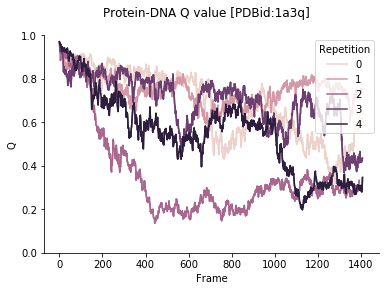

In [17]:
pdb_file = f"{pre}/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a3q_repetition_0_clean.pdb"
seq_file = f"{pre}/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a3q_repetition_0_protein.seq"
dcd_file = f"{pre}/local_jun08_pdb_1a3q_repetition_0_output.dcd"

trajectory_files=glob.glob(dcd_file[:-12]+'*.dcd')
energy_files=glob.glob(dcd_file[:-12]+'*.csv')
trajectory_files.sort()
energy_files.sort()
all_energies=[]
for i,e in enumerate(energy_files):
    e=pandas.read_csv(e,index_col=0)
    e['Frame']=e.index
    e['Repetition']=i
    all_energies+=[e]
all_energies=pandas.concat(all_energies)
plt.figure()
seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sigma5',hue='Repetition')
plt.legend([0,1,2,3,4])
pdb_name=pdb_file.split('/')[-1].split('_')[-4]
seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sigma5',hue='Repetition',)
seaborn.despine()
plt.legend([0,1,2,3,4],title="Repetition",loc=1)
plt.ylabel("Q")
plt.ylim(0,1)
plt.suptitle(f'Protein-DNA Q value [PDBid:{pdb_name}]')
# plt.savefig(f'{pdb_name}_fig1_Qvalue.png')

Text(0.5, 0.98, 'Protein-DNA Q value (DNA symmetric) [PDBid:1a3q]')

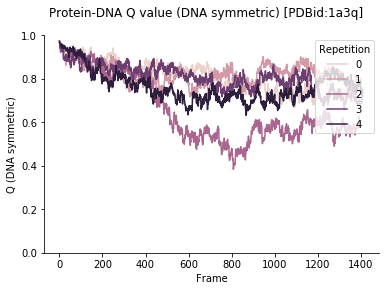

In [18]:
plt.figure()
seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sym_sigma5',hue='Repetition',)
seaborn.despine()
plt.legend([0,1,2,3,4],title="Repetition",loc=1)
plt.ylabel("Q (DNA symmetric)")
plt.ylim(0,1)
plt.suptitle(f'Protein-DNA Q value (DNA symmetric) [PDBid:{pdb_name}]')

Text(0.5, 0.98, 'Q values and Interface Energy (PDBid:1a3q, Repetition 0)')

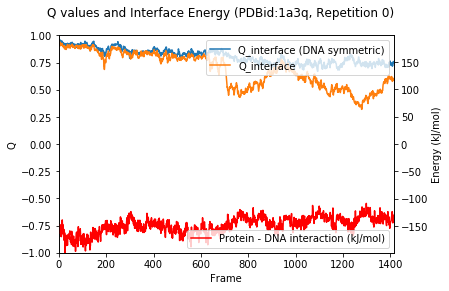

In [19]:
Rep0=all_energies[all_energies['Repetition']==0]
fig,ax=plt.subplots(1)
ax.plot(Rep0['Q_value_sym_sigma5'])
ax.plot(Rep0['Q_value_sigma5'])
#plt.plot(out2.sum(axis=0)/len(protein_contacts))
#plt.plot(all_energies['Q_value2 kJ/mol'])
#plt.plot(out3.sum(axis=0)/len(protein_contacts))
#plt.plot(all_energies['Q_value3 kJ/mol'])
ax.set_xlabel('Frame')
ax.set_ylabel('Q')
ax.set_ylim(-1,1)
ax.set_xlim(0,len(Rep0))
ax2=ax.twinx()
ax2.plot(Rep0['ExclusionProteinDNA kJ/mol']+Rep0['ElectrostaticsProteinDNA kJ/mol'],'r')
minimum=(Rep0['ExclusionProteinDNA kJ/mol']+Rep0['ElectrostaticsProteinDNA kJ/mol']).min()
ax2.set_ylim(minimum,-minimum)
ax.legend(['Q_interface (DNA symmetric)','Q_interface'],loc=1)
ax2.legend(['Protein - DNA interaction (kJ/mol)'],loc=4)
ax2.set_ylabel('Energy (kJ/mol)')
plt.suptitle(f'Q values and Interface Energy (PDBid:{pdb_name}, Repetition 0)')

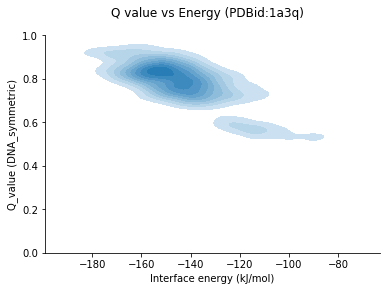

In [20]:
plt.figure()
interface_energy=all_energies['ExclusionProteinDNA kJ/mol']+all_energies['ElectrostaticsProteinDNA kJ/mol']
seaborn.kdeplot(interface_energy,all_energies['Q_value_sym_sigma5'],shade=True,shade_lowest=False,n_levels=10)
plt.xlabel('Interface energy (kJ/mol)')
plt.ylabel('Q_value (DNA_symmetric)')
plt.ylim(0,1)
plt.xlim(interface_energy.min(),interface_energy.max())
plt.suptitle(f'Q value vs Energy (PDBid:{pdb_name})')
seaborn.despine()

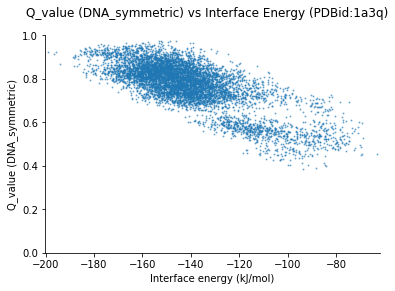

In [21]:
plt.figure()
plt.scatter(interface_energy,all_energies['Q_value_sym_sigma5'],s=1,alpha=0.5)
plt.xlabel('Interface energy (kJ/mol)')
plt.ylabel('Q_value (DNA_symmetric)')
plt.suptitle(f'Q_value (DNA_symmetric) vs Interface Energy (PDBid:{pdb_name})')
plt.ylim(0,1)
plt.xlim(interface_energy.min()-1,interface_energy.max()+1)
seaborn.despine()

In [ ]:

for dcd_file in glob.glob('/media/cab22/My Book/protein_DNA_selected_openmm/DNAProtein_Platform_OpenCL_date_20200226_pdb_*0_output.dcd'):
    pdb_file=dcd_file[:-12]+'0_clean.pdb'
    seq_file=dcd_file[:-12]+'0_protein.seq'
    trajectory_files=glob.glob(dcd_file[:-12]+'*.dcd')
    energy_files=glob.glob(dcd_file[:-12]+'*.csv')
    trajectory_files.sort()
    energy_files.sort()
    all_energies=[]
    for i,e in enumerate(energy_files):
        e=pandas.read_csv(e,index_col=0)
        e['Frame']=e.index
        e['Repetition']=i
        all_energies+=[e]
    all_energies=pandas.concat(all_energies)
    plt.figure()
    seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sigma5',hue='Repetition')
    plt.legend([0,1,2,3,4])
    pdb_name=pdb_file.split('/')[-1].split('_')[-4]
    seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sigma5',hue='Repetition',)
    seaborn.despine()
    plt.legend([0,1,2,3,4],title="Repetition",loc=1)
    plt.ylabel("Q")
    plt.ylim(0,1)
    plt.suptitle(f'Protein-DNA Q value [PDBid:{pdb_name}]')
    plt.savefig(f'{pdb_name}_fig1_Qvalue.png')
    plt.figure()
    seaborn.lineplot(data=all_energies,x='Frame',y='Q_value_sym_sigma5',hue='Repetition',)
    seaborn.despine()
    plt.legend([0,1,2,3,4],title="Repetition",loc=1)
    plt.ylabel("Q (DNA symmetric)")
    plt.ylim(0,1)
    plt.suptitle(f'Protein-DNA Q value (DNA symmetric) [PDBid:{pdb_name}]')
    plt.savefig(f'{pdb_name}_fig2_Qvaluesym.png')
    Rep0=all_energies[all_energies['Repetition']==0]
    fig,ax=plt.subplots(1)
    ax.plot(Rep0['Q_value_sym_sigma5'])
    ax.plot(Rep0['Q_value_sigma5'])
    #plt.plot(out2.sum(axis=0)/len(protein_contacts))
    #plt.plot(all_energies['Q_value2 kJ/mol'])
    #plt.plot(out3.sum(axis=0)/len(protein_contacts))
    #plt.plot(all_energies['Q_value3 kJ/mol'])
    ax.set_xlabel('Frame')
    ax.set_ylabel('Q')
    ax.set_ylim(-1,1)
    ax.set_xlim(0,len(Rep0))
    ax2=ax.twinx()
    ax2.plot(Rep0['ExclusionProteinDNA kJ/mol']+Rep0['ElectrostaticsProteinDNA kJ/mol'],'r')
    minimum=(Rep0['ExclusionProteinDNA kJ/mol']+Rep0['ElectrostaticsProteinDNA kJ/mol']).min()
    ax2.set_ylim(minimum,-minimum)
    ax.legend(['Q_interface (DNA symmetric)','Q_interface'],loc=1)
    ax2.legend(['Protein - DNA interaction (kJ/mol)'],loc=4)
    ax2.set_ylabel('Energy (kJ/mol)')
    plt.suptitle(f'Q values and Interface Energy (PDBid:{pdb_name}, Repetition 0)')
    plt.savefig(f'{pdb_name}_fig3_QandEnergy.png')
    plt.figure()
    interface_energy=all_energies['ExclusionProteinDNA kJ/mol']+all_energies['ElectrostaticsProteinDNA kJ/mol']
    seaborn.kdeplot(interface_energy,all_energies['Q_value_sym_sigma5'],shade=True,shade_lowest=False,n_levels=10)
    plt.xlabel('Interface energy (kJ/mol)')
    plt.ylabel('Q_value (DNA_symmetric)')
    plt.ylim(0,1)
    plt.xlim(interface_energy.min(),interface_energy.max())
    plt.suptitle(f'Q value vs Energy (PDBid:{pdb_name})')
    seaborn.despine()
    plt.savefig(f'{pdb_name}_fig5_kde.png')
    plt.figure()
    plt.scatter(interface_energy,all_energies['Q_value_sym_sigma5'],s=1,alpha=0.5)
    plt.xlabel('Interface energy (kJ/mol)')
    plt.ylabel('Q_value (DNA_symmetric)')
    plt.suptitle(f'Q_value (DNA_symmetric) vs Interface Energy (PDBid:{pdb_name})')
    plt.ylim(0,1)
    plt.xlim(interface_energy.min()-1,interface_energy.max()+1)
    seaborn.despine()
    plt.savefig(f'{pdb_name}_fig4_scatter.png')

In [33]:
import numpy as np
from Bio.PDB.PDBParser import PDBParser
parser = PDBParser()
structure = parser.get_structure('X', "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a36_repetition_0_clean.pdb")
model = structure[0]

In [34]:
chain_start = 0
count = 0
proteinResidues = ['ALA', 'ASN', 'CYS', 'GLU', 'HIS', 'LEU', 'MET', 'PRO', 'THR', 'TYR', 'ARG', 'ASP', 'GLN', 'GLY', 'ILE', 'LYS', 'PHE', 'SER', 'TRP', 'VAL']
rnaResidues = ['A', 'G', 'C', 'U', 'I']
dnaResidues = ['DA', 'DG', 'DC', 'DT', 'DI']
removeDNAchains = True
for chain in model.get_chains():
    chain_start += count
    count = 0
    if removeDNAchains and np.alltrue([a.get_resname().strip() in dnaResidues for a in chain.get_residues()]):
        print(f"chain {chain.id} is a DNA chain. will be ignored for Q evaluation")
        continue
    print(chain)

chain A is a DNA chain. will be ignored for Q evaluation
chain B is a DNA chain. will be ignored for Q evaluation
<Chain id=C>


In [35]:
a = list(chain.get_residues())

In [36]:
b = a[0]

In [37]:
b.get_resname().strip()

'NGP'

In [102]:
from simtk.openmm.app import *
# from simtk.openmm import *
from simtk.unit import *

In [103]:
type(AWSEM_xml) == list

True

In [106]:

def compute_dis(pos1, pos2):
    dis = pos1 - pos2
    dis = dis.value_in_unit(nanometer)
    r = (dis[0]**2 + dis[1]**2 + dis[2]**2)**0.5
    return r
# def get_het_bonds_info(fileLocation="5x2r-openmmawsem.pdb", AWSEM_xml="awsem.xml", pre="./"):
fileLocation = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a36_repetition_0_clean.pdb"
AWSEM_xml = ["/Users/weilu/openmmawsem/awsem.xml", "/Users/weilu/open3spn2/open3SPN2/3SPN2.xml"]
pdb = PDBFile(fileLocation)

res_list = list(pdb.topology.residues())
atom_list = list(pdb.topology.atoms())
protein_resNames = ["NGP", "IGL", "IPR", "NTER", "CTER"]
DNA_resNames = ["DA", "DC", "DT", "DG"]
protein_res_list = []
DNA_res_list = []
ligand_res_list = []
for res in res_list:
    if res.name in protein_resNames:
        protein_res_list.append(res)
    elif res.name in DNA_resNames:
        DNA_res_list.append(res)
    else:
        ligand_res_list.append(res)

protein_atom_list = []
DNA_atom_list = []
ligand_atom_list = []
for atom in atom_list:
    if atom.residue.name in protein_resNames:
        protein_atom_list.append(atom)
    elif atom.residue.name in DNA_resNames:
        DNA_atom_list.append(atom)
    else:
        ligand_atom_list.append(atom)
if type(AWSEM_xml) == list:
    forcefield = ForceField(*AWSEM_xml)
else:
    forcefield = ForceField(AWSEM_xml)
[templates, names] = forcefield.generateTemplatesForUnmatchedResidues(pdb.topology)
for a in templates:
    for a1 in a.atoms:
        a1.type = a1.name
    forcefield.registerResidueTemplate(a)
system = forcefield.createSystem(pdb.topology)


info = []
for DNA_atom in DNA_atom_list:
    pos1 = pdb.positions[DNA_atom.index]
    for protein_atom in protein_atom_list:
        if protein_atom.name != "CB":
            continue
        protein_chain = protein_atom.residue.chain.id
        pos2 = pdb.positions[protein_atom.index]
        r = compute_dis(pos1, pos2)
        if r < 0.65:
            # print(ligand_atom, protein_atom, "in contact", r)
            info.append([DNA_atom.index, protein_atom.index, r, protein_chain])
data = pd.DataFrame(info, columns=["DNA_atom_index", "Protein_atom_index", "r", "Protein_chain"])
# data.to_csv(f"{pre}/het_protein_bonds.csv", index=False)


In [107]:
data

DNA_atom_index  Protein_atom_index         r Protein_chain
0               16                1364  0.642480             C
1               18                1281  0.556150             C
2               18                1364  0.642990             C
3               19                1281  0.548340             C
4               21                1281  0.420549             C
..             ...                 ...       ...           ...
60             113                2324  0.427642             C
61             113                2330  0.381089             C
62             114                2318  0.527796             C
63             116                2253  0.630645             C
64             116                2318  0.565779             C

[65 rows x 4 columns]

In [112]:
save_name = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/1a36_DNA_protein_bonds.csv"
fileLocation = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a36_repetition_0_clean.pdb"
AWSEM_xml = ["/Users/weilu/openmmawsem/awsem.xml", "/Users/weilu/open3spn2/open3SPN2/3SPN2.xml"]


data = get_in_contact_bonds_info(fileLocation=fileLocation, AWSEM_xml=AWSEM_xml, interaction_atom="DNA", save_name=save_name)

In [113]:
data

DNA_atom_index  Protein_atom_index         r Protein_chain
0               16                1364  0.642480             C
1               18                1281  0.556150             C
2               18                1364  0.642990             C
3               19                1281  0.548340             C
4               21                1281  0.420549             C
..             ...                 ...       ...           ...
60             113                2324  0.427642             C
61             113                2330  0.381089             C
62             114                2318  0.527796             C
63             116                2253  0.630645             C
64             116                2318  0.565779             C

[65 rows x 4 columns]

In [111]:
def get_in_contact_bonds_info(fileLocation="5x2r-openmmawsem.pdb", AWSEM_xml="awsem.xml", interaction_atom="DNA", save_name="./DNA_protein_bonds.csv", save_dir="./"):
    # interaction_atom could be DNA or ligand
    # save_name = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/1a36_DNA_protein_bonds.csv"
    # fileLocation = "/Users/weilu/Research/server/jun_week1_2020/protein_DNA_benchmark/DNAProtein_Platform_OpenCL_date_20200226_pdb_1a36_repetition_0_clean.pdb"
    # AWSEM_xml = ["/Users/weilu/openmmawsem/awsem.xml", "/Users/weilu/open3spn2/open3SPN2/3SPN2.xml"]


    pdb = PDBFile(fileLocation)

    res_list = list(pdb.topology.residues())
    atom_list = list(pdb.topology.atoms())
    protein_resNames = ["NGP", "IGL", "IPR", "NTER", "CTER"]
    DNA_resNames = ["DA", "DC", "DT", "DG"]
    protein_res_list = []
    DNA_res_list = []
    ligand_res_list = []
    for res in res_list:
        if res.name in protein_resNames:
            protein_res_list.append(res)
        elif res.name in DNA_resNames:
            DNA_res_list.append(res)
        else:
            ligand_res_list.append(res)

    protein_atom_list = []
    DNA_atom_list = []
    ligand_atom_list = []
    for atom in atom_list:
        if atom.residue.name in protein_resNames:
            protein_atom_list.append(atom)
        elif atom.residue.name in DNA_resNames:
            DNA_atom_list.append(atom)
        else:
            ligand_atom_list.append(atom)
    if type(AWSEM_xml) == list:
        forcefield = ForceField(*AWSEM_xml)
    else:
        forcefield = ForceField(AWSEM_xml)
    [templates, names] = forcefield.generateTemplatesForUnmatchedResidues(pdb.topology)
    for a in templates:
        for a1 in a.atoms:
            a1.type = a1.name
        forcefield.registerResidueTemplate(a)
    system = forcefield.createSystem(pdb.topology)


    info = []
    if interaction_atom == "DNA":
        for DNA_atom in DNA_atom_list:
            pos1 = pdb.positions[DNA_atom.index]
            for protein_atom in protein_atom_list:
                if protein_atom.name != "CB":
                    continue
                protein_chain = protein_atom.residue.chain.id
                pos2 = pdb.positions[protein_atom.index]
                r = compute_dis(pos1, pos2)
                if r < 0.65:
                    # print(ligand_atom, protein_atom, "in contact", r)
                    info.append([DNA_atom.index, protein_atom.index, r, protein_chain])
        data = pd.DataFrame(info, columns=[f"DNA_atom_index", "Protein_atom_index", "r", "Protein_chain"])
        data.to_csv(save_name, index=False)
    elif interaction_atom == "Ligand":
        info = []
        for ligand_atom in ligand_atom_list:
            pos1 = pdb.positions[ligand_atom.index]
            for protein_atom in protein_atom_list:
                if protein_atom.name != "CB":
                    continue
                protein_chain = protein_atom.residue.chain.id
                pos2 = pdb.positions[protein_atom.index]
                r = compute_dis(pos1, pos2)
                if r < 0.65:
                    # print(ligand_atom, protein_atom, "in contact", r)
                    info.append([ligand_atom.index, protein_atom.index, r, protein_chain])
        data = pd.DataFrame(info, columns=["Ligand_atom_index", "Protein_atom_index", "r", "Protein_chain"])
        data.to_csv(f"{save_dir}/het_protein_bonds.csv", index=False)

        res_list = list(pdb.topology.residues())
        atom_list = list(pdb.topology.atoms())
        protein_resNames = ["NGP", "IGL", "IPR", "NTER", "CTER"]
        DNA_resNames = ["DA", "DC", "DT", "DG"]
        protein_res_list = []
        DNA_res_list = []
        ligand_res_list = []
        for res in res_list:
            if res.name in protein_resNames:
                protein_res_list.append(res)
            elif res.name in DNA_resNames:
                DNA_res_list.append(res)
            else:
                ligand_res_list.append(res)

        protein_atom_list = []
        DNA_atom_list = []
        ligand_atom_list = []
        for atom in atom_list:
            if atom.residue.name in protein_resNames:
                protein_atom_list.append(atom)
            elif atom.residue.name in DNA_resNames:
                DNA_atom_list.append(atom)
            else:
                ligand_atom_list.append(atom)
        ligand_res_list

        info = []
        for res in ligand_res_list:
            atoms = list(res.atoms())
            n_atoms = len(atoms)
            for i in range(n_atoms):
                atom1 = atoms[i]
                pos1 = pdb.positions[atom1.index]
                for j in range(i+1, n_atoms):
                    atom2 = atoms[j]
                    pos2 = pdb.positions[atom2.index]
                    dis = pos1 - pos2
                    dis = dis.value_in_unit(nanometer)
                    r = (dis[0]**2 + dis[1]**2 + dis[2]**2)**0.5
                    # print(atom1.index, atom2.index, round(r, 3))
                    info.append([res.name, atom1.index, atom2.index, atom1.name, atom2.name, atom1.element.symbol, atom2.element.symbol, round(r, 3)])

        data = pd.DataFrame(info, columns=["Name", "Atom1", "Atom2", "Name1", "Name2", "Symbol1", "Symbol2", "r"])
        data.to_csv(f"{save_dir}/het_frag.csv", index=False)
    return data